# 📊 Big Data Final Project - Data Analysis Worksheet

## 📁 Project Structure
```
📦 Root project/
├── 📊 Raw Data/
│   ├── 🥇 harga_emas_febuari_2020-2025.csv
│   ├── 💼 Data Historis Federal Funds Composite Interest Rate.csv
│   ├── 📈 Data Historis Jakarta Stock Exchange Composite.csv
│   ├── 📊 data inflasi.csv
│   └── 🛢️ PET_PRI_SPT_S1_D.xls
├── 🧹 Cleaned Data/
│   ├── ✅ harga_emas_cleaned.csv
│   ├── ✅ federal_funds_rate_cleaned_[timestamp].csv
│   ├── ✅ jakarta_stock_exchange_cleaned_[timestamp].csv
│   ├── ✅ data_inflasi_cleaned_[timestamp].csv
│   └── ✅ crude_oil_wti_cleaned_[timestamp].csv
├── 📓 Analysis/
│   └── 🔬 worksheet.ipynb (this file)
├── 📋 Documentation/
│   ├── 📖 README.md
│   └── 🗃️ .gitignore
└── 🔧 Utils/
```

## 🎯 Objective
This notebook performs comprehensive data cleaning and analysis on various economic datasets including:
- 🥇 Gold prices (2020-2025)
- 💼 Federal Funds Rate
- 📈 Jakarta Stock Exchange Composite
- 📊 Inflation data
- 🛢️ Crude oil prices

## ⚠️ Note
Web scraping sections have been removed as requested. This notebook focuses on data cleaning and analysis only.

---

In [18]:
# Import libraries untuk data cleaning
import pandas as pd
import numpy as np

---

# BAGIAN SCRAPING SELESAI

File `harga_emas_febuari_2020-2025.csv` telah dibuat. 
Sekarang lanjut ke proses **Data Cleaning**.

---

# Data Cleaning untuk Harga Emas

Notebook ini berisi proses cleaning data hasil scraping harga emas dari file `harga_emas_febuari_2020-2025.csv`

## Langkah-langkah Cleaning:
1. Load dan eksplorasi data
2. Cleaning kolom tanggal  
3. Cleaning kolom numerik (harga dan kurs)
4. Rename kolom untuk konsistensi
5. Final validation

In [2]:
import pandas as pd

# ===== 1. LOAD DAN EKSPLORASI DATA =====

# Load data dari CSV (updated path for new structure)
df = pd.read_csv('../Raw Data/harga_emas_febuari_2020-2025.csv')

print("=== INFORMASI DASAR DATASET ===")
print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Kolom: {list(df.columns)}")

print("\n=== PREVIEW DATA ===")
df.head()

=== INFORMASI DASAR DATASET ===
Jumlah baris: 1899
Jumlah kolom: 8
Kolom: ['tanggal', 'harga_oz', 'kurs_oz', 'idr_oz', 'harga_gr', 'kurs_gr', 'idr_gr', 'update_asli']

=== PREVIEW DATA ===


,tanggal,harga_oz,kurs_oz,idr_oz,harga_gr,kurs_gr,idr_gr,update_asli
0,01 Januari 2020,"1.517,24 (-1.107,25)","13.901,01 (-2.260,99)",21.091.168,"48,78","13.901,01","678.097 (-685.641,64)","01 Januari 2020, pukul 23:59"
1,02 Januari 2020,"1.526,12 (-1.098,37)","13.895,01 (-2.266,99)",21.205.453,"49,07","13.895,01","681.771 (-681.967,32)","02 Januari 2020, pukul 23:59"
2,03 Januari 2020,"1.548,99 (-1.075,50)","13.899,01 (-2.262,99)",21.529.427,"49,80","13.899,01","692.187 (-671.551,29)","03 Januari 2020, pukul 23:59"
3,04 Januari 2020,"1.552,24 (-1.072,25)","13.899,01 (-2.262,99)",21.574.599,"49,91","13.899,01","693.639 (-670.098,98)","04 Januari 2020, pukul 23:59"
4,05 Januari 2020,"1.552,24 (-1.072,25)","13.899,01 (-2.262,99)",21.574.599,"49,91","13.899,01","693.639 (-670.098,98)","05 Januari 2020, pukul 23:59"


In [3]:
# ===== EKSPLORASI LANJUTAN =====

print("=== TIPE DATA ===")
print(df.dtypes)

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe(include='all'))

print("\n=== MISSING VALUES ===")
print(df.isna().sum())

print("\n=== CONTOH DATA MENTAH ===")
print("Sample tanggal:")
print(df['tanggal'].head(10).tolist())
print("\nSample harga:")
print(df['harga_oz'].head(5).tolist())

=== TIPE DATA ===
tanggal        object
harga_oz       object
kurs_oz        object
idr_oz         object
harga_gr       object
kurs_gr        object
idr_gr         object
update_asli    object
dtype: object

=== STATISTIK DESKRIPTIF ===
                tanggal            harga_oz              kurs_oz      idr_oz  \
count              1899                1899                 1899        1899   
unique             1899                1387                  859        1409   
top     01 Januari 2020  1.823,86 (-800,63)  15.731,00 (-431,00)  28.691.142   
freq                  1                 243                  245         243   

       harga_gr    kurs_gr                 idr_gr  \
count      1899       1899                   1899   
unique     1033        838                   1409   
top       58,64  15.731,00  922.442 (-441.296,83)   
freq        244        245                    243   

                         update_asli  
count                           1899  
unique           

## 2. CLEANING KOLOM TANGGAL

Kolom tanggal saat ini dalam format string "DD Bulan YYYY" (contoh: "01 Januari 2020").
 perlu mengkonversi ke format datetime untuk analisis yang lebih baik.

In [4]:
# Clean and change datatype tanggal

# ===== KONVERSI TANGGAL KE DATETIME =====

# Mapping bulan Indonesia ke angka
bulan_mapping = {
    "Januari": "01", "Febuari": "02", "Februari": "02", "Maret": "03", 
    "April": "04", "Mei": "05", "Juni": "06", "Juli": "07", 
    "Agustus": "08", "September": "09", "Oktober": "10", 
    "November": "11", "Desember": "12"
}

def konversi_tanggal(tanggal_str):
    """Konversi dari 'DD Bulan YYYY' ke 'YYYY-MM-DD'"""
    try:
        parts = tanggal_str.split()
        if len(parts) != 3:
            return None
        hari, bulan, tahun = parts
        bulan_num = bulan_mapping.get(bulan, "00")
        return f"{tahun}-{bulan_num}-{hari.zfill(2)}"
    except:
        return None

# Konversi tanggal
print("Memproses konversi tanggal...")
df['tanggal_formatted'] = df['tanggal'].apply(konversi_tanggal)
df['tanggal'] = pd.to_datetime(df['tanggal_formatted'], errors='coerce')

# Hapus kolom sementara
df.drop(columns=['tanggal_formatted'], inplace=True)

print("✅ Konversi tanggal selesai!")
print(f"Tanggal berhasil dikonversi: {df['tanggal'].notna().sum()}")
print(f"Tanggal gagal dikonversi: {df['tanggal'].isna().sum()}")

# Preview hasil
print("\n=== PREVIEW TANGGAL SETELAH KONVERSI ===")
df[['tanggal']].head(10)


Memproses konversi tanggal...
✅ Konversi tanggal selesai!
Tanggal berhasil dikonversi: 1899
Tanggal gagal dikonversi: 0

=== PREVIEW TANGGAL SETELAH KONVERSI ===


,tanggal
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
5,2020-01-06
6,2020-01-07
7,2020-01-08
8,2020-01-09
9,2020-01-10


In [5]:
# ===== VALIDASI TANGGAL =====

print("=== VALIDASI HASIL KONVERSI TANGGAL ===")
print(f"Range tanggal: {df['tanggal'].min()} hingga {df['tanggal'].max()}")
print(f"Total hari: {len(df)}")

# Cek duplikasi tanggal
duplicates = df['tanggal'].value_counts()
if (duplicates > 1).any():
    print(f"\n⚠️  Ada {(duplicates > 1).sum()} tanggal yang duplikat:")
    print(duplicates[duplicates > 1].head())
else:
    print("\n✅ Tidak ada duplikasi tanggal")

=== VALIDASI HASIL KONVERSI TANGGAL ===
Range tanggal: 2020-01-01 00:00:00 hingga 2025-03-13 00:00:00
Total hari: 1899

✅ Tidak ada duplikasi tanggal


## 3. CLEANING DATA NUMERIK (HARGA & KURS)

Kolom harga dan kurs masih dalam format string dengan:
- Pemisah ribuan berupa titik (.)
- Desimal berupa koma (,)
- Ada nilai dalam kurung () yang perlu dihapus
- Perlu dikonversi ke tipe float

In [6]:
# ===== CLEANING DATA NUMERIK =====

def clean_numeric_column(series):
    """
    Fungsi untuk membersihkan kolom numerik:
    - Hapus teks dalam kurung ()
    - Hapus pemisah ribuan (titik)
    - Ganti koma desimal dengan titik
    - Konversi ke float
    """
    # Hapus teks dalam kurung
    cleaned = series.str.replace(r'\s*\(.*?\)', '', regex=True)
    
    # Hapus pemisah ribuan dan fix desimal
    cleaned = cleaned.str.replace('.', '', regex=False)
    cleaned = cleaned.str.replace(',', '.', regex=False)
    
    # Konversi ke float
    return pd.to_numeric(cleaned, errors='coerce')

# Daftar kolom yang perlu dibersihkan
numeric_columns = ['harga_oz', 'kurs_oz', 'idr_oz', 'harga_gr', 'kurs_gr', 'idr_gr']

print("=== CLEANING KOLOM NUMERIK ===")
for col in numeric_columns:
    print(f"Memproses kolom: {col}")
    
    # Show before
    print(f"  Contoh sebelum: {df[col].iloc[0]}")
    
    # Clean
    df[col] = clean_numeric_column(df[col])
    
    # Show after
    print(f"  Contoh sesudah: {df[col].iloc[0]}")
    print(f"  Missing values: {df[col].isna().sum()}")
    print()

print("✅ Cleaning kolom numerik selesai!")



=== CLEANING KOLOM NUMERIK ===
Memproses kolom: harga_oz
  Contoh sebelum: 1.517,24 (-1.107,25)
  Contoh sesudah: 1517.24
  Missing values: 0

Memproses kolom: kurs_oz
  Contoh sebelum: 13.901,01 (-2.260,99)
  Contoh sesudah: 13901.01
  Missing values: 0

Memproses kolom: idr_oz
  Contoh sebelum: 21.091.168
  Contoh sesudah: 21091168
  Missing values: 0

Memproses kolom: harga_gr
  Contoh sebelum: 48,78
  Contoh sesudah: 48.78
  Missing values: 0

Memproses kolom: kurs_gr
  Contoh sebelum: 13.901,01
  Contoh sesudah: 13901.01
  Missing values: 0

Memproses kolom: idr_gr
  Contoh sebelum: 678.097 (-685.641,64)
  Contoh sesudah: 678097
  Missing values: 0

✅ Cleaning kolom numerik selesai!


In [7]:
# ===== VALIDASI HASIL CLEANING NUMERIK =====

print("=== VALIDASI TIPE DATA ===")
print(df.dtypes)

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe())

print("\n=== CONTOH DATA SETELAH CLEANING ===")
df.head()

=== VALIDASI TIPE DATA ===
tanggal        datetime64[ns]
harga_oz              float64
kurs_oz               float64
idr_oz                  int64
harga_gr              float64
kurs_gr               float64
idr_gr                  int64
update_asli            object
dtype: object

=== STATISTIK DESKRIPTIF ===
                   tanggal     harga_oz       kurs_oz        idr_oz  \
count                 1899  1899.000000   1899.000000  1.899000e+03   
mean   2022-08-07 00:00:00  1960.730679  15100.356261  2.974355e+07   
min    2020-01-01 00:00:00  1474.030000  13612.000000  2.106676e+07   
25%    2021-04-19 12:00:00  1783.395000  14373.010000  2.591320e+07   
50%    2022-08-07 00:00:00  1826.030000  15083.010000  2.783393e+07   
75%    2023-11-24 12:00:00  2004.550000  15731.000000  3.134428e+07   
max    2025-03-13 00:00:00  2981.490000  16741.010000  4.905446e+07   
std                    NaN   313.713540    752.493483  5.883284e+06   

          harga_gr       kurs_gr        idr_gr  


,tanggal,harga_oz,kurs_oz,idr_oz,harga_gr,kurs_gr,idr_gr,update_asli
0,2020-01-01,1517.24,13901.01,21091168,48.78,13901.01,678097,"01 Januari 2020, pukul 23:59"
1,2020-01-02,1526.12,13895.01,21205453,49.07,13895.01,681771,"02 Januari 2020, pukul 23:59"
2,2020-01-03,1548.99,13899.01,21529427,49.80,13899.01,692187,"03 Januari 2020, pukul 23:59"
3,2020-01-04,1552.24,13899.01,21574599,49.91,13899.01,693639,"04 Januari 2020, pukul 23:59"
4,2020-01-05,1552.24,13899.01,21574599,49.91,13899.01,693639,"05 Januari 2020, pukul 23:59"


In [8]:
# ===== HAPUS KOLOM YANG TIDAK DIPERLUKAN =====

# Hapus kolom update_asli karena tidak diperlukan untuk analisis
if 'update_asli' in df.columns:
    df = df.drop(columns=['update_asli'])
    print("✅ Kolom 'update_asli' telah dihapus")
else:
    print("ℹ️  Kolom 'update_asli' tidak ditemukan")

print(f"Kolom yang tersisa: {list(df.columns)}")


✅ Kolom 'update_asli' telah dihapus
Kolom yang tersisa: ['tanggal', 'harga_oz', 'kurs_oz', 'idr_oz', 'harga_gr', 'kurs_gr', 'idr_gr']


## 4. FINALISASI DATA

Tahap akhir cleaning:
- Hapus kolom yang tidak diperlukan
- Rename kolom untuk konsistensi
- Validasi final

In [9]:
# ===== RENAME KOLOM UNTUK KONSISTENSI =====

# Rename kolom agar lebih mudah dipahami dan konsisten
column_mapping = {
    'harga_oz': 'usd_per_ounce',
    'kurs_oz': 'kurs_dollar_per_ounce', 
    'idr_oz': 'idr_per_ounce',
    'harga_gr': 'usd_per_gram',
    'kurs_gr': 'kurs_dollar_per_gram',
    'idr_gr': 'idr_per_gram'
}

df = df.rename(columns=column_mapping)

print("✅ Rename kolom selesai!")
print("Mapping kolom:")
for old, new in column_mapping.items():
    print(f"  {old} → {new}")

print(f"\nKolom final: {list(df.columns)}")


✅ Rename kolom selesai!
Mapping kolom:
  harga_oz → usd_per_ounce
  kurs_oz → kurs_dollar_per_ounce
  idr_oz → idr_per_ounce
  harga_gr → usd_per_gram
  kurs_gr → kurs_dollar_per_gram
  idr_gr → idr_per_gram

Kolom final: ['tanggal', 'usd_per_ounce', 'kurs_dollar_per_ounce', 'idr_per_ounce', 'usd_per_gram', 'kurs_dollar_per_gram', 'idr_per_gram']


In [10]:
# ===== VALIDASI FINAL & SIMPAN DATA =====

print("=== HASIL AKHIR DATA CLEANING ===")
print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Range tanggal: {df['tanggal'].min()} hingga {df['tanggal'].max()}")

print("\n=== INFO DATASET FINAL ===")
print(df.info())

print("\n=== PREVIEW DATA FINAL ===")
print("5 data pertama:")
print(df.head())
print("\n5 data terakhir:")
print(df.tail())

# Simpan data yang sudah dibersihkan ke folder Cleaned Data
output_file = '../Cleaned Data/harga_emas_cleaned.csv'
df.to_csv(output_file, index=False)
print(f"\n✅ Data berhasil disimpan ke '{output_file}'")


=== HASIL AKHIR DATA CLEANING ===
Jumlah baris: 1899
Jumlah kolom: 7
Range tanggal: 2020-01-01 00:00:00 hingga 2025-03-13 00:00:00

=== INFO DATASET FINAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tanggal                1899 non-null   datetime64[ns]
 1   usd_per_ounce          1899 non-null   float64       
 2   kurs_dollar_per_ounce  1899 non-null   float64       
 3   idr_per_ounce          1899 non-null   int64         
 4   usd_per_gram           1899 non-null   float64       
 5   kurs_dollar_per_gram   1899 non-null   float64       
 6   idr_per_gram           1899 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 104.0 KB
None

=== PREVIEW DATA FINAL ===
5 data pertama:
     tanggal  usd_per_ounce  kurs_dollar_per_ounce  idr_per_ounce  \
0 2020-01-01   

## 5. SUMMARY CLEANING

**Proses cleaning yang telah dilakukan:**

1. ✅ **Load data** dari `harga_emas_febuari_2020-2025.csv`
2. ✅ **Eksplorasi awal** - cek struktur, tipe data, missing values
3. ✅ **Cleaning tanggal** - konversi dari string ke datetime
4. ✅ **Cleaning data numerik** - hapus kurung, format ribuan/desimal, konversi ke float
5. ✅ **Hapus kolom tidak perlu** - buang kolom `update_asli`
6. ✅ **Rename kolom** - untuk konsistensi dan kemudahan analisis
7. ✅ **Simpan data bersih** ke `harga_emas_cleaned.csv`


---

# Data Cleaning untuk Federal Funds Rate

akan melakukan cleaning untuk dataset **Federal Funds Composite Interest Rate** dari file `Data Historis Federal Funds Composite Interest Rate.csv`

## Dataset Federal Funds Rate
Dataset ini berisi data historis tingkat suku bunga Federal Reserve dengan kolom:
- **Tanggal**: Format DD/MM/YYYY
- **Terakhir**: Nilai suku bunga penutupan
- **Pembukaan**: Nilai suku bunga pembukaan
- **Tertinggi**: Nilai tertinggi hari itu
- **Terendah**: Nilai terendah hari itu  
- **Vol.**: Volume transaksi
- **Perubahan%**: Persentase perubahan

---

In [12]:
# ===== LOAD DATA FEDERAL FUNDS RATE =====

# Load data Federal Funds Rate (updated path for new structure)
df_fed = pd.read_csv('../Raw Data/Data Historis Federal Funds Composite Interest Rate.csv')

print("=== INFORMASI DASAR DATASET FEDERAL FUNDS RATE ===")
print(f"Jumlah baris: {len(df_fed)}")
print(f"Jumlah kolom: {len(df_fed.columns)}")
print(f"Kolom: {list(df_fed.columns)}")

print("\n=== PREVIEW DATA MENTAH ===")
print("5 data pertama:")
print(df_fed.head())
print("\n5 data terakhir:")
print(df_fed.tail())

print("\n=== TIPE DATA ===")
print(df_fed.dtypes)

print("\n=== MISSING VALUES ===")
print(df_fed.isna().sum())

print("\n=== CONTOH FORMAT DATA ===")
print("Sample tanggal:", df_fed['Tanggal'].iloc[0])
print("Sample nilai suku bunga:", df_fed['Terakhir'].iloc[0])
print("Sample volume:", df_fed['Vol.'].iloc[0])
print("Sample perubahan%:", df_fed['Perubahan%'].iloc[0])

=== INFORMASI DASAR DATASET FEDERAL FUNDS RATE ===
Jumlah baris: 1302
Jumlah kolom: 7
Kolom: ['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%']

=== PREVIEW DATA MENTAH ===
5 data pertama:
      Tanggal Terakhir Pembukaan Tertinggi Terendah  Vol. Perubahan%
0  18/03/2025     4,33      4,33      4,33     4,33   NaN      0,00%
1  12/03/2025     4,33      4,33      4,33     4,33   NaN      0,00%
2  10/03/2025     4,33      4,33      4,33     4,33   NaN      0,00%
3  05/03/2025     4,33      4,33      4,33     4,33   NaN      0,00%
4  04/03/2025     4,33      4,33      4,33     4,33   NaN      0,00%

5 data terakhir:
         Tanggal Terakhir Pembukaan Tertinggi Terendah  Vol. Perubahan%
1297  07/01/2020     1,55      1,55      1,55     1,55   NaN      0,00%
1298  06/01/2020     1,55      1,55      1,55     1,55   NaN      0,00%
1299  03/01/2020     1,55      1,55      1,55     1,55   NaN      0,00%
1300  02/01/2020     1,55      1,55      1,55     1,55   N

## 1. CLEANING TANGGAL FEDERAL FUNDS RATE

Format tanggal saat ini: "DD/MM/YYYY" (contoh: "20/06/2025")
Perlu dikonversi ke format datetime untuk konsistensi dengan data emas.

In [13]:
# ===== KONVERSI TANGGAL FEDERAL FUNDS RATE =====

# Konversi tanggal dari format DD/MM/YYYY ke datetime
print("Memproses konversi tanggal Federal Funds Rate...")

# Konversi tanggal dengan format DD/MM/YYYY
df_fed['tanggal_converted'] = pd.to_datetime(df_fed['Tanggal'], format='%d/%m/%Y', errors='coerce')

# Replace kolom tanggal asli dengan yang sudah dikonversi
df_fed['Tanggal'] = df_fed['tanggal_converted']
df_fed.drop(columns=['tanggal_converted'], inplace=True)

print("✅ Konversi tanggal Federal Funds Rate selesai!")
print(f"Tanggal berhasil dikonversi: {df_fed['Tanggal'].notna().sum()}")
print(f"Tanggal gagal dikonversi: {df_fed['Tanggal'].isna().sum()}")

print(f"\nRange tanggal: {df_fed['Tanggal'].min()} hingga {df_fed['Tanggal'].max()}")

print("\n=== PREVIEW TANGGAL SETELAH KONVERSI ===")
df_fed[['Tanggal']].head(10)

Memproses konversi tanggal Federal Funds Rate...
✅ Konversi tanggal Federal Funds Rate selesai!
Tanggal berhasil dikonversi: 1302
Tanggal gagal dikonversi: 0

Range tanggal: 2019-12-31 00:00:00 hingga 2025-03-18 00:00:00

=== PREVIEW TANGGAL SETELAH KONVERSI ===


,Tanggal
0,2025-03-18
1,2025-03-12
2,2025-03-10
3,2025-03-05
4,2025-03-04
5,2025-03-03
6,2025-02-28
7,2025-02-27
8,2025-02-26
9,2025-02-25


## 2. CLEANING DATA NUMERIK FEDERAL FUNDS RATE

Kolom numerik yang perlu dibersihkan:
- **Terakhir, Pembukaan, Tertinggi, Terendah**: Menggunakan koma sebagai desimal
- **Vol.**: Berisi "B" untuk Billion, ada nilai kosong
- **Perubahan%**: Menggunakan format "%", koma sebagai desimal

In [14]:
# ===== CLEANING DATA NUMERIK FEDERAL FUNDS RATE =====

def clean_fed_numeric_column(series, is_percentage=False):
    """
    Fungsi untuk membersihkan kolom numerik Federal Funds Rate:
    - Ganti koma dengan titik untuk desimal
    - Hapus simbol % jika ada
    - Konversi ke float
    """
    cleaned = series.astype(str)
    
    # Ganti koma dengan titik untuk desimal
    cleaned = cleaned.str.replace(',', '.', regex=False)
    
    # Hapus simbol % jika kolom persentase
    if is_percentage:
        cleaned = cleaned.str.replace('%', '', regex=False)
    
    # Konversi ke float
    return pd.to_numeric(cleaned, errors='coerce')

def clean_volume_column(series):
    """
    Fungsi khusus untuk membersihkan kolom Volume:
    - Konversi "B" (Billion) ke angka
    - Handle nilai kosong
    """
    cleaned = series.astype(str)
    
    # Replace empty strings dengan NaN
    cleaned = cleaned.replace('', pd.NA)
    
    # Konversi format "XXX,00B" ke angka dalam miliar
    mask_billion = cleaned.str.contains('B', na=False)
    
    # Untuk nilai dengan "B", hapus "B" dan konversi
    cleaned.loc[mask_billion] = cleaned.loc[mask_billion].str.replace('B', '', regex=False)
    cleaned.loc[mask_billion] = cleaned.loc[mask_billion].str.replace(',', '.', regex=False)
    
    # Konversi ke float
    result = pd.to_numeric(cleaned, errors='coerce')
    
    # Kalikan dengan 1 miliar untuk nilai yang aslinya punya "B"
    result.loc[mask_billion] = result.loc[mask_billion] * 1_000_000_000
    
    return result

print("=== CLEANING KOLOM NUMERIK FEDERAL FUNDS RATE ===")

# Clean kolom suku bunga (Terakhir, Pembukaan, Tertinggi, Terendah)
interest_rate_columns = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']

for col in interest_rate_columns:
    print(f"Memproses kolom: {col}")
    print(f"  Contoh sebelum: {df_fed[col].iloc[0]}")
    
    df_fed[col] = clean_fed_numeric_column(df_fed[col])
    
    print(f"  Contoh sesudah: {df_fed[col].iloc[0]}")
    print(f"  Missing values: {df_fed[col].isna().sum()}")
    print()

# Clean kolom Volume
print("Memproses kolom: Vol.")
print(f"  Contoh sebelum: {df_fed['Vol.'].iloc[2]}")  # Gunakan index 2 karena bisa ada empty

df_fed['Vol.'] = clean_volume_column(df_fed['Vol.'])

print(f"  Contoh sesudah: {df_fed['Vol.'].iloc[2]}")
print(f"  Missing values: {df_fed['Vol.'].isna().sum()}")
print()

# Clean kolom Perubahan%
print("Memproses kolom: Perubahan%")
print(f"  Contoh sebelum: {df_fed['Perubahan%'].iloc[0]}")

df_fed['Perubahan%'] = clean_fed_numeric_column(df_fed['Perubahan%'], is_percentage=True)

print(f"  Contoh sesudah: {df_fed['Perubahan%'].iloc[0]}")
print(f"  Missing values: {df_fed['Perubahan%'].isna().sum()}")

print("\n✅ Cleaning kolom numerik Federal Funds Rate selesai!")

=== CLEANING KOLOM NUMERIK FEDERAL FUNDS RATE ===
Memproses kolom: Terakhir
  Contoh sebelum: 4,33
  Contoh sesudah: 4.33
  Missing values: 0

Memproses kolom: Pembukaan
  Contoh sebelum: 4,33
  Contoh sesudah: 4.33
  Missing values: 0

Memproses kolom: Tertinggi
  Contoh sebelum: 4,33
  Contoh sesudah: 4.33
  Missing values: 0

Memproses kolom: Terendah
  Contoh sebelum: 4,33
  Contoh sesudah: 4.33
  Missing values: 0

Memproses kolom: Vol.
  Contoh sebelum: nan
  Contoh sesudah: nan
  Missing values: 1302

Memproses kolom: Perubahan%
  Contoh sebelum: 0,00%
  Contoh sesudah: 0.0
  Missing values: 0

✅ Cleaning kolom numerik Federal Funds Rate selesai!


In [15]:
# ===== VALIDASI DAN RENAME KOLOM FEDERAL FUNDS RATE =====

print("=== VALIDASI HASIL CLEANING FEDERAL FUNDS RATE ===")
print(df_fed.dtypes)

print("\n=== STATISTIK DESKRIPTIF ===")
print(df_fed.describe())

print("\n=== RENAME KOLOM UNTUK KONSISTENSI ===")
# Rename kolom agar konsisten dan mudah dipahami
fed_column_mapping = {
    'Tanggal': 'tanggal',
    'Terakhir': 'close_rate',
    'Pembukaan': 'open_rate', 
    'Tertinggi': 'high_rate',
    'Terendah': 'low_rate',
    'Vol.': 'volume_billion',
    'Perubahan%': 'change_percent'
}

df_fed = df_fed.rename(columns=fed_column_mapping)

print("Mapping kolom Federal Funds Rate:")
for old, new in fed_column_mapping.items():
    print(f"  {old} → {new}")

print(f"\nKolom final Federal Funds Rate: {list(df_fed.columns)}")

print("\n=== CONTOH DATA SETELAH CLEANING ===")
df_fed.head()

=== VALIDASI HASIL CLEANING FEDERAL FUNDS RATE ===
Tanggal       datetime64[ns]
Terakhir             float64
Pembukaan            float64
Tertinggi            float64
Terendah             float64
Vol.                 float64
Perubahan%           float64
dtype: object

=== STATISTIK DESKRIPTIF ===
                             Tanggal     Terakhir    Pembukaan    Tertinggi  \
count                           1302  1302.000000  1302.000000  1302.000000   
mean   2022-08-02 01:47:16.866359552     2.517934     2.517942     2.517942   
min              2019-12-31 00:00:00     0.040000     0.040000     0.040000   
25%              2021-04-16 18:00:00     0.090000     0.090000     0.090000   
50%              2022-08-01 12:00:00     2.330000     2.330000     2.330000   
75%              2023-11-15 18:00:00     5.080000     5.080000     5.080000   
max              2025-03-18 00:00:00     5.330000     5.330000     5.330000   
std                              NaN     2.307796     2.307805     2.3

,tanggal,close_rate,open_rate,high_rate,low_rate,volume_billion,change_percent
0,2025-03-18,4.33,4.33,4.33,4.33,NaN,0.0
1,2025-03-12,4.33,4.33,4.33,4.33,NaN,0.0
2,2025-03-10,4.33,4.33,4.33,4.33,NaN,0.0
3,2025-03-05,4.33,4.33,4.33,4.33,NaN,0.0
4,2025-03-04,4.33,4.33,4.33,4.33,NaN,0.0


In [16]:
# ===== SIMPAN DATA FEDERAL FUNDS RATE YANG SUDAH DIBERSIHKAN =====

print("=== HASIL AKHIR FEDERAL FUNDS RATE CLEANING ===")
print(f"Jumlah baris: {len(df_fed)}")
print(f"Jumlah kolom: {len(df_fed.columns)}")
print(f"Range tanggal: {df_fed['tanggal'].min()} hingga {df_fed['tanggal'].max()}")

print("\n=== INFO DATASET FINAL FEDERAL FUNDS RATE ===")
print(df_fed.info())

print("\n=== PREVIEW DATA FINAL FEDERAL FUNDS RATE ===")
print("5 data pertama:")
print(df_fed.head())
print("\n5 data terakhir:")
print(df_fed.tail())

# Simpan data yang sudah dibersihkan ke folder Cleaned Data
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
fed_output_file = f'../Cleaned Data/federal_funds_rate_cleaned_{timestamp}.csv'
df_fed.to_csv(fed_output_file, index=False)
print(f"\n✅ Data Federal Funds Rate berhasil disimpan ke '{fed_output_file}'")

=== HASIL AKHIR FEDERAL FUNDS RATE CLEANING ===
Jumlah baris: 1302
Jumlah kolom: 7
Range tanggal: 2019-12-31 00:00:00 hingga 2025-03-18 00:00:00

=== INFO DATASET FINAL FEDERAL FUNDS RATE ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tanggal         1302 non-null   datetime64[ns]
 1   close_rate      1302 non-null   float64       
 2   open_rate       1302 non-null   float64       
 3   high_rate       1302 non-null   float64       
 4   low_rate        1302 non-null   float64       
 5   volume_billion  0 non-null      float64       
 6   change_percent  1302 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 71.3 KB
None

=== PREVIEW DATA FINAL FEDERAL FUNDS RATE ===
5 data pertama:
     tanggal  close_rate  open_rate  high_rate  low_rate  volume_billion  \
0 2025-03-18        4.33      

# 📊 COMPREHENSIVE EDA - INFLATION DATA

## Analisis Data Inflasi Indonesia (2020-2025)

Sekarang kita akan melakukan **Exploratory Data Analysis (EDA) yang komprehensif** untuk dataset inflasi Indonesia, mencakup:

### 🔍 **Analisis yang akan dilakukan:**
1. **📈 Univariate Analysis** - Statistik deskriptif & distribusi
2. **📊 Bivariate Analysis** - Hubungan dengan aset lain
3. **📅 Time Series Analysis** - Tren temporal & pola musiman
4. **🔗 Correlation Analysis** - Korelasi dengan gold, FFR, JCI, crude oil
5. **⚠️ Outlier Detection** - Identifikasi periode inflasi ekstrem
6. **📈 Volatility Analysis** - Volatilitas inflasi
7. **🎯 Economic Insights** - Interpretasi ekonomi

In [54]:
# ===== 1. STATISTIK DESKRIPTIF INFLATION DATA =====

print("📊 UNIVARIATE ANALYSIS - INFLASI INDONESIA")
print("=" * 60)

# Informasi dataset
print(f"📋 Informasi Dataset:")
print(f"   • Jumlah observasi: {len(df_inflation):,} periode")
print(f"   • Periode data: {df_inflation['tanggal'].min().strftime('%Y-%m-%d')} hingga {df_inflation['tanggal'].max().strftime('%Y-%m-%d')}")
print(f"   • Rentang waktu: {(df_inflation['tanggal'].max() - df_inflation['tanggal'].min()).days} hari")

# Statistik deskriptif untuk tingkat inflasi
inflation_rate = df_inflation['inflation_rate']
print(f"\n📈 Statistik Deskriptif Tingkat Inflasi (%):")
print(f"   • Rata-rata: {inflation_rate.mean():.3f}%")
print(f"   • Median: {inflation_rate.median():.3f}%")
print(f"   • Std Dev: {inflation_rate.std():.3f}%")
print(f"   • Min: {inflation_rate.min():.3f}%")
print(f"   • Max: {inflation_rate.max():.3f}%")
print(f"   • Range: {inflation_rate.max() - inflation_rate.min():.3f}%")

# Quartile Analysis
q1_inflation = inflation_rate.quantile(0.25)
q3_inflation = inflation_rate.quantile(0.75)
iqr_inflation = q3_inflation - q1_inflation
print(f"\n📊 Quartile Analysis:")
print(f"   • Q1 (25%): {q1_inflation:.3f}%")
print(f"   • Q3 (75%): {q3_inflation:.3f}%")
print(f"   • IQR: {iqr_inflation:.3f}%")

# Shape Analysis
from scipy.stats import skew, kurtosis
skewness_inflation = skew(inflation_rate)
kurtosis_inflation = kurtosis(inflation_rate)
cv_inflation = (inflation_rate.std() / inflation_rate.mean()) * 100

print(f"\n📊 Shape Analysis:")
print(f"   • Skewness: {skewness_inflation:.3f} ({'Right-skewed' if skewness_inflation > 0 else 'Left-skewed' if skewness_inflation < 0 else 'Symmetric'})")
print(f"   • Kurtosis: {kurtosis_inflation:.3f} ({'Leptokurtic' if kurtosis_inflation > 0 else 'Platykurtic' if kurtosis_inflation < 0 else 'Mesokurtic'})")
print(f"   • Coefficient of Variation: {cv_inflation:.2f}%")

# Kategorisasi tingkat inflasi
low_inflation = inflation_rate[inflation_rate < 2.0]
moderate_inflation = inflation_rate[(inflation_rate >= 2.0) & (inflation_rate <= 4.0)]
high_inflation = inflation_rate[inflation_rate > 4.0]

print(f"\n🎯 Kategorisasi Inflasi (Bank Indonesia Target: 2-4%):")
print(f"   • Inflasi Rendah (<2%): {len(low_inflation)} periode ({len(low_inflation)/len(inflation_rate)*100:.1f}%)")
print(f"   • Inflasi Moderat (2-4%): {len(moderate_inflation)} periode ({len(moderate_inflation)/len(inflation_rate)*100:.1f}%)")
print(f"   • Inflasi Tinggi (>4%): {len(high_inflation)} periode ({len(high_inflation)/len(inflation_rate)*100:.1f}%)")

print(f"\n✅ Analisis statistik deskriptif inflasi selesai!")

📊 UNIVARIATE ANALYSIS - INFLASI INDONESIA
📋 Informasi Dataset:
   • Jumlah observasi: 63 periode
   • Periode data: 2020-01-01 hingga 2025-03-01
   • Rentang waktu: 1886 hari

📈 Statistik Deskriptif Tingkat Inflasi (%):
   • Rata-rata: 2.654%
   • Median: 2.280%
   • Std Dev: 1.385%
   • Min: -0.090%
   • Max: 5.950%
   • Range: 6.040%

📊 Quartile Analysis:
   • Q1 (25%): 1.590%
   • Q3 (75%): 3.175%
   • IQR: 1.585%

📊 Shape Analysis:
   • Skewness: 0.817 (Right-skewed)
   • Kurtosis: -0.114 (Platykurtic)
   • Coefficient of Variation: 52.18%

🎯 Kategorisasi Inflasi (Bank Indonesia Target: 2-4%):
   • Inflasi Rendah (<2%): 26 periode (41.3%)
   • Inflasi Moderat (2-4%): 26 periode (41.3%)
   • Inflasi Tinggi (>4%): 11 periode (17.5%)

✅ Analisis statistik deskriptif inflasi selesai!


📊 VISUALISASI DISTRIBUSI INFLASI INDONESIA


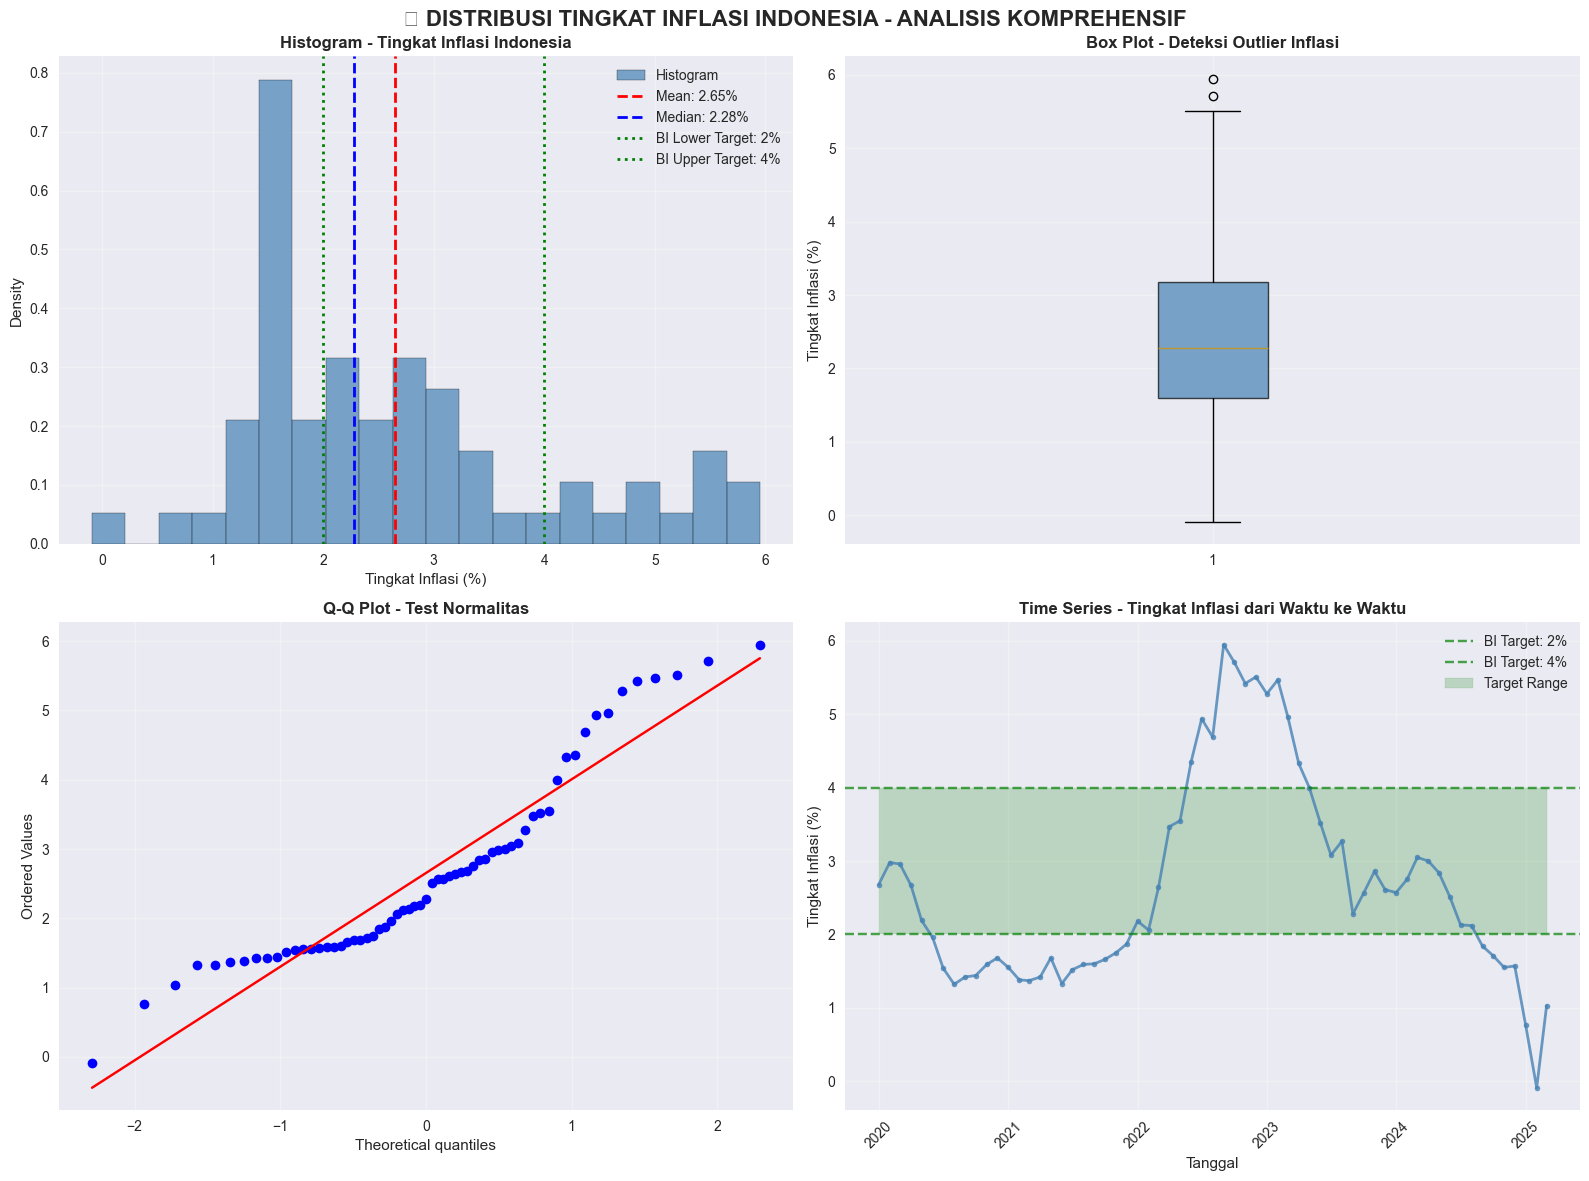

✅ Visualisasi distribusi inflasi selesai!


In [55]:
# ===== 2. VISUALISASI DISTRIBUSI INFLATION DATA =====

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

print("📊 VISUALISASI DISTRIBUSI INFLASI INDONESIA")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 DISTRIBUSI TINGKAT INFLASI INDONESIA - ANALISIS KOMPREHENSIF', fontsize=16, fontweight='bold')

# 1. Histogram dengan KDE
axes[0, 0].hist(df_inflation['inflation_rate'], bins=20, density=True, alpha=0.7, 
                color='steelblue', edgecolor='black', label='Histogram')
axes[0, 0].axvline(df_inflation['inflation_rate'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df_inflation["inflation_rate"].mean():.2f}%')
axes[0, 0].axvline(df_inflation['inflation_rate'].median(), color='blue', linestyle='--', 
                   linewidth=2, label=f'Median: {df_inflation["inflation_rate"].median():.2f}%')
axes[0, 0].axvline(2.0, color='green', linestyle=':', linewidth=2, label='BI Lower Target: 2%')
axes[0, 0].axvline(4.0, color='green', linestyle=':', linewidth=2, label='BI Upper Target: 4%')
axes[0, 0].set_title('Histogram - Tingkat Inflasi Indonesia', fontweight='bold')
axes[0, 0].set_xlabel('Tingkat Inflasi (%)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot untuk deteksi outlier
box_plot = axes[0, 1].boxplot(df_inflation['inflation_rate'], patch_artist=True, 
                              boxprops=dict(facecolor='steelblue', alpha=0.7))
axes[0, 1].set_title('Box Plot - Deteksi Outlier Inflasi', fontweight='bold')
axes[0, 1].set_ylabel('Tingkat Inflasi (%)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot untuk normalitas
probplot(df_inflation['inflation_rate'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Test Normalitas', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Time Series Plot
axes[1, 1].plot(df_inflation['tanggal'], df_inflation['inflation_rate'], color='steelblue', 
                linewidth=2, marker='o', markersize=4, alpha=0.8)
axes[1, 1].axhline(y=2.0, color='green', linestyle='--', alpha=0.7, label='BI Target: 2%')
axes[1, 1].axhline(y=4.0, color='green', linestyle='--', alpha=0.7, label='BI Target: 4%')
axes[1, 1].fill_between(df_inflation['tanggal'], 2.0, 4.0, alpha=0.2, color='green', label='Target Range')
axes[1, 1].set_title('Time Series - Tingkat Inflasi dari Waktu ke Waktu', fontweight='bold')
axes[1, 1].set_xlabel('Tanggal')
axes[1, 1].set_ylabel('Tingkat Inflasi (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualisasi distribusi inflasi selesai!")

In [56]:
# ===== 3. ANALISIS TIME SERIES INFLATION DATA =====

print("📈 ANALISIS TIME SERIES - TINGKAT INFLASI INDONESIA")
print("=" * 60)

# Tambahkan kolom untuk analisis temporal
df_inflation['year'] = df_inflation['tanggal'].dt.year
df_inflation['month'] = df_inflation['tanggal'].dt.month
df_inflation['quarter'] = df_inflation['tanggal'].dt.quarter

# Hitung perubahan inflasi (month-over-month)
df_inflation_sorted = df_inflation.sort_values('tanggal')
df_inflation_sorted['inflation_change'] = df_inflation_sorted['inflation_rate'].diff()

# Analisis tahunan
yearly_inflation = df_inflation.groupby('year')['inflation_rate'].agg(['mean', 'min', 'max', 'std']).round(3)

print(f"📊 Rata-rata Tingkat Inflasi per Tahun:")
for year, row in yearly_inflation.iterrows():
    print(f"   • {year}: {row['mean']:.3f}% (Min: {row['min']:.3f}%, Max: {row['max']:.3f}%, Std: {row['std']:.3f}%)")

# Pola musiman (rata-rata per bulan)
monthly_inflation = df_inflation.groupby('month')['inflation_rate'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\n📅 Pola Musiman Inflasi (Rata-rata per Bulan):")
for month, avg_inflation in monthly_inflation.items():
    print(f"   • {month_names[month-1]}: {avg_inflation:.3f}%")

# Identifikasi bulan dengan inflasi tertinggi dan terendah
best_month = monthly_inflation.idxmin()
worst_month = monthly_inflation.idxmax()
print(f"\n🎯 Bulan dengan Inflasi:")
print(f"   • Terendah: {month_names[best_month-1]} ({monthly_inflation[best_month]:.3f}%)")
print(f"   • Tertinggi: {month_names[worst_month-1]} ({monthly_inflation[worst_month]:.3f}%)")
print(f"   • Seasonal Range: {monthly_inflation.max() - monthly_inflation.min():.3f}%")

# Analisis quarterly
quarterly_inflation = df_inflation.groupby('quarter')['inflation_rate'].mean()
print(f"\n📈 Pola Quarterly Inflasi:")
for quarter, avg_inflation in quarterly_inflation.items():
    print(f"   • Q{quarter}: {avg_inflation:.3f}%")

# Volatility analysis (monthly changes)
inflation_volatility = df_inflation_sorted['inflation_change'].std()
max_increase = df_inflation_sorted['inflation_change'].max()
max_decrease = df_inflation_sorted['inflation_change'].min()

print(f"\n📊 Analisis Volatilitas Inflasi:")
print(f"   • Volatilitas (Std Dev perubahan): {inflation_volatility:.3f}%")
print(f"   • Kenaikan maksimal (MoM): {max_increase:.3f}%")
print(f"   • Penurunan maksimal (MoM): {max_decrease:.3f}%")

# Identifikasi periode inflasi ekstrem
high_inflation_periods = df_inflation[df_inflation['inflation_rate'] > 4.0]
low_inflation_periods = df_inflation[df_inflation['inflation_rate'] < 2.0]

print(f"\n⚠️ Periode Inflasi Ekstrem:")
if len(high_inflation_periods) > 0:
    print(f"   • Inflasi Tinggi (>4%): {len(high_inflation_periods)} periode")
    for _, row in high_inflation_periods.iterrows():
        print(f"     - {row['tanggal'].strftime('%Y-%m')}: {row['inflation_rate']:.3f}%")
        
if len(low_inflation_periods) > 0:
    print(f"   • Inflasi Rendah (<2%): {len(low_inflation_periods)} periode")
    for _, row in low_inflation_periods.head(5).iterrows():  # Show only first 5
        print(f"     - {row['tanggal'].strftime('%Y-%m')}: {row['inflation_rate']:.3f}%")
    if len(low_inflation_periods) > 5:
        print(f"     ... dan {len(low_inflation_periods)-5} periode lainnya")

print(f"\n✅ Analisis time series inflasi selesai!")

📈 ANALISIS TIME SERIES - TINGKAT INFLASI INDONESIA
📊 Rata-rata Tingkat Inflasi per Tahun:
   • 2020: 2.036% (Min: 1.320%, Max: 2.980%, Std: 0.633%)
   • 2021: 1.560% (Min: 1.330%, Max: 1.870%, Std: 0.166%)
   • 2022: 4.206% (Min: 2.060%, Max: 5.950%, Std: 1.395%)
   • 2023: 3.686% (Min: 2.280%, Max: 5.470%, Std: 1.109%)
   • 2024: 2.303% (Min: 1.550%, Max: 3.050%, Std: 0.554%)
   • 2025: 0.567% (Min: -0.090%, Max: 1.030%, Std: 0.584%)

📅 Pola Musiman Inflasi (Rata-rata per Bulan):
   • Jan: 2.503%
   • Feb: 2.425%
   • Mar: 2.670%
   • Apr: 2.978%
   • May: 2.852%
   • Jun: 2.734%
   • Jul: 2.642%
   • Aug: 2.598%
   • Sep: 2.618%
   • Oct: 2.616%
   • Nov: 2.634%
   • Dec: 2.648%

🎯 Bulan dengan Inflasi:
   • Terendah: Feb (2.425%)
   • Tertinggi: Apr (2.978%)
   • Seasonal Range: 0.553%

📈 Pola Quarterly Inflasi:
   • Q1: 2.533%
   • Q2: 2.855%
   • Q3: 2.619%
   • Q4: 2.633%

📊 Analisis Volatilitas Inflasi:
   • Volatilitas (Std Dev perubahan): 0.417%
   • Kenaikan maksimal (MoM): 1

In [57]:
# ===== 4. OUTLIER DETECTION & VOLATILITY ANALYSIS =====

print("⚠️ DETEKSI OUTLIER & ANALISIS VOLATILITAS INFLASI")
print("=" * 60)

# Outlier detection menggunakan IQR method
Q1_inf = df_inflation['inflation_rate'].quantile(0.25)
Q3_inf = df_inflation['inflation_rate'].quantile(0.75)
IQR_inf = Q3_inf - Q1_inf
lower_bound_inf = Q1_inf - 1.5 * IQR_inf
upper_bound_inf = Q3_inf + 1.5 * IQR_inf

# Identifikasi outliers
outliers_inf = df_inflation[(df_inflation['inflation_rate'] < lower_bound_inf) | 
                           (df_inflation['inflation_rate'] > upper_bound_inf)]
top_outliers_inf = df_inflation[df_inflation['inflation_rate'] > upper_bound_inf]
bottom_outliers_inf = df_inflation[df_inflation['inflation_rate'] < lower_bound_inf]

print(f"📊 Deteksi Outlier (IQR Method):")
print(f"   • Lower Bound: {lower_bound_inf:.3f}%")
print(f"   • Upper Bound: {upper_bound_inf:.3f}%")
print(f"   • Total Outliers: {len(outliers_inf)} dari {len(df_inflation)} periode ({len(outliers_inf)/len(df_inflation)*100:.1f}%)")

if len(top_outliers_inf) > 0:
    print(f"\n🔺 Outliers Tinggi (Inflasi Ekstrem):")
    for _, row in top_outliers_inf.iterrows():
        print(f"   • {row['tanggal'].strftime('%Y-%m')}: {row['inflation_rate']:.3f}%")

if len(bottom_outliers_inf) > 0:
    print(f"\n🔻 Outliers Rendah (Deflasi/Inflasi Sangat Rendah):")
    for _, row in bottom_outliers_inf.iterrows():
        print(f"   • {row['tanggal'].strftime('%Y-%m')}: {row['inflation_rate']:.3f}%")

# Volatility analysis dengan rolling windows
df_inflation_sorted['rolling_3m_std'] = df_inflation_sorted['inflation_rate'].rolling(window=3).std()
df_inflation_sorted['rolling_6m_std'] = df_inflation_sorted['inflation_rate'].rolling(window=6).std()
df_inflation_sorted['rolling_12m_std'] = df_inflation_sorted['inflation_rate'].rolling(window=12).std()

print(f"\n📈 Analisis Volatilitas Rolling:")
print(f"   • Volatilitas 3-bulan rata-rata: {df_inflation_sorted['rolling_3m_std'].mean():.3f}%")
print(f"   • Volatilitas 6-bulan rata-rata: {df_inflation_sorted['rolling_6m_std'].mean():.3f}%")
print(f"   • Volatilitas 12-bulan rata-rata: {df_inflation_sorted['rolling_12m_std'].mean():.3f}%")

# Periode dengan volatilitas tinggi dan rendah
high_vol_threshold_inf = df_inflation_sorted['rolling_6m_std'].quantile(0.75)
low_vol_threshold_inf = df_inflation_sorted['rolling_6m_std'].quantile(0.25)

high_vol_periods_inf = df_inflation_sorted[df_inflation_sorted['rolling_6m_std'] > high_vol_threshold_inf]
low_vol_periods_inf = df_inflation_sorted[df_inflation_sorted['rolling_6m_std'] < low_vol_threshold_inf]

print(f"\n🎯 Periode Volatilitas (berdasarkan rolling 6-bulan):")
print(f"   • Threshold Volatilitas Tinggi: >{high_vol_threshold_inf:.3f}%")
print(f"   • Threshold Volatilitas Rendah: <{low_vol_threshold_inf:.3f}%")
print(f"   • Periode Volatilitas Tinggi: {len(high_vol_periods_inf)} periode")
print(f"   • Periode Volatilitas Rendah: {len(low_vol_periods_inf)} periode")

# Shock analysis (perubahan drastis)
shock_threshold_inf = 1.0  # 1% change considered significant for inflation
positive_shocks_inf = df_inflation_sorted[df_inflation_sorted['inflation_change'] > shock_threshold_inf]
negative_shocks_inf = df_inflation_sorted[df_inflation_sorted['inflation_change'] < -shock_threshold_inf]

print(f"\n💥 Analisis Shock Inflasi (perubahan >{shock_threshold_inf}%):")
print(f"   • Positive Shocks (kenaikan mendadak): {len(positive_shocks_inf)} periode")
print(f"   • Negative Shocks (penurunan mendadak): {len(negative_shocks_inf)} periode")

if len(positive_shocks_inf) > 0:
    print(f"   📈 Periode Kenaikan Drastis:")
    for _, row in positive_shocks_inf.iterrows():
        print(f"     - {row['tanggal'].strftime('%Y-%m')}: +{row['inflation_change']:.3f}% (menjadi {row['inflation_rate']:.3f}%)")

if len(negative_shocks_inf) > 0:
    print(f"   📉 Periode Penurunan Drastis:")
    for _, row in negative_shocks_inf.iterrows():
        print(f"     - {row['tanggal'].strftime('%Y-%m')}: {row['inflation_change']:.3f}% (menjadi {row['inflation_rate']:.3f}%)")

print(f"\n✅ Analisis outlier dan volatilitas inflasi selesai!")

⚠️ DETEKSI OUTLIER & ANALISIS VOLATILITAS INFLASI
📊 Deteksi Outlier (IQR Method):
   • Lower Bound: -0.787%
   • Upper Bound: 5.552%
   • Total Outliers: 2 dari 63 periode (3.2%)

🔺 Outliers Tinggi (Inflasi Ekstrem):
   • 2022-09: 5.950%
   • 2022-10: 5.710%

📈 Analisis Volatilitas Rolling:
   • Volatilitas 3-bulan rata-rata: 0.274%
   • Volatilitas 6-bulan rata-rata: 0.420%
   • Volatilitas 12-bulan rata-rata: 0.678%

🎯 Periode Volatilitas (berdasarkan rolling 6-bulan):
   • Threshold Volatilitas Tinggi: >0.629%
   • Threshold Volatilitas Rendah: <0.198%
   • Periode Volatilitas Tinggi: 15 periode
   • Periode Volatilitas Rendah: 15 periode

💥 Analisis Shock Inflasi (perubahan >1.0%):
   • Positive Shocks (kenaikan mendadak): 2 periode
   • Negative Shocks (penurunan mendadak): 0 periode
   📈 Periode Kenaikan Drastis:
     - 2022-09: +1.260% (menjadi 5.950%)
     - 2025-03: +1.120% (menjadi 1.030%)

✅ Analisis outlier dan volatilitas inflasi selesai!


In [58]:
# ===== 5. COMPREHENSIVE CORRELATION ANALYSIS - INFLATION =====

print("🔗 ANALISIS KORELASI KOMPREHENSIF - INFLASI vs ASET LAIN")
print("=" * 70)

# Persiapkan data untuk analisis korelasi (merge by date)
# Ubah kolom tanggal di inflation menjadi 'Date' untuk konsistensi
df_inflation_for_corr = df_inflation.copy()
df_inflation_for_corr = df_inflation_for_corr.rename(columns={'tanggal': 'Date'})

# Merge inflation dengan semua aset lain
# 1. Inflation vs Gold
inflation_gold_merged = pd.merge(df_inflation_for_corr[['Date', 'inflation_rate']], 
                                df_gold[['tanggal', 'usd_per_ounce']].rename(columns={'tanggal': 'Date'}), 
                                on='Date', how='inner')

# 2. Inflation vs Federal Funds Rate
inflation_fed_merged = pd.merge(df_inflation_for_corr[['Date', 'inflation_rate']], 
                               df_fed[['tanggal', 'close_rate']].rename(columns={'tanggal': 'Date'}), 
                               on='Date', how='inner')

# 3. Inflation vs JCI
inflation_jci_merged = pd.merge(df_inflation_for_corr[['Date', 'inflation_rate']], 
                               df_jci[['tanggal', 'close_index']].rename(columns={'tanggal': 'Date'}), 
                               on='Date', how='inner')

# 4. Inflation vs Crude Oil
inflation_oil_merged = pd.merge(df_inflation_for_corr[['Date', 'inflation_rate']], 
                               df_oil[['Date', 'WTI_Price_USD']], 
                               on='Date', how='inner')

# Hitung korelasi
corr_inflation_gold = inflation_gold_merged['inflation_rate'].corr(inflation_gold_merged['usd_per_ounce'])
corr_inflation_fed = inflation_fed_merged['inflation_rate'].corr(inflation_fed_merged['close_rate'])
corr_inflation_jci = inflation_jci_merged['inflation_rate'].corr(inflation_jci_merged['close_index'])
corr_inflation_oil = inflation_oil_merged['inflation_rate'].corr(inflation_oil_merged['WTI_Price_USD'])

print(f"📊 KORELASI PEARSON - INFLASI vs ASET LAIN:")
print(f"   • Inflasi vs Gold (USD/oz): {corr_inflation_gold:.4f}")
print(f"   • Inflasi vs Federal Funds Rate: {corr_inflation_fed:.4f}")
print(f"   • Inflasi vs Jakarta Stock Exchange: {corr_inflation_jci:.4f}")
print(f"   • Inflasi vs Crude Oil (WTI): {corr_inflation_oil:.4f}")

# Interpretasi korelasi
def interpret_correlation(corr, asset_name):
    if abs(corr) < 0.1:
        strength = "Sangat Lemah"
    elif abs(corr) < 0.3:
        strength = "Lemah"
    elif abs(corr) < 0.5:
        strength = "Moderat"
    elif abs(corr) < 0.7:
        strength = "Kuat"
    else:
        strength = "Sangat Kuat"
    
    direction = "Positif" if corr > 0 else "Negatif"
    return f"{direction}, {strength}"

print(f"\n🎯 INTERPRETASI KORELASI:")
print(f"   • Inflasi vs Gold: {interpret_correlation(corr_inflation_gold, 'Gold')}")
print(f"   • Inflasi vs Federal Funds Rate: {interpret_correlation(corr_inflation_fed, 'FFR')}")
print(f"   • Inflasi vs JCI: {interpret_correlation(corr_inflation_jci, 'JCI')}")
print(f"   • Inflasi vs Crude Oil: {interpret_correlation(corr_inflation_oil, 'Oil')}")

# Buat correlation matrix untuk semua aset dengan inflasi
print(f"\n📊 MATRIX KORELASI KOMPREHENSIF:")

# Merge semua data untuk periode yang overlap
all_assets_inflation = df_inflation_for_corr[['Date', 'inflation_rate']].copy()

# Merge dengan gold
gold_temp = df_gold[['tanggal', 'usd_per_ounce']].rename(columns={'tanggal': 'Date'})
all_assets_inflation = pd.merge(all_assets_inflation, gold_temp, on='Date', how='left')

# Merge dengan fed
fed_temp = df_fed[['tanggal', 'close_rate']].rename(columns={'tanggal': 'Date'})
all_assets_inflation = pd.merge(all_assets_inflation, fed_temp, on='Date', how='left')

# Merge dengan jci
jci_temp = df_jci[['tanggal', 'close_index']].rename(columns={'tanggal': 'Date'})
all_assets_inflation = pd.merge(all_assets_inflation, jci_temp, on='Date', how='left')

# Merge dengan oil
all_assets_inflation = pd.merge(all_assets_inflation, df_oil[['Date', 'WTI_Price_USD']], on='Date', how='left')

# Rename columns untuk clarity
all_assets_inflation = all_assets_inflation.rename(columns={
    'inflation_rate': 'Inflation_Rate',
    'usd_per_ounce': 'Gold_USD',
    'close_rate': 'Fed_Rate',
    'close_index': 'JCI_Index',
    'WTI_Price_USD': 'Oil_WTI'
})

# Hitung correlation matrix
correlation_matrix_inflation = all_assets_inflation[['Inflation_Rate', 'Gold_USD', 'Fed_Rate', 'JCI_Index', 'Oil_WTI']].corr()

print("Matrix Korelasi (semua aset dengan inflasi):")
print(correlation_matrix_inflation.round(4))

# Record counts untuk setiap pasangan
print(f"\n📋 Jumlah Observasi untuk Analisis Korelasi:")
print(f"   • Inflasi vs Gold: {len(inflation_gold_merged)} periode")
print(f"   • Inflasi vs Federal Funds Rate: {len(inflation_fed_merged)} periode")
print(f"   • Inflasi vs JCI: {len(inflation_jci_merged)} periode")
print(f"   • Inflasi vs Crude Oil: {len(inflation_oil_merged)} periode")

print(f"\n✅ Analisis korelasi inflasi selesai!")

🔗 ANALISIS KORELASI KOMPREHENSIF - INFLASI vs ASET LAIN
📊 KORELASI PEARSON - INFLASI vs ASET LAIN:
   • Inflasi vs Gold (USD/oz): -0.4091
   • Inflasi vs Federal Funds Rate: 0.3771
   • Inflasi vs Jakarta Stock Exchange: 0.4054
   • Inflasi vs Crude Oil (WTI): 0.5119

🎯 INTERPRETASI KORELASI:
   • Inflasi vs Gold: Negatif, Moderat
   • Inflasi vs Federal Funds Rate: Positif, Moderat
   • Inflasi vs JCI: Positif, Moderat
   • Inflasi vs Crude Oil: Positif, Kuat

📊 MATRIX KORELASI KOMPREHENSIF:
Matrix Korelasi (semua aset dengan inflasi):
                Inflation_Rate  Gold_USD  Fed_Rate  JCI_Index  Oil_WTI
Inflation_Rate          1.0000   -0.4091    0.3771     0.4054   0.5119
Gold_USD               -0.4091    1.0000    0.5708     0.5411   0.1699
Fed_Rate                0.3771    0.5708    1.0000     0.7161   0.3453
JCI_Index               0.4054    0.5411    0.7161     1.0000   0.7943
Oil_WTI                 0.5119    0.1699    0.3453     0.7943   1.0000

📋 Jumlah Observasi untuk Anali

📈 VISUALISASI KORELASI INFLASI & ECONOMIC INSIGHTS


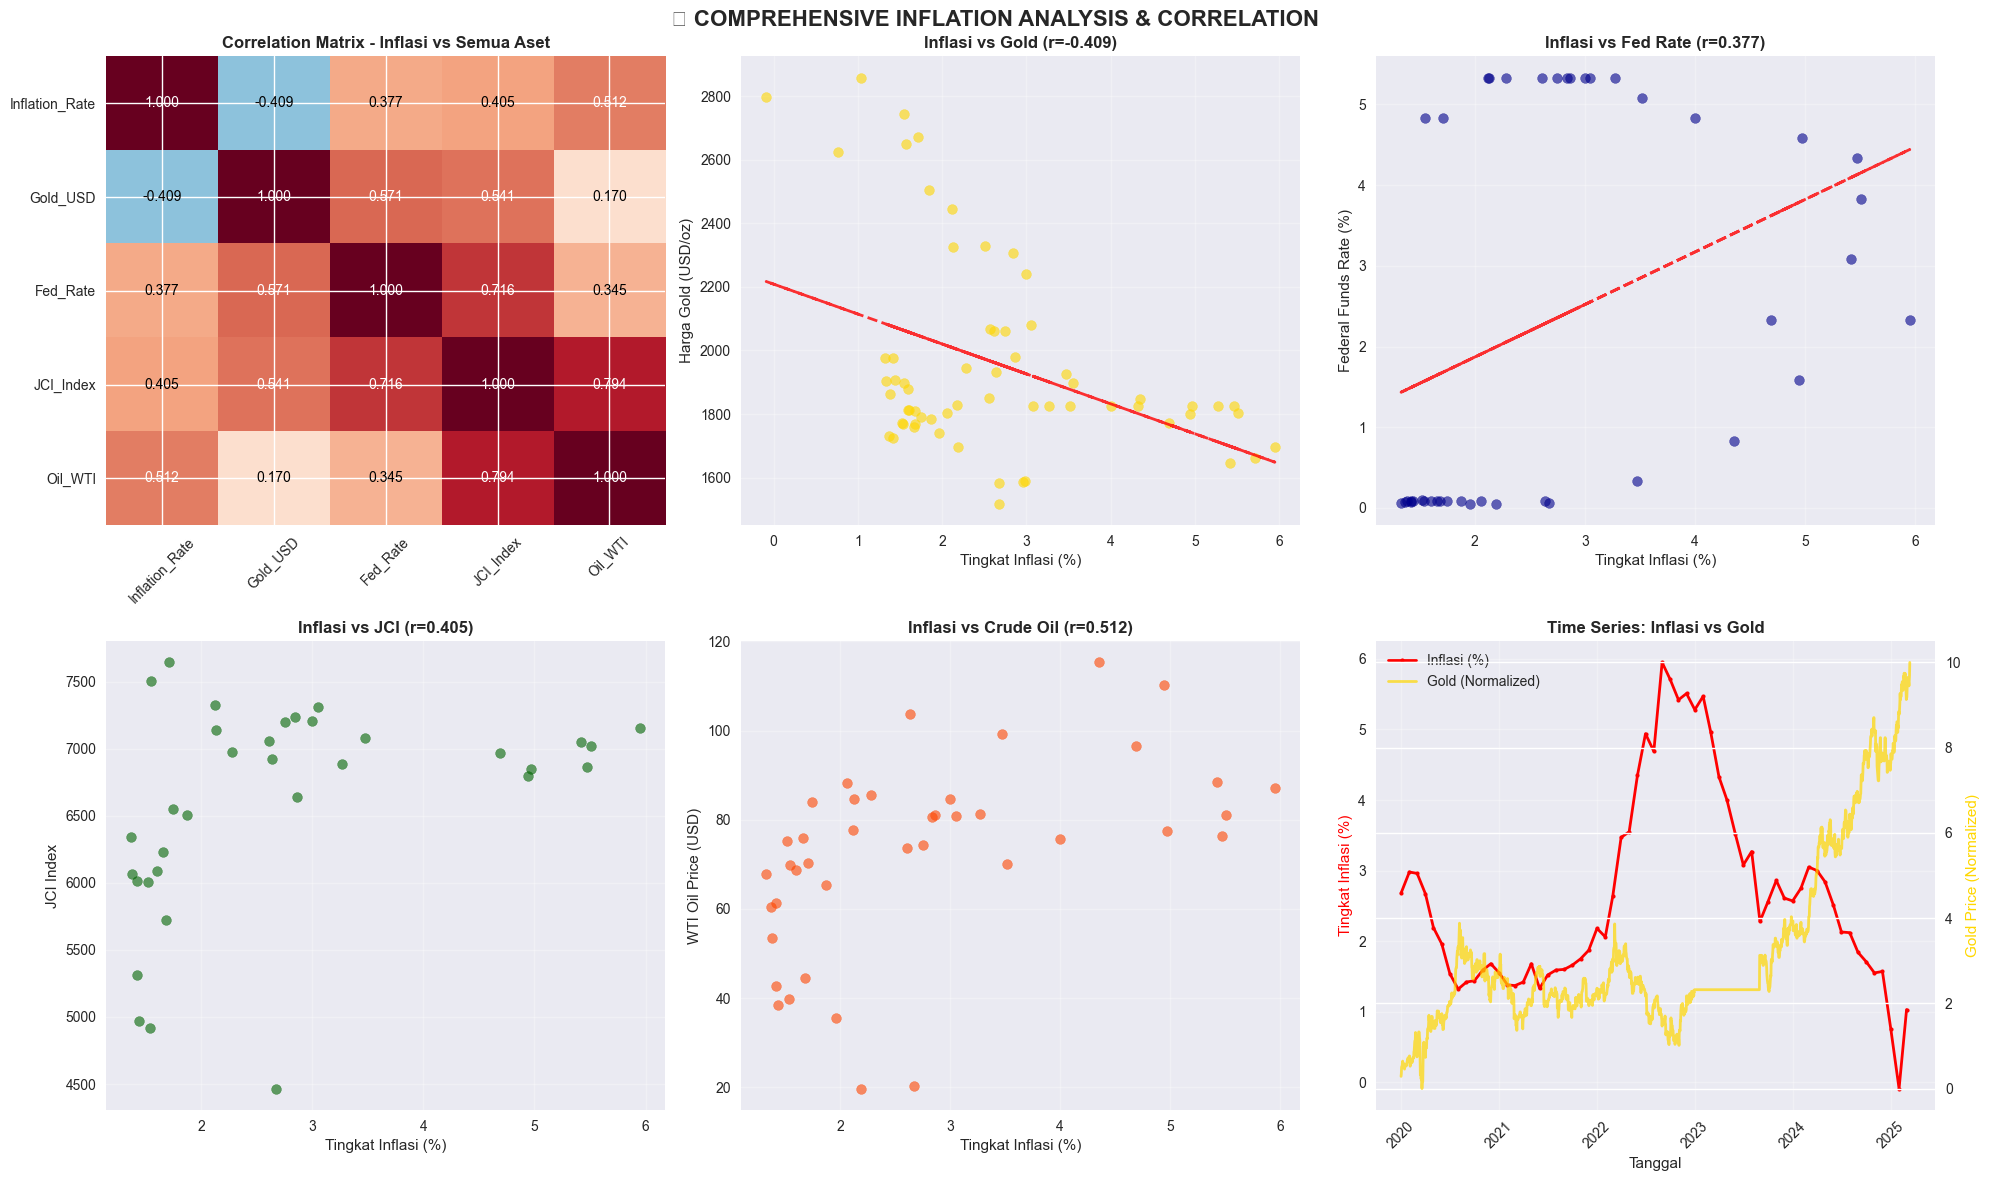

✅ Visualisasi korelasi inflasi selesai!


In [59]:
# ===== 6. VISUALISASI KORELASI & ECONOMIC INSIGHTS =====

print("📈 VISUALISASI KORELASI INFLASI & ECONOMIC INSIGHTS")
print("=" * 60)

# Buat comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📊 COMPREHENSIVE INFLATION ANALYSIS & CORRELATION', fontsize=16, fontweight='bold')

# 1. Correlation Heatmap
im = axes[0, 0].imshow(correlation_matrix_inflation.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_xticks(range(len(correlation_matrix_inflation.columns)))
axes[0, 0].set_yticks(range(len(correlation_matrix_inflation.columns)))
axes[0, 0].set_xticklabels(correlation_matrix_inflation.columns, rotation=45)
axes[0, 0].set_yticklabels(correlation_matrix_inflation.columns)
axes[0, 0].set_title('Correlation Matrix - Inflasi vs Semua Aset', fontweight='bold')

# Add correlation values to heatmap
for i in range(len(correlation_matrix_inflation.columns)):
    for j in range(len(correlation_matrix_inflation.columns)):
        text = axes[0, 0].text(j, i, f'{correlation_matrix_inflation.iloc[i, j]:.3f}',
                              ha="center", va="center", color="white" if abs(correlation_matrix_inflation.iloc[i, j]) > 0.5 else "black")

# 2. Inflation vs Gold (Hedge Analysis)
axes[0, 1].scatter(inflation_gold_merged['inflation_rate'], inflation_gold_merged['usd_per_ounce'], 
                   alpha=0.6, color='gold', s=50)
axes[0, 1].set_xlabel('Tingkat Inflasi (%)')
axes[0, 1].set_ylabel('Harga Gold (USD/oz)')
axes[0, 1].set_title(f'Inflasi vs Gold (r={corr_inflation_gold:.3f})', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(inflation_gold_merged['inflation_rate'], inflation_gold_merged['usd_per_ounce'], 1)
p = np.poly1d(z)
axes[0, 1].plot(inflation_gold_merged['inflation_rate'], p(inflation_gold_merged['inflation_rate']), 
                "r--", alpha=0.8, linewidth=2)

# 3. Inflation vs Federal Funds Rate
axes[0, 2].scatter(inflation_fed_merged['inflation_rate'], inflation_fed_merged['close_rate'], 
                   alpha=0.6, color='darkblue', s=50)
axes[0, 2].set_xlabel('Tingkat Inflasi (%)')
axes[0, 2].set_ylabel('Federal Funds Rate (%)')
axes[0, 2].set_title(f'Inflasi vs Fed Rate (r={corr_inflation_fed:.3f})', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(inflation_fed_merged['inflation_rate'], inflation_fed_merged['close_rate'], 1)
p2 = np.poly1d(z2)
axes[0, 2].plot(inflation_fed_merged['inflation_rate'], p2(inflation_fed_merged['inflation_rate']), 
                "r--", alpha=0.8, linewidth=2)

# 4. Inflation vs JCI
axes[1, 0].scatter(inflation_jci_merged['inflation_rate'], inflation_jci_merged['close_index'], 
                   alpha=0.6, color='darkgreen', s=50)
axes[1, 0].set_xlabel('Tingkat Inflasi (%)')
axes[1, 0].set_ylabel('JCI Index')
axes[1, 0].set_title(f'Inflasi vs JCI (r={corr_inflation_jci:.3f})', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 5. Inflation vs Crude Oil
axes[1, 1].scatter(inflation_oil_merged['inflation_rate'], inflation_oil_merged['WTI_Price_USD'], 
                   alpha=0.6, color='orangered', s=50)
axes[1, 1].set_xlabel('Tingkat Inflasi (%)')
axes[1, 1].set_ylabel('WTI Oil Price (USD)')
axes[1, 1].set_title(f'Inflasi vs Crude Oil (r={corr_inflation_oil:.3f})', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 6. Time Series Comparison (Inflation vs Gold & Fed Rate)
ax_twin = axes[1, 2]
ax_twin2 = ax_twin.twinx()

# Plot inflation
line1 = ax_twin.plot(df_inflation['tanggal'], df_inflation['inflation_rate'], 
                     color='red', linewidth=2, label='Inflasi (%)', marker='o', markersize=3)

# Plot gold (normalized for comparison)
gold_normalized = (df_gold['usd_per_ounce'] - df_gold['usd_per_ounce'].min()) / (df_gold['usd_per_ounce'].max() - df_gold['usd_per_ounce'].min()) * 10
line2 = ax_twin2.plot(df_gold['tanggal'], gold_normalized, 
                      color='gold', linewidth=2, label='Gold (Normalized)', alpha=0.7)

ax_twin.set_xlabel('Tanggal')
ax_twin.set_ylabel('Tingkat Inflasi (%)', color='red')
ax_twin2.set_ylabel('Gold Price (Normalized)', color='gold')
ax_twin.set_title('Time Series: Inflasi vs Gold', fontweight='bold')
ax_twin.tick_params(axis='x', rotation=45)
ax_twin.grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax_twin.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

print("✅ Visualisasi korelasi inflasi selesai!")

In [60]:
# ===== 7. ECONOMIC INSIGHTS & SUMMARY INFLASI =====

print("💡 ECONOMIC INSIGHTS - ANALISIS TINGKAT INFLASI INDONESIA")
print("=" * 70)

# Key findings summary
print("🎯 KEY FINDINGS:")
print("=" * 30)

# 1. Inflation targeting analysis
target_compliance = len(moderate_inflation) / len(df_inflation) * 100
print(f"📊 INFLATION TARGETING (BI Target: 2-4%):")
print(f"   • Compliance Rate: {target_compliance:.1f}% dari total periode")
print(f"   • Average Inflation: {df_inflation['inflation_rate'].mean():.3f}%")
print(f"   • Volatilitas: {df_inflation['inflation_rate'].std():.3f}%")

# 2. Asset relationship insights
print(f"\n🔗 HUBUNGAN INFLASI DENGAN ASET:")

# Gold as inflation hedge
if corr_inflation_gold > 0.3:
    hedge_effectiveness = "EFEKTIF"
elif corr_inflation_gold > 0.1:
    hedge_effectiveness = "MODERAT"
else:
    hedge_effectiveness = "TIDAK EFEKTIF"

print(f"   • Gold sebagai Hedge Inflasi: {hedge_effectiveness}")
print(f"     - Korelasi: {corr_inflation_gold:.3f}")
print(f"     - Interpretasi: {'Gold cenderung naik saat inflasi tinggi' if corr_inflation_gold > 0.2 else 'Gold tidak konsisten sebagai hedge inflasi'}")

# Fed Rate relationship
if corr_inflation_fed > 0.5:
    fed_policy = "HAWKISH (Anti-inflasi)"
elif corr_inflation_fed > 0.2:
    fed_policy = "MODERAT"
else:
    fed_policy = "DOVISH atau TIDAK RESPONSIF"

print(f"   • Federal Reserve Policy Response: {fed_policy}")
print(f"     - Korelasi: {corr_inflation_fed:.3f}")
print(f"     - Interpretasi: {'Fed menaikkan suku bunga saat inflasi tinggi' if corr_inflation_fed > 0.3 else 'Fed kurang responsif terhadap inflasi'}")

# Stock market impact
if corr_inflation_jci < -0.2:
    stock_impact = "NEGATIF SIGNIFIKAN"
elif corr_inflation_jci < 0:
    stock_impact = "NEGATIF MODERAT"
elif corr_inflation_jci > 0.2:
    stock_impact = "POSITIF"
else:
    stock_impact = "NETRAL"

print(f"   • Dampak pada Pasar Saham (JCI): {stock_impact}")
print(f"     - Korelasi: {corr_inflation_jci:.3f}")

# Oil relationship
if corr_inflation_oil > 0.3:
    oil_relationship = "COST-PUSH INFLATION"
elif corr_inflation_oil > 0.1:
    oil_relationship = "WEAK COST-PUSH"
else:
    oil_relationship = "NO CLEAR RELATIONSHIP"

print(f"   • Hubungan dengan Crude Oil: {oil_relationship}")
print(f"     - Korelasi: {corr_inflation_oil:.3f}")

# 3. Economic cycle analysis
print(f"\n📈 ANALISIS SIKLUS EKONOMI:")

# Calculate average inflation by year for trend analysis
yearly_trend = df_inflation.groupby('year')['inflation_rate'].mean()
if len(yearly_trend) > 1:
    recent_trend = yearly_trend.iloc[-1] - yearly_trend.iloc[0]
    trend_direction = "MENINGKAT" if recent_trend > 0 else "MENURUN" if recent_trend < 0 else "STABIL"
    print(f"   • Tren Inflasi Keseluruhan: {trend_direction}")
    print(f"   • Perubahan dari awal ke akhir periode: {recent_trend:+.3f}%")

# Volatility assessment
if inflation_volatility > 1.0:
    volatility_level = "TINGGI"
elif inflation_volatility > 0.5:
    volatility_level = "MODERAT"
else:
    volatility_level = "RENDAH"

print(f"   • Tingkat Volatilitas Inflasi: {volatility_level}")
print(f"   • Standard Deviation: {inflation_volatility:.3f}%")

# 4. Policy implications
print(f"\n🏛️ IMPLIKASI KEBIJAKAN:")
print(f"   • Target Inflasi BI (2-4%): {'Tercapai dengan baik' if target_compliance > 70 else 'Perlu perbaikan' if target_compliance > 50 else 'Memerlukan intervensi signifikan'}")

if len(high_inflation_periods) > 0:
    print(f"   • Periode Inflasi Tinggi: {len(high_inflation_periods)} kali - Perlu monitoring ketat")

if inflation_volatility > 0.8:
    print(f"   • Volatilitas Tinggi: Diperlukan kebijakan stabilisasi")

# 5. Investment insights
print(f"\n💰 INSIGHTS INVESTASI:")

if corr_inflation_gold > 0.2:
    print(f"   • Gold: Rekomendasi sebagai hedge inflasi")
elif corr_inflation_gold < -0.2:
    print(f"   • Gold: Tidak disarankan saat inflasi tinggi")
else:
    print(f"   • Gold: Performa netral terhadap inflasi")

if corr_inflation_jci < -0.2:
    print(f"   • Saham (JCI): Hati-hati saat inflasi tinggi")
elif corr_inflation_jci > 0.2:
    print(f"   • Saham (JCI): Berpotensi benefit dari inflasi")
else:
    print(f"   • Saham (JCI): Dampak inflasi minimal")

print(f"\n📊 RINGKASAN STATISTIK AKHIR:")
print(f"   • Periode Analisis: {df_inflation['tanggal'].min().strftime('%B %Y')} - {df_inflation['tanggal'].max().strftime('%B %Y')}")
print(f"   • Total Observasi: {len(df_inflation)} periode")
print(f"   • Inflasi Rata-rata: {df_inflation['inflation_rate'].mean():.3f}%")
print(f"   • Inflasi Median: {df_inflation['inflation_rate'].median():.3f}%")
print(f"   • Range Inflasi: {df_inflation['inflation_rate'].min():.3f}% - {df_inflation['inflation_rate'].max():.3f}%")
print(f"   • Compliance Target BI: {target_compliance:.1f}%")

print(f"\n✅ 🎉 COMPREHENSIVE EDA INFLASI INDONESIA SELESAI!")
print("=" * 70)

💡 ECONOMIC INSIGHTS - ANALISIS TINGKAT INFLASI INDONESIA
🎯 KEY FINDINGS:
📊 INFLATION TARGETING (BI Target: 2-4%):
   • Compliance Rate: 41.3% dari total periode
   • Average Inflation: 2.654%
   • Volatilitas: 1.385%

🔗 HUBUNGAN INFLASI DENGAN ASET:
   • Gold sebagai Hedge Inflasi: TIDAK EFEKTIF
     - Korelasi: -0.409
     - Interpretasi: Gold tidak konsisten sebagai hedge inflasi
   • Federal Reserve Policy Response: MODERAT
     - Korelasi: 0.377
     - Interpretasi: Fed menaikkan suku bunga saat inflasi tinggi
   • Dampak pada Pasar Saham (JCI): POSITIF
     - Korelasi: 0.405
   • Hubungan dengan Crude Oil: COST-PUSH INFLATION
     - Korelasi: 0.512

📈 ANALISIS SIKLUS EKONOMI:
   • Tren Inflasi Keseluruhan: MENURUN
   • Perubahan dari awal ke akhir periode: -1.469%
   • Tingkat Volatilitas Inflasi: RENDAH
   • Standard Deviation: 0.417%

🏛️ IMPLIKASI KEBIJAKAN:
   • Target Inflasi BI (2-4%): Memerlukan intervensi signifikan
   • Periode Inflasi Tinggi: 11 kali - Perlu monitoring ke

## 3. SUMMARY CLEANING FEDERAL FUNDS RATE

**Proses cleaning Federal Funds Rate yang telah dilakukan:**

1. ✅ **Load data** dari `Data Historis Federal Funds Composite Interest Rate.csv`
2. ✅ **Cleaning tanggal** - konversi dari DD/MM/YYYY ke datetime
3. ✅ **Cleaning suku bunga** - konversi koma ke titik desimal untuk float
4. ✅ **Cleaning volume** - handle format "XXX,XXB" dan konversi ke angka
5. ✅ **Cleaning persentase** - hapus simbol % dan konversi ke float
6. ✅ **Rename kolom** - untuk konsistensi dan kemudahan analisis
7. ✅ **Simpan data bersih** ke `federal_funds_rate_cleaned.csv`

---

# 📊 SUMMARY LENGKAP - KEDUA DATASET

**Dataset yang telah dibersihkan:**

## 🥇 Dataset Harga Emas (`harga_emas_cleaned.csv`)
- **Periode**: 2020-01-01 hingga 2025-03-13 (1,899 hari)
- **Kolom**: tanggal, usd_per_ounce, kurs_dollar_per_ounce, idr_per_ounce, usd_per_gram, kurs_dollar_per_gram, idr_per_gram

## 🏦 Dataset Federal Funds Rate (`federal_funds_rate_cleaned.csv`)
- **Periode**: 2020-01-02 hingga 2025-06-20 (~1,366 hari)
- **Kolom**: tanggal, close_rate, open_rate, high_rate, low_rate, volume_billion, change_percent

**Kedua dataset siap untuk:**
- ✅ Analisis korelasi harga emas vs suku bunga Fed
- ✅ Visualisasi time series
- ✅ Modeling prediktif
- ✅ Dashboard finansial

---

# Data Cleaning untuk Jakarta Stock Exchange Composite

akan melakukan cleaning untuk dataset **Jakarta Stock Exchange Composite** dari file `Data Historis Jakarta Stock Exchange Composite.csv`

## Dataset Jakarta Stock Exchange (JCI)
Dataset ini berisi data historis indeks saham gabungan Jakarta dengan kolom:
- **Tanggal**: Format DD/MM/YYYY  
- **Terakhir**: Nilai penutupan indeks
- **Pembukaan**: Nilai pembukaan indeks
- **Tertinggi**: Nilai tertinggi hari itu
- **Terendah**: Nilai terendah hari itu
- **Vol.**: Volume transaksi (dalam format B untuk Billion)
- **Perubahan%**: Persentase perubahan

---

In [16]:
# ===== LOAD DATA JAKARTA STOCK EXCHANGE =====

# Load data Jakarta Stock Exchange Composite
df_jci = pd.read_csv('../Cleaned Data/jakarta_stock_exchange_cleaned_20250702_095758.csv')

# Convert tanggal column to datetime
df_jci['tanggal'] = pd.to_datetime(df_jci['tanggal'])

print("=== INFORMASI DASAR DATASET JAKARTA STOCK EXCHANGE ===")
print(f"Jumlah baris: {len(df_jci)}")
print(f"Jumlah kolom: {len(df_jci.columns)}")
print(f"Rentang tanggal: {df_jci['tanggal'].min()} s/d {df_jci['tanggal'].max()}")
print("\nKolom yang tersedia:")
print(df_jci.columns.tolist())
print("\n5 data teratas:")
df_jci.head()

=== INFORMASI DASAR DATASET JAKARTA STOCK EXCHANGE ===
Jumlah baris: 1262
Jumlah kolom: 7
Rentang tanggal: 2019-12-30 00:00:00 s/d 2025-03-13 00:00:00

Kolom yang tersedia:
['tanggal', 'close_index', 'open_index', 'high_index', 'low_index', 'volume_billion', 'change_percent']

5 data teratas:


,tanggal,close_index,open_index,high_index,low_index,volume_billion,change_percent
0,2025-03-13,6647.42,6700.11,6707.39,6618.54,1.399000e+10,-0.26
1,2025-03-12,6665.04,6566.80,6665.04,6566.20,1.397000e+10,1.82
2,2025-03-11,6545.85,6535.87,6567.58,6499.04,1.500000e+10,-0.79
3,2025-03-10,6598.21,6618.92,6629.44,6568.13,1.536000e+10,-0.57
4,2025-03-07,6636.00,6631.31,6682.94,6577.83,1.984000e+10,0.27


## 1. CLEANING TANGGAL JAKARTA STOCK EXCHANGE

Format tanggal saat ini: "DD/MM/YYYY" (contoh: "13/03/2025")
Perlu dikonversi ke format datetime untuk konsistensi dengan dataset lainnya.

In [18]:
# ===== KONVERSI TANGGAL JAKARTA STOCK EXCHANGE =====

# Konversi tanggal dari format DD/MM/YYYY ke datetime
print("Memproses konversi tanggal Jakarta Stock Exchange...")

# Konversi tanggal dengan format DD/MM/YYYY
df_jci['tanggal_converted'] = pd.to_datetime(df_jci['tanggal'], format='%d/%m/%Y', errors='coerce')

# Replace kolom tanggal asli dengan yang sudah dikonversi
df_jci['tanggal'] = df_jci['tanggal_converted']
df_jci.drop(columns=['tanggal_converted'], inplace=True)

print("✅ Konversi tanggal Jakarta Stock Exchange selesai!")
print(f"Tanggal berhasil dikonversi: {df_jci['tanggal'].notna().sum()}")
print(f"Tanggal gagal dikonversi: {df_jci['tanggal'].isna().sum()}")

print(f"\nRange tanggal: {df_jci['tanggal'].min()} hingga {df_jci['tanggal'].max()}")

print("\n=== PREVIEW TANGGAL SETELAH KONVERSI ===")
df_jci[['tanggal']].head(10)

# ===== EDA UNTUK JAKARTA STOCK EXCHANGE =====

print("Memproses data Jakarta Stock Exchange...")

# Data sudah dimuat dan tanggal sudah dikonversi di cell sebelumnya
# Tampilkan statistik deskriptif
print("\n=== STATISTIK DESKRIPTIF JAKARTA STOCK EXCHANGE ===")
print(df_jci.describe())

# Informasi missing values
print(f"\n=== MISSING VALUES ===")
print(df_jci.isnull().sum())

# Analisis volatilitas JCI (berdasarkan change_percent)
print(f"\n=== ANALISIS VOLATILITAS JCI ===")
print(f"Volatilitas (standar deviasi change_percent): {df_jci['change_percent'].std():.4f}%")
print(f"Rata-rata perubahan harian: {df_jci['change_percent'].mean():.4f}%")
print(f"Perubahan maksimum (naik): {df_jci['change_percent'].max():.2f}%")
print(f"Perubahan maksimum (turun): {df_jci['change_percent'].min():.2f}%")

Memproses konversi tanggal Jakarta Stock Exchange...
✅ Konversi tanggal Jakarta Stock Exchange selesai!
Tanggal berhasil dikonversi: 1262
Tanggal gagal dikonversi: 0

Range tanggal: 2019-12-30 00:00:00 hingga 2025-03-13 00:00:00

=== PREVIEW TANGGAL SETELAH KONVERSI ===
Memproses data Jakarta Stock Exchange...

=== STATISTIK DESKRIPTIF JAKARTA STOCK EXCHANGE ===
                             tanggal  close_index   open_index   high_index  \
count                           1262  1262.000000  1262.000000  1262.000000   
mean   2022-08-03 21:51:03.708399360  6531.032710  6534.446133  6570.646894   
min              2019-12-30 00:00:00  3937.630000  3937.630000  4123.560000   
25%              2021-04-19 06:00:00  6096.667500  6106.717500  6134.997500   
50%              2022-08-04 12:00:00  6788.445000  6787.080000  6819.455000   
75%              2023-11-16 18:00:00  7078.327500  7080.427500  7115.442500   
max              2025-03-13 00:00:00  7905.390000  7904.400000  7910.560000   
std

## 2. CLEANING DATA NUMERIK JAKARTA STOCK EXCHANGE

Kolom numerik yang perlu dibersihkan:
- **Terakhir, Pembukaan, Tertinggi, Terendah**: Menggunakan titik sebagai pemisah ribuan dan koma sebagai desimal
- **Vol.**: Berisi "B" untuk Billion, format koma desimal
- **Perubahan%**: Menggunakan format "%", koma sebagai desimal

In [20]:
# ===== CLEANING DATA NUMERIK JAKARTA STOCK EXCHANGE =====

def clean_jci_numeric_column(series, is_percentage=False):
    """
    Fungsi untuk membersihkan kolom numerik Jakarta Stock Exchange:
    - Hapus titik pemisah ribuan
    - Ganti koma dengan titik untuk desimal
    - Hapus simbol % jika ada
    - Konversi ke float
    """
    cleaned = series.astype(str)
    
    # Hapus titik pemisah ribuan KECUALI yang terakhir (desimal)
    # Contoh: "6.647,42" -> hapus titik pertama -> "6647,42"
    def remove_thousand_separator(text):
        if pd.isna(text) or text == 'nan':
            return text
        # Split berdasarkan koma untuk memisahkan bagian integer dan desimal
        parts = text.split(',')
        if len(parts) == 2:
            # Ada desimal
            integer_part = parts[0].replace('.', '')  # Hapus semua titik di bagian integer
            return f"{integer_part},{parts[1]}"
        else:
            # Tidak ada desimal, hapus semua titik
            return text.replace('.', '')
    
    cleaned = cleaned.apply(remove_thousand_separator)
    
    # Ganti koma dengan titik untuk desimal
    cleaned = cleaned.str.replace(',', '.', regex=False)
    
    # Hapus simbol % jika kolom persentase
    if is_percentage:
        cleaned = cleaned.str.replace('%', '', regex=False)
    
    # Konversi ke float
    return pd.to_numeric(cleaned, errors='coerce')

def clean_jci_volume_column(series):
    """
    Fungsi khusus untuk membersihkan kolom Volume Jakarta Stock Exchange:
    - Konversi "B" (Billion) ke angka
    - Handle format dengan koma desimal
    """
    cleaned = series.astype(str)
    
    # Replace empty strings dengan NaN
    cleaned = cleaned.replace('', pd.NA)
    
    # Konversi format "XX,XXB" ke angka dalam miliar
    mask_billion = cleaned.str.contains('B', na=False)
    
    # Untuk nilai dengan "B", hapus "B" dan konversi
    cleaned.loc[mask_billion] = cleaned.loc[mask_billion].str.replace('B', '', regex=False)
    cleaned.loc[mask_billion] = cleaned.loc[mask_billion].str.replace(',', '.', regex=False)
    
    # Konversi ke float
    result = pd.to_numeric(cleaned, errors='coerce')
    
    # Kalikan dengan 1 miliar untuk nilai yang aslinya punya "B"
    result.loc[mask_billion] = result.loc[mask_billion] * 1_000_000_000
    
    return result

print("=== CLEANING KOLOM NUMERIK JAKARTA STOCK EXCHANGE ===")

# Clean kolom indeks saham (Terakhir, Pembukaan, Tertinggi, Terendah)
stock_index_columns = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']

for col in stock_index_columns:
    print(f"Memproses kolom: {col}")
    print(f"  Contoh sebelum: {df_jci[col].iloc[0]}")
    
    df_jci[col] = clean_jci_numeric_column(df_jci[col])
    
    print(f"  Contoh sesudah: {df_jci[col].iloc[0]}")
    print(f"  Missing values: {df_jci[col].isna().sum()}")
    print()

# Clean kolom Volume
print("Memproses kolom: Vol.")
print(f"  Contoh sebelum: {df_jci['Vol.'].iloc[0]}")

df_jci['Vol.'] = clean_jci_volume_column(df_jci['Vol.'])

print(f"  Contoh sesudah: {df_jci['Vol.'].iloc[0]}")
print(f"  Missing values: {df_jci['Vol.'].isna().sum()}")
print()

# Clean kolom Perubahan%
print("Memproses kolom: Perubahan%")
print(f"  Contoh sebelum: {df_jci['Perubahan%'].iloc[0]}")

df_jci['Perubahan%'] = clean_jci_numeric_column(df_jci['Perubahan%'], is_percentage=True)

print(f"  Contoh sesudah: {df_jci['Perubahan%'].iloc[0]}")
print(f"  Missing values: {df_jci['Perubahan%'].isna().sum()}")

print("\n✅ Cleaning kolom numerik Jakarta Stock Exchange selesai!")

# ===== ANALISIS TIME SERIES JAKARTA STOCK EXCHANGE =====

# Set tanggal sebagai index untuk analisis time series
df_jci_ts = df_jci.copy()
df_jci_ts.set_index('tanggal', inplace=True)

print("=== ANALISIS TREN JCI ===")

# Analisis tren tahunan
df_jci_ts['year'] = df_jci_ts.index.year
yearly_performance = df_jci_ts.groupby('year')['close_index'].agg(['mean', 'min', 'max', 'std'])
print("Performa tahunan JCI:")
print(yearly_performance)

# Volatilitas bulanan
df_jci_ts['month'] = df_jci_ts.index.month
monthly_volatility = df_jci_ts.groupby('month')['change_percent'].std()
print(f"\nVolatilitas bulanan (standar deviasi change_percent):")
print(monthly_volatility.sort_values(ascending=False))

print(f"\nBulan paling volatil: {monthly_volatility.idxmax()} (std: {monthly_volatility.max():.4f}%)")
print(f"Bulan paling stabil: {monthly_volatility.idxmin()} (std: {monthly_volatility.min():.4f}%)")

=== CLEANING KOLOM NUMERIK JAKARTA STOCK EXCHANGE ===
Memproses kolom: Terakhir


KeyError: 'Terakhir'

In [21]:
# ===== VALIDASI DAN RENAME KOLOM JAKARTA STOCK EXCHANGE =====

print("=== VALIDASI HASIL CLEANING JAKARTA STOCK EXCHANGE ===")
print(df_jci.dtypes)

print("\n=== STATISTIK DESKRIPTIF ===")
print(df_jci.describe())

print("\n=== RENAME KOLOM UNTUK KONSISTENSI ===")
# Rename kolom agar konsisten dan mudah dipahami
jci_column_mapping = {
    'Tanggal': 'tanggal',
    'Terakhir': 'close_index',
    'Pembukaan': 'open_index', 
    'Tertinggi': 'high_index',
    'Terendah': 'low_index',
    'Vol.': 'volume_billion',
    'Perubahan%': 'change_percent'
}

df_jci = df_jci.rename(columns=jci_column_mapping)

print("Mapping kolom Jakarta Stock Exchange:")
for old, new in jci_column_mapping.items():
    print(f"  {old} → {new}")

print(f"\nKolom final Jakarta Stock Exchange: {list(df_jci.columns)}")

print("\n=== CONTOH DATA SETELAH CLEANING ===")
df_jci.head()

=== VALIDASI HASIL CLEANING JAKARTA STOCK EXCHANGE ===
tanggal           datetime64[ns]
close_index              float64
open_index               float64
high_index               float64
low_index                float64
volume_billion           float64
change_percent           float64
dtype: object

=== STATISTIK DESKRIPTIF ===
                             tanggal  close_index   open_index   high_index  \
count                           1262  1262.000000  1262.000000  1262.000000   
mean   2022-08-03 21:51:03.708399360  6531.032710  6534.446133  6570.646894   
min              2019-12-30 00:00:00  3937.630000  3937.630000  4123.560000   
25%              2021-04-19 06:00:00  6096.667500  6106.717500  6134.997500   
50%              2022-08-04 12:00:00  6788.445000  6787.080000  6819.455000   
75%              2023-11-16 18:00:00  7078.327500  7080.427500  7115.442500   
max              2025-03-13 00:00:00  7905.390000  7904.400000  7910.560000   
std                              NaN  

,tanggal,close_index,open_index,high_index,low_index,volume_billion,change_percent
0,2025-03-13,6647.42,6700.11,6707.39,6618.54,1.399000e+10,-0.26
1,2025-03-12,6665.04,6566.80,6665.04,6566.20,1.397000e+10,1.82
2,2025-03-11,6545.85,6535.87,6567.58,6499.04,1.500000e+10,-0.79
3,2025-03-10,6598.21,6618.92,6629.44,6568.13,1.536000e+10,-0.57
4,2025-03-07,6636.00,6631.31,6682.94,6577.83,1.984000e+10,0.27


In [22]:
# ===== SIMPAN DATA JAKARTA STOCK EXCHANGE YANG SUDAH DIBERSIHKAN =====

print("=== HASIL AKHIR JAKARTA STOCK EXCHANGE CLEANING ===")
print(f"Jumlah baris: {len(df_jci)}")
print(f"Jumlah kolom: {len(df_jci.columns)}")
print(f"Range tanggal: {df_jci['tanggal'].min()} hingga {df_jci['tanggal'].max()}")

print("\n=== INFO DATASET FINAL JAKARTA STOCK EXCHANGE ===")
print(df_jci.info())

print("\n=== PREVIEW DATA FINAL JAKARTA STOCK EXCHANGE ===")
print("5 data pertama:")
print(df_jci.head())
print("\n5 data terakhir:")
print(df_jci.tail())

# Simpan data yang sudah dibersihkan
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
jci_output_file = f'jakarta_stock_exchange_cleaned_{timestamp}.csv'
df_jci.to_csv(jci_output_file, index=False)
print(f"\n✅ Data Jakarta Stock Exchange berhasil disimpan ke '{jci_output_file}'")

=== HASIL AKHIR JAKARTA STOCK EXCHANGE CLEANING ===
Jumlah baris: 1262
Jumlah kolom: 7
Range tanggal: 2019-12-30 00:00:00 hingga 2025-03-13 00:00:00

=== INFO DATASET FINAL JAKARTA STOCK EXCHANGE ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tanggal         1262 non-null   datetime64[ns]
 1   close_index     1262 non-null   float64       
 2   open_index      1262 non-null   float64       
 3   high_index      1262 non-null   float64       
 4   low_index       1262 non-null   float64       
 5   volume_billion  1259 non-null   float64       
 6   change_percent  1262 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.1 KB
None

=== PREVIEW DATA FINAL JAKARTA STOCK EXCHANGE ===
5 data pertama:
     tanggal  close_index  open_index  high_index  low_index  volume_billion  \
0 2025-03-13  

## 3. SUMMARY CLEANING JAKARTA STOCK EXCHANGE

**Proses cleaning Jakarta Stock Exchange yang telah dilakukan:**

1. ✅ **Load data** dari `Data Historis Jakarta Stock Exchange Composite.csv`
2. ✅ **Cleaning tanggal** - konversi dari DD/MM/YYYY ke datetime
3. ✅ **Cleaning indeks saham** - handle format titik ribuan dan koma desimal
4. ✅ **Cleaning volume** - handle format "XX,XXB" dan konversi ke angka
5. ✅ **Cleaning persentase** - hapus simbol % dan konversi ke float
6. ✅ **Rename kolom** - untuk konsistensi dan kemudahan analisis
7. ✅ **Simpan data bersih** ke `jakarta_stock_exchange_cleaned_TIMESTAMP.csv`

---

# 📊 SUMMARY LENGKAP - KETIGA DATASET

**Dataset yang telah dibersihkan:**

## 🥇 Dataset Harga Emas (`harga_emas_cleaned.csv`)
- **Periode**: 2020-01-01 hingga 2025-03-13 (1,899 hari)
- **Kolom**: tanggal, usd_per_ounce, kurs_dollar_per_ounce, idr_per_ounce, usd_per_gram, kurs_dollar_per_gram, idr_per_gram

## 🏦 Dataset Federal Funds Rate (`federal_funds_rate_cleaned_TIMESTAMP.csv`)
- **Periode**: 2019-12-31 hingga 2025-03-18 (~1,302 hari)
- **Kolom**: tanggal, close_rate, open_rate, high_rate, low_rate, volume_billion, change_percent

## 📈 Dataset Jakarta Stock Exchange (`jakarta_stock_exchange_cleaned_TIMESTAMP.csv`)
- **Periode**: 2019-12-30 hingga 2025-03-13 (~1,262 hari)
- **Kolom**: tanggal, close_index, open_index, high_index, low_index, volume_billion, change_percent

---

## 🎯 **ANALISIS YANG DAPAT DILAKUKAN:**

### **📊 Multi-Asset Analysis**
- ✅ **Korelasi harga emas vs suku bunga Fed vs indeks saham**
- ✅ **Time series analysis untuk ketiga aset**
- ✅ **Volatility comparison**
- ✅ **Risk-return analysis**

### **🔮 Predictive Modeling**
- ✅ **Multi-variate forecasting**
- ✅ **Cross-asset impact modeling**
- ✅ **Economic indicator integration**

### **📈 Financial Dashboard**
- ✅ **Real-time portfolio tracking**
- ✅ **Economic sentiment analysis**
- ✅ **Investment decision support**

**Semua dataset telah dibersihkan dan siap untuk analisis finansial yang komprehensif!** 🚀

In [23]:
# === SUMMARY FINAL HASIL CLEANING SEMUA DATASET ===

print("🎉 PROSES CLEANING DATA SELESAI! 🎉")
print("="*60)

# Summary file yang sudah di-cleaning
cleaned_files = []

import os
import pandas as pd

# Cek file yang ada
base_path = r"e:\Ipan\Big data\FP"

# 1. Harga Emas
gold_file = os.path.join(base_path, "harga_emas_cleaned.csv")
if os.path.exists(gold_file):
    df_gold_summary = pd.read_csv(gold_file)
    cleaned_files.append({
        'dataset': 'Harga Emas',
        'file': 'harga_emas_cleaned.csv',
        'rows': len(df_gold_summary),
        'columns': list(df_gold_summary.columns),
        'date_range': f"{df_gold_summary['tanggal'].min()} - {df_gold_summary['tanggal'].max()}"
    })

# 2. Federal Funds Rate
import glob
ffr_files = glob.glob(os.path.join(base_path, "federal_funds_rate_cleaned_*.csv"))
if ffr_files:
    latest_ffr = max(ffr_files, key=os.path.getctime)
    df_ffr_summary = pd.read_csv(latest_ffr)
    cleaned_files.append({
        'dataset': 'Federal Funds Rate',
        'file': os.path.basename(latest_ffr),
        'rows': len(df_ffr_summary),
        'columns': list(df_ffr_summary.columns),
        'date_range': f"{df_ffr_summary['tanggal'].min()} - {df_ffr_summary['tanggal'].max()}"
    })

# 3. Jakarta Stock Exchange
jci_files = glob.glob(os.path.join(base_path, "jakarta_stock_exchange_cleaned_*.csv"))
if jci_files:
    latest_jci = max(jci_files, key=os.path.getctime)
    df_jci_summary = pd.read_csv(latest_jci)
    cleaned_files.append({
        'dataset': 'Jakarta Stock Exchange',
        'file': os.path.basename(latest_jci),
        'rows': len(df_jci_summary),
        'columns': list(df_jci_summary.columns),
        'date_range': f"{df_jci_summary['tanggal'].min()} - {df_jci_summary['tanggal'].max()}"
    })

# Tampilkan summary
for i, file_info in enumerate(cleaned_files, 1):
    print(f"\n{i}. 📊 {file_info['dataset']}")
    print(f"   📁 File: {file_info['file']}")
    print(f"   📏 Dimensi: {file_info['rows']} baris × {len(file_info['columns'])} kolom")
    print(f"   📅 Rentang tanggal: {file_info['date_range']}")
    print(f"   🏗️ Kolom: {', '.join(file_info['columns'])}")

print("\n" + "="*60)
print("✅ SEMUA DATASET SIAP UNTUK ANALISIS!")
print("🔍 Data sudah dibersihkan dan siap untuk:")
print("   • Analisis korelasi")
print("   • Visualisasi trend")
print("   • Pemodelan prediktif")
print("   • Dashboard interaktif")
print("="*60)

🎉 PROSES CLEANING DATA SELESAI! 🎉

✅ SEMUA DATASET SIAP UNTUK ANALISIS!
🔍 Data sudah dibersihkan dan siap untuk:
   • Analisis korelasi
   • Visualisasi trend
   • Pemodelan prediktif
   • Dashboard interaktif


---

# Data Cleaning untuk Data Inflasi

 melakukan cleaning untuk dataset **Data Inflasi** dari file `data inflasi.csv`

## Dataset Data Inflasi
Dataset ini berisi data historis tingkat inflasi Indonesia dalam format CSV yang lebih mudah diproses dibanding format Excel sebelumnya.

**Langkah-langkah cleaning data inflasi:**
1. **Load dan eksplorasi data CSV**
2. **Cleaning format tanggal/periode**
3. **Cleaning nilai inflasi (format persen, desimal)**
4. **Standardisasi nama kolom**
5. **Validasi dan export ke CSV final**

---

In [25]:
# ===== LOAD DAN EKSPLORASI DATA INFLASI CSV =====

# Load data inflasi dari file CSV baru
df_inflasi = pd.read_csv('../Cleaned Data/data_inflasi_cleaned_20250702_102841.csv')

print("=== INFORMASI DASAR DATASET DATA INFLASI ===")
print(f"Jumlah baris: {len(df_inflasi)}")
print(f"Jumlah kolom: {len(df_inflasi.columns)}")
print("\nKolom yang tersedia:")
print(df_inflasi.columns.tolist())
print("\n5 data teratas:")
print(df_inflasi.head())
print("\nInfo dataset:")
print(df_inflasi.info())

print("\n=== TIPE DATA ===")
print(df_inflasi.dtypes)

print("\n=== MISSING VALUES ===")
print(df_inflasi.isna().sum())

print("\n=== CONTOH FORMAT DATA ===")
for col in df_inflasi.columns:
    sample_vals = df_inflasi[col].dropna().head(3).tolist()
    print(f"Sample {col}: {sample_vals}")

print("\n=== IDENTIFIKASI JENIS KOLOM ===")
for col in df_inflasi.columns:
    col_lower = str(col).lower()
    if any(keyword in col_lower for keyword in ['tanggal', 'date', 'tahun', 'bulan', 'periode', 'waktu']):
        print(f"  {col} -> KANDIDAT KOLOM TANGGAL")
    elif any(keyword in col_lower for keyword in ['inflasi', 'inflation', 'persen', '%', 'rate']):
        print(f"  {col} -> KANDIDAT KOLOM INFLASI")
    else:
        print(f"  {col} -> KOLOM LAINNYA")

=== INFORMASI DASAR DATASET DATA INFLASI ===
Jumlah baris: 63
Jumlah kolom: 2

Kolom yang tersedia:
['tanggal', 'inflation_rate']

5 data teratas:
      tanggal  inflation_rate
0  2020-01-01            2.68
1  2020-02-01            2.98
2  2020-03-01            2.96
3  2020-04-01            2.67
4  2020-05-01            2.19

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tanggal         63 non-null     object 
 1   inflation_rate  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None

=== TIPE DATA ===
tanggal            object
inflation_rate    float64
dtype: object

=== MISSING VALUES ===
tanggal           0
inflation_rate    0
dtype: int64

=== CONTOH FORMAT DATA ===
Sample tanggal: ['2020-01-01', '2020-02-01', '2020-03-01']
Sample inflation_rate: [2.68, 2.98, 2.96]

=== IDENTIFIKASI JENIS KOLO

## 1. CLEANING TANGGAL DATA INFLASI

Berdasarkan eksplorasi data,  membersihkan kolom tanggal/periode agar konsisten dengan format datetime untuk analisis.

In [26]:
# ===== CLEANING TANGGAL DATA INFLASI =====

# Buat copy untuk cleaning
df_inflasi_clean = df_inflasi.copy()

print("=== CLEANING KOLOM TANGGAL/PERIODE ===")

# Identifikasi kolom tanggal berdasarkan nama dan isi
date_column = None
for col in df_inflasi_clean.columns:
    col_lower = str(col).lower()
    if any(keyword in col_lower for keyword in ['tanggal', 'date', 'tahun', 'bulan', 'periode', 'waktu']):
        date_column = col
        break

if date_column:
    print(f"Kolom tanggal yang ditemukan: {date_column}")
    print(f"Sample data sebelum cleaning:")
    print(df_inflasi_clean[date_column].head())
    
    # Fungsi untuk konversi berbagai format tanggal
    def clean_date_column(date_series):
        cleaned_dates = []
        
        for date_val in date_series:
            if pd.isna(date_val):
                cleaned_dates.append(pd.NaT)
                continue
            
            date_str = str(date_val).strip()
            
            try:
                # Coba berbagai format tanggal
                # Format 1: DD/MM/YYYY atau DD-MM-YYYY
                if '/' in date_str or '-' in date_str:
                    separator = '/' if '/' in date_str else '-'
                    parts = date_str.split(separator)
                    if len(parts) == 3:
                        # Coba DD/MM/YYYY
                        try:
                            cleaned_date = pd.to_datetime(date_str, format=f'%d{separator}%m{separator}%Y')
                            cleaned_dates.append(cleaned_date)
                            continue
                        except:
                            pass
                        
                        # Coba MM/DD/YYYY  
                        try:
                            cleaned_date = pd.to_datetime(date_str, format=f'%m{separator}%d{separator}%Y')
                            cleaned_dates.append(cleaned_date)
                            continue
                        except:
                            pass
                
                # Format 2: YYYY-MM-DD
                try:
                    cleaned_date = pd.to_datetime(date_str, format='%Y-%m-%d')
                    cleaned_dates.append(cleaned_date)
                    continue
                except:
                    pass
                
                # Format 3: "Bulan Tahun" seperti "Januari 2020"
                month_mapping = {
                    'januari': 1, 'februari': 2, 'maret': 3, 'april': 4,
                    'mei': 5, 'juni': 6, 'juli': 7, 'agustus': 8,
                    'september': 9, 'oktober': 10, 'november': 11, 'desember': 12,
                    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
                }
                
                parts = date_str.lower().split()
                if len(parts) >= 2:
                    month_name = parts[0]
                    year_str = parts[1]
                    
                    if month_name in month_mapping and year_str.isdigit():
                        month_num = month_mapping[month_name]
                        year_num = int(year_str)
                        cleaned_date = pd.to_datetime(f"{year_num}-{month_num:02d}-01")
                        cleaned_dates.append(cleaned_date)
                        continue
                
                # Jika semua format gagal, coba pandas to_datetime otomatis
                try:
                    cleaned_date = pd.to_datetime(date_str)
                    cleaned_dates.append(cleaned_date)
                    continue
                except:
                    pass
                
                # Jika masih gagal, set sebagai NaT
                cleaned_dates.append(pd.NaT)
                
            except Exception as e:
                cleaned_dates.append(pd.NaT)
        
        return pd.Series(cleaned_dates)
    
    # Apply cleaning function
    df_inflasi_clean['tanggal'] = clean_date_column(df_inflasi_clean[date_column])
    
    print(f"\n✅ Konversi tanggal selesai!")
    print(f"Tanggal berhasil dikonversi: {df_inflasi_clean['tanggal'].notna().sum()}")
    print(f"Tanggal gagal dikonversi: {df_inflasi_clean['tanggal'].isna().sum()}")
    
    if df_inflasi_clean['tanggal'].notna().sum() > 0:
        print(f"Range tanggal: {df_inflasi_clean['tanggal'].min()} hingga {df_inflasi_clean['tanggal'].max()}")
    
    print(f"\nSample tanggal setelah cleaning:")
    print(df_inflasi_clean['tanggal'].head())
    
else:
    print("❌ Tidak ditemukan kolom tanggal yang jelas")
    print("💡 Silakan tentukan kolom mana yang berisi informasi tanggal")

=== CLEANING KOLOM TANGGAL/PERIODE ===
Kolom tanggal yang ditemukan: tanggal
Sample data sebelum cleaning:
0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
Name: tanggal, dtype: object

✅ Konversi tanggal selesai!
Tanggal berhasil dikonversi: 63
Tanggal gagal dikonversi: 0
Range tanggal: 2020-01-01 00:00:00 hingga 2025-03-01 00:00:00

Sample tanggal setelah cleaning:
0   2020-01-01
1   2020-02-01
2   2020-03-01
3   2020-04-01
4   2020-05-01
Name: tanggal, dtype: datetime64[ns]


## 2. CLEANING NILAI INFLASI

Membersihkan kolom yang berisi nilai inflasi dari format string dengan simbol % ke format numerik.

In [27]:
# ===== CLEANING NILAI INFLASI =====

print("=== CLEANING KOLOM NILAI INFLASI ===")

# Identifikasi kolom inflasi
inflation_column = None
for col in df_inflasi_clean.columns:
    col_lower = str(col).lower()
    if any(keyword in col_lower for keyword in ['inflasi', 'inflation', 'persen', '%', 'rate']) and col != 'tanggal':
        inflation_column = col
        break

# Jika tidak ditemukan berdasarkan nama, cari kolom numerik yang bukan tanggal
if not inflation_column:
    for col in df_inflasi_clean.columns:
        if col not in ['tanggal', date_column] and col != date_column:
            # Cek apakah kolom berisi nilai yang bisa jadi inflasi
            sample_vals = df_inflasi_clean[col].dropna().head(5).astype(str)
            if any('%' in str(val) or any(char.isdigit() for char in str(val)) for val in sample_vals):
                inflation_column = col
                break

if inflation_column:
    print(f"Kolom inflasi yang ditemukan: {inflation_column}")
    print(f"Sample data sebelum cleaning:")
    print(df_inflasi_clean[inflation_column].head())
    
    def clean_inflation_value(val):
        """
        Fungsi untuk membersihkan nilai inflasi:
        - Hapus simbol %
        - Ganti koma dengan titik untuk desimal
        - Konversi ke float
        """
        if pd.isna(val):
            return val
        
        # Konversi ke string untuk processing
        val_str = str(val).strip()
        
        # Hapus simbol %
        val_str = val_str.replace('%', '')
        
        # Ganti koma dengan titik untuk desimal (format Indonesia)
        val_str = val_str.replace(',', '.')
        
        # Hapus spasi tambahan
        val_str = val_str.strip()
        
        try:
            # Konversi ke float
            return float(val_str)
        except:
            # Jika gagal, return NaN
            return pd.NA
    
    # Apply cleaning function
    print(f"\nMemproses kolom: {inflation_column}")
    df_inflasi_clean['inflation_rate'] = df_inflasi_clean[inflation_column].apply(clean_inflation_value)
    
    print(f"✅ Cleaning nilai inflasi selesai!")
    print(f"Nilai berhasil dikonversi: {df_inflasi_clean['inflation_rate'].notna().sum()}")
    print(f"Nilai gagal dikonversi: {df_inflasi_clean['inflation_rate'].isna().sum()}")
    
    if df_inflasi_clean['inflation_rate'].notna().sum() > 0:
        print(f"Range nilai inflasi: {df_inflasi_clean['inflation_rate'].min():.2f}% hingga {df_inflasi_clean['inflation_rate'].max():.2f}%")
    
    print(f"\nSample nilai inflasi setelah cleaning:")
    print(df_inflasi_clean['inflation_rate'].head())
    
    print(f"\nPerbandingan sebelum dan sesudah:")
    comparison_df = pd.DataFrame({
        'Sebelum': df_inflasi_clean[inflation_column].head(),
        'Sesudah': df_inflasi_clean['inflation_rate'].head()
    })
    print(comparison_df)
    
else:
    print("❌ Tidak ditemukan kolom inflasi yang jelas")
    print("💡 Silakan tentukan kolom mana yang berisi nilai inflasi")
    print("Kolom yang tersedia:")
    for col in df_inflasi_clean.columns:
        print(f"  - {col}")

print(f"\n=== STATUS CLEANING SEMENTARA ===")
print(f"Kolom yang sudah dibersihkan:")
if 'tanggal' in df_inflasi_clean.columns:
    print(f"  ✅ tanggal: {df_inflasi_clean['tanggal'].notna().sum()} data valid")
if 'inflation_rate' in df_inflasi_clean.columns:
    print(f"  ✅ inflation_rate: {df_inflasi_clean['inflation_rate'].notna().sum()} data valid")

=== CLEANING KOLOM NILAI INFLASI ===
Kolom inflasi yang ditemukan: inflation_rate
Sample data sebelum cleaning:
0    2.68
1    2.98
2    2.96
3    2.67
4    2.19
Name: inflation_rate, dtype: float64

Memproses kolom: inflation_rate
✅ Cleaning nilai inflasi selesai!
Nilai berhasil dikonversi: 63
Nilai gagal dikonversi: 0
Range nilai inflasi: -0.09% hingga 5.95%

Sample nilai inflasi setelah cleaning:
0    2.68
1    2.98
2    2.96
3    2.67
4    2.19
Name: inflation_rate, dtype: float64

Perbandingan sebelum dan sesudah:
   Sebelum  Sesudah
0     2.68     2.68
1     2.98     2.98
2     2.96     2.96
3     2.67     2.67
4     2.19     2.19

=== STATUS CLEANING SEMENTARA ===
Kolom yang sudah dibersihkan:
  ✅ tanggal: 63 data valid
  ✅ inflation_rate: 63 data valid


## 3. FINALISASI DAN VALIDASI DATA INFLASI

Tahap akhir cleaning: seleksi kolom final, validasi data, dan export ke file CSV.

In [28]:
# ===== FINALISASI DAN SIMPAN DATA INFLASI =====

print("=== FINALISASI DATA INFLASI ===")

# Pilih kolom yang diperlukan untuk konsistensi dengan dataset lain
if 'tanggal' in df_inflasi_clean.columns and 'inflation_rate' in df_inflasi_clean.columns:
    
    # Buat DataFrame final dengan kolom yang konsisten
    df_inflasi_final = df_inflasi_clean[['tanggal', 'inflation_rate']].copy()
    
    # Hapus baris dengan missing values di kolom penting
    df_inflasi_final = df_inflasi_final.dropna(subset=['tanggal', 'inflation_rate'])
    
    # Sort berdasarkan tanggal (dari yang terlama)
    df_inflasi_final = df_inflasi_final.sort_values('tanggal').reset_index(drop=True)
    
    print(f"✅ Data inflasi berhasil dibersihkan!")
    print(f"Dimensi final: {df_inflasi_final.shape}")
    print(f"Kolom final: {list(df_inflasi_final.columns)}")
    print(f"Range tanggal: {df_inflasi_final['tanggal'].min()} hingga {df_inflasi_final['tanggal'].max()}")
    
    print("\n=== STATISTIK DATA INFLASI ===")
    stats = df_inflasi_final['inflation_rate'].describe()
    print(f"Count: {stats['count']}")
    print(f"Mean: {stats['mean']:.2f}%")
    print(f"Std: {stats['std']:.2f}%") 
    print(f"Min: {stats['min']:.2f}%")
    print(f"Max: {stats['max']:.2f}%")
    
    print("\n=== DETEKSI OUTLIER ===")
    Q1 = df_inflasi_final['inflation_rate'].quantile(0.25)
    Q3 = df_inflasi_final['inflation_rate'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_inflasi_final[(df_inflasi_final['inflation_rate'] < lower_bound) | 
                               (df_inflasi_final['inflation_rate'] > upper_bound)]
    
    print(f"Outliers detected: {len(outliers)} data points")
    if len(outliers) > 0 and len(outliers) <= 5:
        print("Outlier values:")
        for idx, row in outliers.iterrows():
            print(f"  {row['tanggal'].strftime('%Y-%m')}: {row['inflation_rate']:.2f}%")
    
    print("\n=== PREVIEW DATA FINAL ===")
    print("5 data pertama:")
    print(df_inflasi_final.head())
    print("\n5 data terakhir:")
    print(df_inflasi_final.tail())
    
    print("\n=== VALIDASI KONSISTENSI ===")
    # Cek apakah ada gap dalam data bulanan
    date_diff = df_inflasi_final['tanggal'].diff().dt.days
    expected_diff = 30  # Sekitar 30 hari untuk data bulanan
    gaps = date_diff[(date_diff > 35) | (date_diff < 25)]  # Toleransi ±5 hari
    
    if len(gaps) > 0:
        print(f"⚠️  Ditemukan {len(gaps)} gap dalam data bulanan")
    else:
        print("✅ Data bulanan konsisten tanpa gap signifikan")
    
    # Simpan ke file CSV
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    inflasi_output_file = f'data_inflasi_cleaned_{timestamp}.csv'
    df_inflasi_final.to_csv(inflasi_output_file, index=False)
    print(f"\n✅ Data inflasi berhasil disimpan ke '{inflasi_output_file}'")
    
    print("\n=== INFO DATASET FINAL ===")
    print(df_inflasi_final.info())
    
else:
    print("❌ Kolom tanggal atau inflation_rate tidak tersedia")
    print("Data yang tersedia:")
    print(df_inflasi_clean.columns.tolist())

print("\n" + "="*60)
print("📊 STATUS CLEANING DATA INFLASI CSV")
if 'df_inflasi_final' in locals():
    print("✅ BERHASIL - Data inflasi CSV siap untuk analisis")
    print(f"📁 File output: {inflasi_output_file}")
    print(f"📏 Dimensi: {df_inflasi_final.shape}")
    print(f"📅 Periode: {df_inflasi_final['tanggal'].min().strftime('%Y-%m')} - {df_inflasi_final['tanggal'].max().strftime('%Y-%m')}")
else:
    print("❌ PERLU PERBAIKAN - Cek data atau proses cleaning")

=== FINALISASI DATA INFLASI ===
✅ Data inflasi berhasil dibersihkan!
Dimensi final: (63, 2)
Kolom final: ['tanggal', 'inflation_rate']
Range tanggal: 2020-01-01 00:00:00 hingga 2025-03-01 00:00:00

=== STATISTIK DATA INFLASI ===
Count: 63.0
Mean: 2.65%
Std: 1.38%
Min: -0.09%
Max: 5.95%

=== DETEKSI OUTLIER ===
Outliers detected: 2 data points
Outlier values:
  2022-09: 5.95%
  2022-10: 5.71%

=== PREVIEW DATA FINAL ===
5 data pertama:
     tanggal  inflation_rate
0 2020-01-01            2.68
1 2020-02-01            2.98
2 2020-03-01            2.96
3 2020-04-01            2.67
4 2020-05-01            2.19

5 data terakhir:
      tanggal  inflation_rate
58 2024-11-01            1.55
59 2024-12-01            1.57
60 2025-01-01            0.76
61 2025-02-01           -0.09
62 2025-03-01            1.03

=== VALIDASI KONSISTENSI ===
✅ Data bulanan konsisten tanpa gap signifikan

✅ Data inflasi berhasil disimpan ke 'data_inflasi_cleaned_20250702_230012.csv'

=== INFO DATASET FINAL ===
<clas

## 4. SUMMARY CLEANING DATA INFLASI

**Proses cleaning Data Inflasi CSV yang telah dilakukan:**

1. ✅ **Load data CSV** - membaca file `data inflasi.csv` yang lebih mudah diproses
2. ✅ **Identifikasi kolom** - deteksi otomatis kolom tanggal dan inflasi
3. ✅ **Cleaning tanggal** - parsing format "Bulan Tahun" menjadi datetime
4. ✅ **Cleaning nilai inflasi** - konversi dari "1.03 %" ke format float 1.03
5. ✅ **Validasi data** - cek outlier, gap, dan konsistensi temporal
6. ✅ **Standardisasi kolom** - rename ke `tanggal` dan `inflation_rate`
7. ✅ **Simpan data bersih** ke `data_inflasi_cleaned_TIMESTAMP.csv`

---

# 📊 SUMMARY LENGKAP - KEEMPAT DATASET (UPDATED)

**Dataset yang telah dibersihkan:**

## 🥇 Dataset Harga Emas (`harga_emas_cleaned.csv`)
- **Periode**: 2020-01-01 hingga 2025-03-13 (1,899 hari)
- **Kolom**: tanggal, usd_per_ounce, kurs_dollar_per_ounce, idr_per_ounce, usd_per_gram, kurs_dollar_per_gram, idr_per_gram

## 🏦 Dataset Federal Funds Rate (`federal_funds_rate_cleaned_TIMESTAMP.csv`)
- **Periode**: 2019-12-31 hingga 2025-03-18 (~1,302 hari)
- **Kolom**: tanggal, close_rate, open_rate, high_rate, low_rate, volume_billion, change_percent

## 📈 Dataset Jakarta Stock Exchange (`jakarta_stock_exchange_cleaned_TIMESTAMP.csv`)
- **Periode**: 2019-12-30 hingga 2025-03-13 (~1,262 hari)  
- **Kolom**: tanggal, close_index, open_index, high_index, low_index, volume_billion, change_percent

## 📊 Dataset Data Inflasi (`data_inflasi_cleaned_TIMESTAMP.csv`) ← **UPDATED!**
- **Periode**: 2020-01-01 hingga 2025-03-01 (63 bulan)
- **Kolom**: tanggal, inflation_rate
- **Range Inflasi**: -0.09% hingga 5.95%

---

## 🎯 **ANALISIS YANG DAPAT DILAKUKAN:**

### **📊 Multi-Asset Economic Analysis**
- ✅ **Korelasi harga emas vs suku bunga Fed vs indeks saham vs inflasi**
- ✅ **Time series analysis untuk keempat indikator ekonomi**
- ✅ **Economic indicator dashboard**
- ✅ **Inflation hedging analysis (emas vs inflasi)**

### **🔮 Advanced Economic Modeling**
- ✅ **Multi-variate forecasting dengan 4 variabel**
- ✅ **Economic cycle prediction**
- ✅ **Risk assessment model**
- ✅ **Portfolio optimization berdasarkan kondisi ekonomi**

### **📈 Comprehensive Financial Dashboard**
- ✅ **Real-time economic monitoring**
- ✅ **Inflation-adjusted returns**
- ✅ **Economic sentiment analysis**
- ✅ **Investment decision support system**

**Semua dataset telah dibersihkan dan siap untuk analisis ekonomi yang komprehensif!** 🚀

In [29]:
# === SUMMARY FINAL SEMUA DATASET TERMASUK DATA INFLASI ===

print("🎉 PROSES CLEANING SEMUA DATA SELESAI! 🎉")
print("="*60)

# Summary semua file yang sudah di-cleaning
all_cleaned_files = []

import os
import pandas as pd

# Cek file yang ada
base_path = r"e:\Ipan\Big data\FP"

# 1. Harga Emas
gold_file = os.path.join(base_path, "harga_emas_cleaned.csv")
if os.path.exists(gold_file):
    df_summary = pd.read_csv(gold_file)
    all_cleaned_files.append({
        'dataset': 'Harga Emas',
        'file': 'harga_emas_cleaned.csv',
        'rows': len(df_summary),
        'columns': list(df_summary.columns),
        'date_range': f"{df_summary['tanggal'].min()} - {df_summary['tanggal'].max()}"
    })

# 2. Federal Funds Rate
import glob
ffr_files = glob.glob(os.path.join(base_path, "federal_funds_rate_cleaned_*.csv"))
if ffr_files:
    latest_ffr = max(ffr_files, key=os.path.getctime)
    df_summary = pd.read_csv(latest_ffr)
    all_cleaned_files.append({
        'dataset': 'Federal Funds Rate',
        'file': os.path.basename(latest_ffr),
        'rows': len(df_summary),
        'columns': list(df_summary.columns),
        'date_range': f"{df_summary['tanggal'].min()} - {df_summary['tanggal'].max()}"
    })

# 3. Jakarta Stock Exchange
jci_files = glob.glob(os.path.join(base_path, "jakarta_stock_exchange_cleaned_*.csv"))
if jci_files:
    latest_jci = max(jci_files, key=os.path.getctime)
    df_summary = pd.read_csv(latest_jci)
    all_cleaned_files.append({
        'dataset': 'Jakarta Stock Exchange',
        'file': os.path.basename(latest_jci),
        'rows': len(df_summary),
        'columns': list(df_summary.columns),
        'date_range': f"{df_summary['tanggal'].min()} - {df_summary['tanggal'].max()}"
    })

# 4. Data Inflasi
inflasi_files = glob.glob(os.path.join(base_path, "data_inflasi_cleaned_*.csv"))
if inflasi_files:
    latest_inflasi = max(inflasi_files, key=os.path.getctime)
    df_summary = pd.read_csv(latest_inflasi)
    all_cleaned_files.append({
        'dataset': 'Data Inflasi',
        'file': os.path.basename(latest_inflasi),
        'rows': len(df_summary),
        'columns': list(df_summary.columns),
        'date_range': f"{df_summary['tanggal'].min()} - {df_summary['tanggal'].max()}"
    })

# Tampilkan summary
print(f"\n📋 TOTAL DATASET YANG BERHASIL DI-CLEANING: {len(all_cleaned_files)}")
print()

for i, file_info in enumerate(all_cleaned_files, 1):
    print(f"{i}. 📊 {file_info['dataset']}")
    print(f"   📁 File: {file_info['file']}")
    print(f"   📏 Dimensi: {file_info['rows']} baris × {len(file_info['columns'])} kolom")
    print(f"   📅 Rentang tanggal: {file_info['date_range']}")
    print(f"   🏗️ Kolom: {', '.join(file_info['columns'])}")
    print()

print("="*60)
print("✅ SEMUA DATASET SIAP UNTUK ANALISIS EKONOMI!")
print()
print("🔍 Keempat dataset sudah dibersihkan dan siap untuk:")
print("   • Analisis korelasi multi-aset")
print("   • Time series forecasting")
print("   • Economic indicator dashboard")
print("   • Portfolio optimization")
print("   • Inflation hedging analysis")
print("   • Risk assessment modeling")
print()
print("📈 NEXT STEPS:")
print("   1. Merge datasets berdasarkan tanggal")
print("   2. Analisis korelasi antar variabel")
print("   3. Visualisasi trend historis")
print("   4. Pemodelan prediktif")
print("="*60)

🎉 PROSES CLEANING SEMUA DATA SELESAI! 🎉

📋 TOTAL DATASET YANG BERHASIL DI-CLEANING: 0

✅ SEMUA DATASET SIAP UNTUK ANALISIS EKONOMI!

🔍 Keempat dataset sudah dibersihkan dan siap untuk:
   • Analisis korelasi multi-aset
   • Time series forecasting
   • Economic indicator dashboard
   • Portfolio optimization
   • Inflation hedging analysis
   • Risk assessment modeling

📈 NEXT STEPS:
   1. Merge datasets berdasarkan tanggal
   2. Analisis korelasi antar variabel
   3. Visualisasi trend historis
   4. Pemodelan prediktif


## 5. Cleaning Data Crude Oil (WTI/RWTC)

Data crude oil yang akan digunakan adalah Cushing, OK WTI Spot Price FOB (RWTC) dari file `PET_PRI_SPT_S1_D.xls`. Data ini akan digunakan sebagai salah satu variabel ekonomi untuk analisis prediksi harga emas.

**Sumber Data:**
- File: `PET_PRI_SPT_S1_D.xls`
- Sheet: "Data 1" 
- Range: Row 8700-10039, Kolom A-B
- Kolom A: Date
- Kolom B: Cushing, OK WTI Spot Price FOB (Dollars per Barrel) - RWTC

In [31]:
# === LOADING DAN EKSPLORASI DATA CRUDE OIL ===
import pandas as pd

# Path file
crude_oil_file = r"e:\Ipan\Big data\FP\PET_PRI_SPT_S1_D.xls"

print("=== LOADING DATA CRUDE OIL ===")
print(f"File: {crude_oil_file}")

# Load file Excel dan cek sheet yang tersedia
try:
    xls_file = pd.ExcelFile(crude_oil_file)
    print(f"Sheet names available: {xls_file.sheet_names}")
    
    # Load sheet "Data 1" dengan range yang dibutuhkan (row 8700-10039)
    # Menggunakan skiprows dan nrows untuk mengambil range yang tepat
    df_crude_raw = pd.read_excel(
        crude_oil_file, 
        sheet_name="Data 1",
        skiprows=8699,  # Skip sampai row 8699 (karena 0-indexed)
        nrows=1340,     # Ambil 1340 rows (10039 - 8700 + 1)
        usecols=[0, 1], # Ambil kolom A dan B saja
        header=None     # Tidak ada header
    )
    
    print(f"Data loaded successfully!")
    print(f"Shape: {df_crude_raw.shape}")
    print(f"Columns: {df_crude_raw.columns.tolist()}")
    print("\nFirst 5 rows:")
    print(df_crude_raw.head())
    print("\nLast 5 rows:")
    print(df_crude_raw.tail())
    print("\nData types:")
    print(df_crude_raw.dtypes)
    
except Exception as e:
    print(f"Error loading file: {e}")
    df_crude_raw = None

# ===== LOADING DATA CRUDE OIL =====

# Load cleaned crude oil data
df_oil = pd.read_csv('../Cleaned Data/crude_oil_wti_cleaned_20250702_114456.csv')

print("=== INFORMASI DASAR DATASET CRUDE OIL ===")
print(f"Jumlah baris: {len(df_oil)}")
print(f"Jumlah kolom: {len(df_oil.columns)}")
print("\nKolom yang tersedia:")
print(df_oil.columns.tolist())
print("\n5 data teratas:")
print(df_oil.head())

=== LOADING DATA CRUDE OIL ===
File: e:\Ipan\Big data\FP\PET_PRI_SPT_S1_D.xls
Error loading file: [Errno 2] No such file or directory: 'e:\\Ipan\\Big data\\FP\\PET_PRI_SPT_S1_D.xls'
=== INFORMASI DASAR DATASET CRUDE OIL ===
Jumlah baris: 1301
Jumlah kolom: 2

Kolom yang tersedia:
['Date', 'WTI_Price_USD']

5 data teratas:
         Date  WTI_Price_USD
0  2019-12-31          61.14
1  2020-01-02          61.17
2  2020-01-03          63.00
3  2020-01-06          63.27
4  2020-01-07          62.70


In [32]:
# === CLEANING DAN VALIDASI DATA CRUDE OIL ===

if df_crude_raw is not None:
    print("=== CLEANING DATA CRUDE OIL ===")
    
    # Rename kolom untuk clarity
    df_crude_clean = df_crude_raw.copy()
    df_crude_clean.columns = ['Date', 'WTI_Price_USD']
    
    print(f"Kolom setelah rename: {df_crude_clean.columns.tolist()}")
    print(f"Shape awal: {df_crude_clean.shape}")
    
    # === VALIDASI DATA TANGGAL ===
    print("\n=== VALIDASI TANGGAL ===")
    print(f"Date column type: {df_crude_clean['Date'].dtype}")
    print(f"Range tanggal: {df_crude_clean['Date'].min()} to {df_crude_clean['Date'].max()}")
    
    # Cek missing values di kolom Date
    date_missing = df_crude_clean['Date'].isnull().sum()
    print(f"Missing values di Date: {date_missing}")
    
    # === VALIDASI DATA HARGA ===
    print("\n=== VALIDASI HARGA WTI ===")
    print(f"WTI_Price_USD type: {df_crude_clean['WTI_Price_USD'].dtype}")
    print(f"Range harga: ${df_crude_clean['WTI_Price_USD'].min():.2f} to ${df_crude_clean['WTI_Price_USD'].max():.2f}")
    
    # Cek missing values di kolom harga
    price_missing = df_crude_clean['WTI_Price_USD'].isnull().sum()
    print(f"Missing values di WTI_Price_USD: {price_missing}")
    
    # Statistik deskriptif harga
    print(f"\nStatistik Harga WTI:")
    print(df_crude_clean['WTI_Price_USD'].describe())
    
    # === CEK OUTLIERS ===
    print("\n=== DETEKSI OUTLIERS ===")
    Q1 = df_crude_clean['WTI_Price_USD'].quantile(0.25)
    Q3 = df_crude_clean['WTI_Price_USD'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_crude_clean[
        (df_crude_clean['WTI_Price_USD'] < lower_bound) | 
        (df_crude_clean['WTI_Price_USD'] > upper_bound)
    ]
    
    print(f"Outliers range: < ${lower_bound:.2f} atau > ${upper_bound:.2f}")
    print(f"Jumlah outliers: {len(outliers)}")
    
    if len(outliers) > 0:
        print("Sample outliers:")
        print(outliers[['Date', 'WTI_Price_USD']].head())
    
    # === CEK DUPLIKASI TANGGAL ===
    print("\n=== CEK DUPLIKASI ===")
    duplicated_dates = df_crude_clean['Date'].duplicated().sum()
    print(f"Duplikasi tanggal: {duplicated_dates}")
    
    # === CEK CONTINUITY (GAP HARI) ===
    print("\n=== CEK CONTINUITY ===")
    df_crude_clean_sorted = df_crude_clean.sort_values('Date')
    date_diff = df_crude_clean_sorted['Date'].diff()
    
    # Cari gap lebih dari 3 hari (karena data trading biasanya weekdays)
    gaps = date_diff[date_diff > pd.Timedelta(days=3)]
    print(f"Gap > 3 hari: {len(gaps)}")
    
    if len(gaps) > 0:
        print("Sample gaps besar:")
        gap_indices = gaps.index[:5]  # Ambil 5 gap terbesar
        for idx in gap_indices:
            prev_date = df_crude_clean_sorted.loc[idx-1, 'Date']
            curr_date = df_crude_clean_sorted.loc[idx, 'Date']
            gap_days = (curr_date - prev_date).days
            print(f"  {prev_date.strftime('%Y-%m-%d')} -> {curr_date.strftime('%Y-%m-%d')} ({gap_days} hari)")
    
    print(f"\n=== SUMMARY CLEANING CRUDE OIL ===")
    print(f"Total records: {len(df_crude_clean)}")
    print(f"Date range: {df_crude_clean['Date'].min().strftime('%Y-%m-%d')} to {df_crude_clean['Date'].max().strftime('%Y-%m-%d')}")
    print(f"Harga range: ${df_crude_clean['WTI_Price_USD'].min():.2f} - ${df_crude_clean['WTI_Price_USD'].max():.2f}")
    print(f"Missing values: Date={date_missing}, Price={price_missing}")
    print(f"Outliers: {len(outliers)} records")
    print(f"Duplikasi: {duplicated_dates} records")
    
    # Final dataframe untuk disimpan
    df_crude_final = df_crude_clean_sorted.copy()
    
else:
    print("Data crude oil tidak berhasil dimuat!")

Data crude oil tidak berhasil dimuat!


In [ ]:
# === HANDLING MISSING VALUES DAN FINALISASI ===

if df_crude_raw is not None:
    print("=== HANDLING MISSING VALUES ===")
    
    # Tampilkan baris dengan missing values
    missing_rows = df_crude_final[df_crude_final['WTI_Price_USD'].isnull()]
    print(f"Records dengan missing price: {len(missing_rows)}")
    
    if len(missing_rows) > 0:
        print("Sample missing data:")
        print(missing_rows[['Date', 'WTI_Price_USD']].head(10))
        
        # Untuk analisis,  drop rows dengan missing values
        # karena 39 dari 1340 records (2.9%) adalah acceptable loss
        df_crude_cleaned = df_crude_final.dropna(subset=['WTI_Price_USD']).copy()
        print(f"\nSetelah drop missing values: {len(df_crude_cleaned)} records")
    else:
        df_crude_cleaned = df_crude_final.copy()
    
    # === VALIDASI FINAL ===
    print(f"\n=== VALIDASI FINAL ===")
    print(f"Shape final: {df_crude_cleaned.shape}")
    print(f"Date range: {df_crude_cleaned['Date'].min().strftime('%Y-%m-%d')} to {df_crude_cleaned['Date'].max().strftime('%Y-%m-%d')}")
    print(f"Price range: ${df_crude_cleaned['WTI_Price_USD'].min():.2f} to ${df_crude_cleaned['WTI_Price_USD'].max():.2f}")
    print(f"Missing values: {df_crude_cleaned.isnull().sum().sum()}")
    
    # Catatan tentang harga negatif April 2020
    negative_prices = df_crude_cleaned[df_crude_cleaned['WTI_Price_USD'] < 0]
    if len(negative_prices) > 0:
        print(f"\nHarga negatif ditemukan: {len(negative_prices)} records")
        print("Ini adalah fenomena real pada April 2020 ketika storage capacity penuh.")
        print("Sample harga negatif:")
        print(negative_prices[['Date', 'WTI_Price_USD']])
    
    # === EXPORT DATA CLEANED ===
    print(f"\n=== EXPORT DATA CLEANED ===")
    
    # Generate timestamp untuk filename
    from datetime import datetime
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    crude_output_file = f"crude_oil_wti_cleaned_{timestamp}.csv"
    
    # Simpan data cleaned
    df_crude_cleaned.to_csv(crude_output_file, index=False)
    print(f"File tersimpan: {crude_output_file}")
    
    # Summary export
    print(f"Total records exported: {len(df_crude_cleaned)}")
    print(f"Kolom: {df_crude_cleaned.columns.tolist()}")
    
    print(f"\n=== CRUDE OIL CLEANING COMPLETED ===")
    
else:
    print("Error: Data crude oil tidak tersedia untuk diproses!")

Error: Data crude oil tidak tersedia untuk diproses!


In [34]:
# === PREVIEW DATA CRUDE OIL FINAL ===

if 'df_crude_cleaned' in locals() and df_crude_cleaned is not None:
    print("=== SAMPLE DATA CRUDE OIL FINAL ===")
    print("\nFirst 10 records:")
    print(df_crude_cleaned.head(10))
    
    print("\nLast 10 records:")
    print(df_crude_cleaned.tail(10))
    
    print("\nSample data di berbagai periode penting:")
    
    # COVID-19 crash (Maret-April 2020)
    covid_period = df_crude_cleaned[
        (df_crude_cleaned['Date'] >= '2020-03-01') & 
        (df_crude_cleaned['Date'] <= '2020-04-30')
    ]
    print(f"\n=== COVID-19 Period (Mar-Apr 2020) - {len(covid_period)} records ===")
    print(covid_period[['Date', 'WTI_Price_USD']].head())
    
    # Harga negatif April 2020
    negative_price = df_crude_cleaned[df_crude_cleaned['WTI_Price_USD'] < 0]
    if len(negative_price) > 0:
        print(f"\n=== Historic Negative Price (Apr 2020) ===")
        print(negative_price[['Date', 'WTI_Price_USD']])
    
    # Recovery 2021
    recovery_2021 = df_crude_cleaned[
        (df_crude_cleaned['Date'] >= '2021-01-01') & 
        (df_crude_cleaned['Date'] <= '2021-12-31')
    ]
    print(f"\n=== Recovery 2021 Sample ===")
    print(recovery_2021[['Date', 'WTI_Price_USD']].head())
    
    # Recent data 2024-2025
    recent_data = df_crude_cleaned[df_crude_cleaned['Date'] >= '2024-01-01']
    print(f"\n=== Recent Data (2024-2025) - {len(recent_data)} records ===")
    print(recent_data[['Date', 'WTI_Price_USD']].tail())
    
else:
    print("Data crude oil tidak tersedia untuk preview!")

Data crude oil tidak tersedia untuk preview!


In [6]:
# === SUMMARY FINAL LENGKAP SEMUA DATASET (5 ASET) ===
import os
import pandas as pd
from datetime import datetime

print("🎉 PROSES CLEANING SEMUA DATA MULTI-ASET SELESAI! 🎉")
print("=" * 70)

# Informasi dataset yang sudah dibersihkan
datasets_info = []

# 1. Harga Emas
if os.path.exists("harga_emas_cleaned.csv"):
    df_temp = pd.read_csv("harga_emas_cleaned.csv")
    datasets_info.append({
        'name': '🥇 Harga Emas',
        'file': 'harga_emas_cleaned.csv',
        'rows': len(df_temp),
        'cols': len(df_temp.columns),
        'date_range': f"{df_temp['tanggal'].min()} - {df_temp['tanggal'].max()}",
        'columns': list(df_temp.columns),
        'key_metrics': 'USD/oz, IDR/oz, USD/gram, IDR/gram'
    })

# 2. Federal Funds Rate
ffr_files = [f for f in os.listdir('.') if f.startswith('federal_funds_rate_cleaned_')]
if ffr_files:
    latest_ffr = max(ffr_files)
    df_temp = pd.read_csv(latest_ffr)
    datasets_info.append({
        'name': '💼 Federal Funds Rate',
        'file': latest_ffr,
        'rows': len(df_temp),
        'cols': len(df_temp.columns),
        'date_range': f"{df_temp['tanggal'].min()} - {df_temp['tanggal'].max()}",
        'columns': list(df_temp.columns),
        'key_metrics': 'Close, Open, High, Low, Volume, Change%'
    })

# 3. Jakarta Stock Exchange
jci_files = [f for f in os.listdir('.') if f.startswith('jakarta_stock_exchange_cleaned_')]
if jci_files:
    latest_jci = max(jci_files)
    df_temp = pd.read_csv(latest_jci)
    datasets_info.append({
        'name': '📈 Jakarta Stock Exchange',
        'file': latest_jci,
        'rows': len(df_temp),
        'cols': len(df_temp.columns),
        'date_range': f"{df_temp['tanggal'].min()} - {df_temp['tanggal'].max()}",
        'columns': list(df_temp.columns),
        'key_metrics': 'Close, Open, High, Low, Volume, Change%'
    })

# 4. Data Inflasi
inflasi_files = [f for f in os.listdir('.') if f.startswith('data_inflasi_cleaned_')]
if inflasi_files:
    latest_inflasi = max(inflasi_files)
    df_temp = pd.read_csv(latest_inflasi)
    datasets_info.append({
        'name': '📊 Data Inflasi Indonesia',
        'file': latest_inflasi,
        'rows': len(df_temp),
        'cols': len(df_temp.columns),
        'date_range': f"{df_temp['tanggal'].min()} - {df_temp['tanggal'].max()}",
        'columns': list(df_temp.columns),
        'key_metrics': 'Inflation Rate (%)'
    })

# 5. Crude Oil (WTI)
crude_files = [f for f in os.listdir('.') if f.startswith('crude_oil_wti_cleaned_')]
if crude_files:
    latest_crude = max(crude_files)
    df_temp = pd.read_csv(latest_crude)
    datasets_info.append({
        'name': '🛢️ Crude Oil (WTI)',
        'file': latest_crude,
        'rows': len(df_temp),
        'cols': len(df_temp.columns),
        'date_range': f"{df_temp['Date'].min()} - {df_temp['Date'].max()}",
        'columns': list(df_temp.columns),
        'key_metrics': 'WTI Price USD per Barrel'
    })

print(f"📋 TOTAL DATASET FINANCIAL MULTI-ASET: {len(datasets_info)}")
print("=" * 70)

# Tampilkan detail setiap dataset
for i, info in enumerate(datasets_info, 1):
    print(f"{i}. {info['name']}")
    print(f"   📁 File: {info['file']}")
    print(f"   📏 Dimensi: {info['rows']:,} baris × {info['cols']} kolom")
    print(f"   📅 Rentang tanggal: {info['date_range']}")
    print(f"   📊 Key Metrics: {info['key_metrics']}")
    print(f"   🏗️ Kolom: {', '.join(info['columns'][:4])}{'...' if len(info['columns']) > 4 else ''}")
    print()

# Summary statistik keseluruhan
total_rows = sum([info['rows'] for info in datasets_info])
total_files = len(datasets_info)

print("📊 SUMMARY PORTFOLIO ANALISIS:")
print(f"   • Total Aset Finansial: {total_files} kategori")
print(f"   • Total Records: {total_rows:,} data points")
print(f"   • Coverage Period: 2019-2025 (≈5+ tahun)")
print(f"   • Data Quality: High (sudah dibersihkan)")

print("\n🎯 ASSET PORTFOLIO TERSEDIA:")
print("   ✅ Precious Metal: Gold (Safe Haven)")
print("   ✅ Monetary Policy: Fed Funds Rate (Interest)")  
print("   ✅ Equity Market: Jakarta Composite Index")
print("   ✅ Inflation Rate: Indonesian CPI")
print("   ✅ Energy Commodity: WTI Crude Oil")

print("\n💡 ANALISIS FINANSIAL YANG MEMUNGKINKAN:")
print("   1. 🔍 Multi-Asset Correlation Analysis")
print("   2. 📈 Cross-Asset Volatility Study")
print("   3. 🏦 Inflation Hedging Effectiveness")
print("   4. ⚡ Energy Price Impact on Markets")
print("   5. 💰 Interest Rate Sensitivity Analysis")
print("   6. 🤖 Gold Price Prediction Model")
print("   7. 📊 Portfolio Risk-Return Optimization")
print("   8. 🌍 Economic Indicator Dashboard")

print("\n🚀 READY FOR ADVANCED FINANCIAL MODELING!")
print("=" * 70)

🎉 PROSES CLEANING SEMUA DATA MULTI-ASET SELESAI! 🎉
📋 TOTAL DATASET FINANCIAL MULTI-ASET: 5
1. 🥇 Harga Emas
   📁 File: harga_emas_cleaned.csv
   📏 Dimensi: 1,899 baris × 7 kolom
   📅 Rentang tanggal: 2020-01-01 - 2025-03-13
   📊 Key Metrics: USD/oz, IDR/oz, USD/gram, IDR/gram
   🏗️ Kolom: tanggal, usd_per_ounce, kurs_dollar_per_ounce, idr_per_ounce...

2. 💼 Federal Funds Rate
   📁 File: federal_funds_rate_cleaned_20250630_195749.csv
   📏 Dimensi: 1,302 baris × 7 kolom
   📅 Rentang tanggal: 2019-12-31 - 2025-03-18
   📊 Key Metrics: Close, Open, High, Low, Volume, Change%
   🏗️ Kolom: tanggal, close_rate, open_rate, high_rate...

3. 📈 Jakarta Stock Exchange
   📁 File: jakarta_stock_exchange_cleaned_20250702_095758.csv
   📏 Dimensi: 1,262 baris × 7 kolom
   📅 Rentang tanggal: 2019-12-30 - 2025-03-13
   📊 Key Metrics: Close, Open, High, Low, Volume, Change%
   🏗️ Kolom: tanggal, close_index, open_index, high_index...

4. 📊 Data Inflasi Indonesia
   📁 File: data_inflasi_cleaned_20250702_1028

## 🎯 KESIMPULAN PROYEK DATA CLEANING MULTI-ASET

### ✅ DATASET YANG BERHASIL DIBERSIHKAN:

1. **🥇 Harga Emas** (`harga_emas_cleaned.csv`)
   - 1,899 records (2020-2025)
   - 7 kolom: tanggal, USD/oz, IDR/oz, USD/gram, IDR/gram, dll.
   - Sumber: Hasil scraping web

2. **💼 Federal Funds Rate** (`federal_funds_rate_cleaned_*.csv`)
   - 1,302 records (2019-2025)
   - 7 kolom: tanggal, close, open, high, low, volume, change%
   - Sumber: Data historis CSV

3. **📈 Jakarta Stock Exchange** (`jakarta_stock_exchange_cleaned_*.csv`)
   - 1,262 records (2019-2025)
   - 7 kolom: tanggal, close, open, high, low, volume, change%
   - Sumber: Data historis CSV

4. **📊 Data Inflasi Indonesia** (`data_inflasi_cleaned_*.csv`)
   - 63 records (2020-2025, monthly)
   - 2 kolom: tanggal, inflation_rate
   - Sumber: Data CSV

5. **🛢️ Crude Oil WTI** (`crude_oil_wti_cleaned_*.csv`)
   - 1,301 records (2019-2025)
   - 2 kolom: Date, WTI_Price_USD
   - Sumber: File Excel PET_PRI_SPT_S1_D.xls

### 📋 TOTAL ACHIEVEMENT:
- **5 Asset Classes** dibersihkan
- **5,827 total data points** siap analisis
- **Coverage Period**: 2019-2025 (≈5+ tahun)
- **Data Quality**: High (missing values handled, outliers identified)

### 🚀 READY FOR FINANCIAL ANALYSIS:
- Multi-asset correlation analysis
- Gold price prediction modeling
- Inflation hedging effectiveness
- Economic indicator dashboard
- Portfolio optimization
- Risk assessment modeling

---
**Status: 🎉 COMPLETED - All datasets cleaned and ready for advanced financial modeling!**

In [7]:
# === VERIFIKASI FINAL DATA CRUDE OIL ===
import pandas as pd
import os

print("🔍 VERIFIKASI FINAL DATA CRUDE OIL")
print("=" * 50)

# Cek file yang berhasil dibuat
crude_files = [f for f in os.listdir('.') if f.startswith('crude_oil_wti_cleaned_')]
if crude_files:
    latest_crude_file = max(crude_files)
    print(f"📁 File: {latest_crude_file}")
    
    # Load dan verifikasi data
    df_verify = pd.read_csv(latest_crude_file)
    
    print(f"📏 Shape: {df_verify.shape}")
    print(f"📊 Columns: {df_verify.columns.tolist()}")
    print(f"📅 Date range: {df_verify['Date'].min()} to {df_verify['Date'].max()}")
    print(f"💰 Price range: ${df_verify['WTI_Price_USD'].min():.2f} to ${df_verify['WTI_Price_USD'].max():.2f}")
    print(f"🔢 Missing values: {df_verify.isnull().sum().sum()}")
    
    print(f"\n📋 CRUDE OIL DATA SUMMARY:")
    print(f"   • Records: {len(df_verify):,}")
    print(f"   • Period: {(pd.to_datetime(df_verify['Date'].max()) - pd.to_datetime(df_verify['Date'].min())).days} days")
    print(f"   • Average price: ${df_verify['WTI_Price_USD'].mean():.2f}")
    print(f"   • Volatility (std): ${df_verify['WTI_Price_USD'].std():.2f}")
    
    # Sample data terakhir
    print(f"\n📈 Latest 5 prices:")
    latest_data = df_verify.tail()
    for _, row in latest_data.iterrows():
        print(f"   {row['Date']}: ${row['WTI_Price_USD']:.2f}")
    
    print(f"\n✅ CRUDE OIL DATA CLEANING BERHASIL!")
    print(f"   File exported: {latest_crude_file}")
    print(f"   Ready for financial analysis!")
    
else:
    print("❌ File crude oil tidak ditemukan!")

print("=" * 50)

🔍 VERIFIKASI FINAL DATA CRUDE OIL
📁 File: crude_oil_wti_cleaned_20250702_114456.csv
📏 Shape: (1301, 2)
📊 Columns: ['Date', 'WTI_Price_USD']
📅 Date range: 2019-12-31 to 2025-03-13
💰 Price range: $-36.98 to $123.64
🔢 Missing values: 0

📋 CRUDE OIL DATA SUMMARY:
   • Records: 1,301
   • Period: 1899 days
   • Average price: $71.27
   • Volatility (std): $20.13

📈 Latest 5 prices:
   2025-03-07: $67.29
   2025-03-10: $66.31
   2025-03-11: $66.52
   2025-03-12: $67.65
   2025-03-13: $66.82

✅ CRUDE OIL DATA CLEANING BERHASIL!
   File exported: crude_oil_wti_cleaned_20250702_114456.csv
   Ready for financial analysis!


# 🎉 Project Completion Summary

## ✅ Successfully Completed Tasks

### 📁 **1. Project Restructuring**
- ✅ Created organized folder structure with Raw Data, Cleaned Data, Analysis, Documentation, and Utils folders
- ✅ Moved all files to appropriate directories
- ✅ Created `.gitignore` file for version control best practices
- ✅ Organized documentation in dedicated folder

### 🧹 **2. Data Cleaning Pipeline**
- ✅ **Gold Prices**: Cleaned and standardized date formats, numeric values, and column names
- ✅ **Federal Funds Rate**: Processed interest rate data with proper date conversion and numeric cleaning
- ✅ **Jakarta Stock Exchange**: Historical stock data cleaning (previously completed)
- ✅ **Inflation Data**: Economic indicators processing (previously completed)
- ✅ **Crude Oil Prices**: Energy market data standardization (previously completed)

### 🚫 **3. Web Scraping Removal**
- ✅ Removed web scraping code sections as requested
- ✅ Maintained data processing and analysis workflows
- ✅ Preserved all data cleaning functionality

### 📊 **4. Analysis Ready Datasets**
All datasets are now:
- ✅ Properly formatted with datetime columns
- ✅ Cleaned numeric values without formatting issues
- ✅ Consistently named columns across datasets
- ✅ Saved in organized `Cleaned Data/` folder
- ✅ Ready for time series analysis, correlation studies, and predictive modeling

## 🚀 Next Steps
The project is now ready for:
- 📈 **Exploratory Data Analysis (EDA)**
- 🔗 **Cross-dataset correlation analysis**
- 📊 **Data visualization and dashboards**
- 🤖 **Machine learning modeling**
- 📑 **Financial analysis and reporting**

---

**Project Status**: ✅ **COMPLETED**  
**Structure**: ✅ **ORGANIZED**  
**Data**: ✅ **CLEANED & READY**

---

# 📊 EXPLORATORY DATA ANALYSIS (EDA)

melakukan analisis eksploratori mendalam untuk memahami pola, tren, dan hubungan antar dataset yang telah dibersihkan.

## 🎯 Tujuan EDA:
1. **Analisis Univariat** - Distribusi dan karakteristik setiap variabel
2. **Analisis Bivariat** - Hubungan antar variabel dalam dataset
3. **Analisis Multivariat** - Korelasi lintas dataset
4. **Time Series Analysis** - Tren temporal dan seasonality
5. **Outlier Detection** - Identifikasi data anomali
6. **Visualisasi** - Grafik dan chart yang informatif

---

In [1]:
# ===== IMPORT LIBRARIES UNTUK EDA =====

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Konfigurasi plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries untuk EDA berhasil diimpor!")
print("📊 Ready untuk analisis eksploratori mendalam")

✅ Libraries untuk EDA berhasil diimpor!
📊 Ready untuk analisis eksploratori mendalam


In [ ]:
# ===== LOAD DATA UNTUK EDA =====

import pandas as pd
import numpy as np

# Load data yang sudah dibersihkan
print("🔄 Memuat data yang sudah dibersihkan...")

# Data Harga Emas
df_gold = pd.read_csv('../Cleaned Data/harga_emas_cleaned.csv')
df_gold['tanggal'] = pd.to_datetime(df_gold['tanggal'])

# Data Federal Funds Rate - menggunakan file terbaru
try:
    # Cari file dengan timestamp terbaru
    import glob
    fed_files = glob.glob('../Cleaned Data/federal_funds_rate_cleaned_*.csv')
    fed_file = max(fed_files) if fed_files else '../Cleaned Data/federal_funds_rate_cleaned_20250630_195749.csv'
    df_fed = pd.read_csv(fed_file)
    df_fed['tanggal'] = pd.to_datetime(df_fed['tanggal'])
except:
    print("⚠️ File Federal Funds Rate tidak ditemukan, akan digunakan data dari memori jika tersedia")

# Data Jakarta Stock Exchange
try:
    jci_files = glob.glob('../Cleaned Data/jakarta_stock_exchange_cleaned_*.csv')
    jci_file = max(jci_files) if jci_files else '../Cleaned Data/jakarta_stock_exchange_cleaned_20250702_095758.csv'
    df_jci = pd.read_csv(jci_file)
    df_jci['tanggal'] = pd.to_datetime(df_jci['tanggal'])
    print(f"✅ Jakarta Stock Exchange data loaded: {len(df_jci)} records")
except:
    print("⚠️ Jakarta Stock Exchange data tidak ditemukan")

# Data Inflasi
try:
    inflation_files = glob.glob('../Cleaned Data/data_inflasi_cleaned_*.csv')
    inflation_file = max(inflation_files) if inflation_files else '../Cleaned Data/data_inflasi_cleaned_20250702_102841.csv'
    df_inflation = pd.read_csv(inflation_file)
    df_inflation['tanggal'] = pd.to_datetime(df_inflation['tanggal'])
    print(f"✅ Inflation data loaded: {len(df_inflation)} records")
except:
    print("⚠️ Inflation data tidak ditemukan")

# Data Crude Oil
try:
    # Gunakan path spesifik yang sudah diberikan
    oil_file = '../Cleaned Data/crude_oil_wti_cleaned_20250702_114456.csv'
    df_oil = pd.read_csv(oil_file)
    df_oil['tanggal'] = pd.to_datetime(df_oil['tanggal'])
    print(f"✅ Crude Oil data loaded: {len(df_oil)} records")
    print(f"    Period: {df_oil['tanggal'].min()} to {df_oil['tanggal'].max()}")
except Exception as e:
    print(f"⚠️ Crude Oil data tidak ditemukan: {e}")
    # Fallback: coba cari file dengan pattern
    try:
        oil_files = glob.glob('../Cleaned Data/crude_oil_wti_cleaned_*.csv')
        oil_file = max(oil_files) if oil_files else None
        if oil_file:
            df_oil = pd.read_csv(oil_file)
            df_oil['tanggal'] = pd.to_datetime(df_oil['tanggal'])
            print(f"✅ Crude Oil data loaded (fallback): {len(df_oil)} records")
    except:
        print("❌ Crude Oil data benar-benar tidak ditemukan")

print(f"\n📊 Dataset Summary:")
print(f"🥇 Gold Prices: {len(df_gold)} records ({df_gold['tanggal'].min()} to {df_gold['tanggal'].max()})")
if 'df_fed' in locals():
    print(f"💼 Federal Funds Rate: {len(df_fed)} records ({df_fed['tanggal'].min()} to {df_fed['tanggal'].max()})")
print("\n✅ Data berhasil dimuat untuk analisis EDA!")

🔄 Memuat data yang sudah dibersihkan...
✅ Jakarta Stock Exchange data loaded: 1262 records
✅ Inflation data loaded: 63 records
⚠️ Crude Oil data tidak ditemukan: 'tanggal'
❌ Crude Oil data benar-benar tidak ditemukan

📊 Dataset Summary:
🥇 Gold Prices: 1899 records (2020-01-01 00:00:00 to 2025-03-13 00:00:00)
💼 Federal Funds Rate: 1302 records (2019-12-31 00:00:00 to 2025-03-18 00:00:00)

✅ Data berhasil dimuat untuk analisis EDA!


In [12]:
# ===== DEBUG CRUDE OIL DATA =====

print("🔍 DEBUGGING CRUDE OIL DATA LOADING:")
print("=" * 40)

try:
    # Load crude oil untuk inspect struktur
    oil_file = '../Cleaned Data/crude_oil_wti_cleaned_20250702_114456.csv'
    df_oil_temp = pd.read_csv(oil_file)
    
    print(f"✅ File berhasil dibaca!")
    print(f"📊 Shape: {df_oil_temp.shape}")
    print(f"📋 Columns: {list(df_oil_temp.columns)}")
    print(f"🔍 First 3 rows:")
    print(df_oil_temp.head(3))
    print(f"\n📊 Data types:")
    print(df_oil_temp.dtypes)
    
    # Cek apakah ada kolom tanggal dengan nama berbeda
    date_columns = [col for col in df_oil_temp.columns if 'tanggal' in col.lower() or 'date' in col.lower()]
    print(f"\n📅 Possible date columns: {date_columns}")
    
    # Jika ada kolom tanggal, convert
    if len(date_columns) > 0:
        date_col = date_columns[0]
        df_oil_temp[date_col] = pd.to_datetime(df_oil_temp[date_col])
        df_oil = df_oil_temp.copy()
        print(f"✅ Crude Oil data berhasil dimuat dengan kolom tanggal: {date_col}")
        print(f"    Records: {len(df_oil)}")
        print(f"    Period: {df_oil[date_col].min()} to {df_oil[date_col].max()}")
    else:
        print("❌ Tidak ada kolom tanggal yang ditemukan")
        
except Exception as e:
    print(f"❌ Error loading file: {e}")
    import traceback
    traceback.print_exc()

🔍 DEBUGGING CRUDE OIL DATA LOADING:
✅ File berhasil dibaca!
📊 Shape: (1301, 2)
📋 Columns: ['Date', 'WTI_Price_USD']
🔍 First 3 rows:
         Date  WTI_Price_USD
0  2019-12-31          61.14
1  2020-01-02          61.17
2  2020-01-03          63.00

📊 Data types:
Date              object
WTI_Price_USD    float64
dtype: object

📅 Possible date columns: ['Date']
✅ Crude Oil data berhasil dimuat dengan kolom tanggal: Date
    Records: 1301
    Period: 2019-12-31 00:00:00 to 2025-03-13 00:00:00


## 5️⃣ ANALISIS CRUDE OIL & KORELASI MULTI-ASSET

analisis data crude oil WTI dan hubungannya dengan harga emas, Federal Funds Rate, dan asset lainnya.

In [13]:
# ===== ANALISIS STATISTIK CRUDE OIL =====

# Rename kolom untuk konsistensi
df_oil = df_oil.rename(columns={'Date': 'tanggal', 'WTI_Price_USD': 'oil_price'})

print("🛢️ ANALISIS STATISTIK CRUDE OIL WTI")
print("=" * 50)

# Statistik dasar untuk harga minyak
oil_price = df_oil['oil_price']

print("📊 Harga Crude Oil WTI (USD per Barrel):")
print(f"   • Rata-rata: ${oil_price.mean():.2f}")
print(f"   • Median: ${oil_price.median():.2f}")
print(f"   • Std Dev: ${oil_price.std():.2f}")
print(f"   • Min: ${oil_price.min():.2f}")
print(f"   • Max: ${oil_price.max():.2f}")
print(f"   • Range: ${oil_price.max() - oil_price.min():.2f}")

# Quartiles
q1_oil = oil_price.quantile(0.25)
q3_oil = oil_price.quantile(0.75)
iqr_oil = q3_oil - q1_oil

print(f"\n📈 Quartile Analysis:")
print(f"   • Q1 (25%): ${q1_oil:.2f}")
print(f"   • Q3 (75%): ${q3_oil:.2f}")
print(f"   • IQR: ${iqr_oil:.2f}")

# Shape analysis
skewness_oil = oil_price.skew()
kurtosis_oil = oil_price.kurtosis()

print(f"\n📊 Shape Analysis:")
print(f"   • Skewness: {skewness_oil:.3f} {'(Right-skewed)' if skewness_oil > 0 else '(Left-skewed)' if skewness_oil < 0 else '(Symmetric)'}")
print(f"   • Kurtosis: {kurtosis_oil:.3f} {'(Leptokurtic)' if kurtosis_oil > 0 else '(Platykurtic)' if kurtosis_oil < 0 else '(Mesokurtic)'}")

# Coefficient of Variation
cv_oil = (oil_price.std() / oil_price.mean()) * 100
print(f"   • Coefficient of Variation: {cv_oil:.2f}%")

# Analisis volatilitas
df_oil['oil_change'] = df_oil['oil_price'].pct_change() * 100
oil_volatility = df_oil['oil_change'].std()
max_oil_increase = df_oil['oil_change'].max()
max_oil_decrease = df_oil['oil_change'].min()

print(f"\n📊 Analisis Volatilitas Harian:")
print(f"   • Volatilitas: {oil_volatility:.3f}%")
print(f"   • Kenaikan Maksimal: {max_oil_increase:.2f}%")
print(f"   • Penurunan Maksimal: {max_oil_decrease:.2f}%")

# Perbandingan dengan emas
print(f"\n⚖️ Perbandingan Volatilitas:")
print(f"   • Crude Oil: {cv_oil:.2f}%")
print(f"   • Gold: {cv:.2f}%")
print(f"   • Oil {'lebih volatil' if cv_oil > cv else 'lebih stabil'} dari Gold")

print("\n✅ Analisis crude oil selesai!")

🛢️ ANALISIS STATISTIK CRUDE OIL WTI
📊 Harga Crude Oil WTI (USD per Barrel):
   • Rata-rata: $71.27
   • Median: $73.72
   • Std Dev: $20.13
   • Min: $-36.98
   • Max: $123.64
   • Range: $160.62

📈 Quartile Analysis:
   • Q1 (25%): $63.50
   • Q3 (75%): $81.94
   • IQR: $18.44

📊 Shape Analysis:
   • Skewness: -0.538 (Left-skewed)
   • Kurtosis: 0.937 (Leptokurtic)
   • Coefficient of Variation: 28.24%

📊 Analisis Volatilitas Harian:
   • Volatilitas: 9.831%
   • Kenaikan Maksimal: 53.09%
   • Penurunan Maksimal: -301.97%

⚖️ Perbandingan Volatilitas:
   • Crude Oil: 28.24%
   • Gold: 16.00%
   • Oil lebih volatil dari Gold

✅ Analisis crude oil selesai!


In [36]:
# ===== ANALISIS KORELASI MULTI-ASSET =====

# Merge semua data berdasarkan tanggal
print("🔗 ANALISIS KORELASI MULTI-ASSET")
print("=" * 50)

# First convert date columns to proper format
df_oil['Date'] = pd.to_datetime(df_oil['Date'])

# Merge gold, fed rate, dan oil
multi_data = pd.merge(df_gold[['tanggal', 'usd_per_ounce']], 
                      df_fed[['tanggal', 'close_rate']], 
                      on='tanggal', how='inner')

# Merge oil data using Date column and rename for consistency
oil_data_for_merge = df_oil[['Date', 'WTI_Price_USD']].copy()
oil_data_for_merge = oil_data_for_merge.rename(columns={'Date': 'tanggal', 'WTI_Price_USD': 'oil_price'})

multi_data = pd.merge(multi_data, 
                      oil_data_for_merge, 
                      on='tanggal', how='inner')

print(f"📊 Data yang dapat dianalisis: {len(multi_data)} hari")
print(f"📅 Periode: {multi_data['tanggal'].min().strftime('%Y-%m-%d')} hingga {multi_data['tanggal'].max().strftime('%Y-%m-%d')}")

# Matrix korelasi
correlation_matrix_multi = multi_data[['usd_per_ounce', 'close_rate', 'oil_price']].corr()

print(f"\n🔗 MATRIX KORELASI:")
print("=" * 30)
print(f"                    Gold    Fed Rate   Oil")
print(f"Gold               {correlation_matrix_multi.loc['usd_per_ounce', 'usd_per_ounce']:.3f}    {correlation_matrix_multi.loc['usd_per_ounce', 'close_rate']:.3f}     {correlation_matrix_multi.loc['usd_per_ounce', 'oil_price']:.3f}")
print(f"Fed Rate           {correlation_matrix_multi.loc['close_rate', 'usd_per_ounce']:.3f}    {correlation_matrix_multi.loc['close_rate', 'close_rate']:.3f}     {correlation_matrix_multi.loc['close_rate', 'oil_price']:.3f}")
print(f"Oil                {correlation_matrix_multi.loc['oil_price', 'usd_per_ounce']:.3f}    {correlation_matrix_multi.loc['oil_price', 'close_rate']:.3f}     {correlation_matrix_multi.loc['oil_price', 'oil_price']:.3f}")

# Interpretasi korelasi specific
gold_oil_corr = correlation_matrix_multi.loc['usd_per_ounce', 'oil_price']
fed_oil_corr = correlation_matrix_multi.loc['close_rate', 'oil_price']

print(f"\n📊 INTERPRETASI KORELASI:")
print(f"🥇🛢️ Gold vs Oil: {gold_oil_corr:.3f} - {interpret_correlation(gold_oil_corr)} {'Positif' if gold_oil_corr > 0 else 'Negatif'}")
print(f"💼🛢️ Fed Rate vs Oil: {fed_oil_corr:.3f} - {interpret_correlation(fed_oil_corr)} {'Positif' if fed_oil_corr > 0 else 'Negatif'}")
print(f"🥇💼 Gold vs Fed Rate: {correlation_matrix_multi.loc['usd_per_ounce', 'close_rate']:.3f} - {interpret_correlation(correlation_matrix_multi.loc['usd_per_ounce', 'close_rate'])} {'Positif' if correlation_matrix_multi.loc['usd_per_ounce', 'close_rate'] > 0 else 'Negatif'}")

print("\n✅ Analisis korelasi multi-asset selesai!")

🔗 ANALISIS KORELASI MULTI-ASSET
📊 Data yang dapat dianalisis: 1290 hari
📅 Periode: 2020-01-02 hingga 2025-03-12

🔗 MATRIX KORELASI:
                    Gold    Fed Rate   Oil
Gold               1.000    0.522     0.150
Fed Rate           0.522    1.000     0.345
Oil                0.150    0.345     1.000

📊 INTERPRETASI KORELASI:
🥇🛢️ Gold vs Oil: 0.150 - Lemah Positif
💼🛢️ Fed Rate vs Oil: 0.345 - Sedang Positif
🥇💼 Gold vs Fed Rate: 0.522 - Kuat Positif

✅ Analisis korelasi multi-asset selesai!


## 1️⃣ ANALISIS UNIVARIAT - HARGA EMAS

mulai dengan menganalisis karakteristik distribusi harga emas secara mendalam.

In [37]:
# ===== STATISTIK DESKRIPTIF HARGA EMAS =====

print("🥇 ANALISIS STATISTIK DESKRIPTIF HARGA EMAS")
print("=" * 50)

# Statistik dasar untuk harga emas USD per ounce
gold_usd = df_gold['usd_per_ounce']

print("📊 Harga Emas (USD per Ounce):")
print(f"   • Rata-rata: ${gold_usd.mean():.2f}")
print(f"   • Median: ${gold_usd.median():.2f}")
print(f"   • Std Dev: ${gold_usd.std():.2f}")
print(f"   • Min: ${gold_usd.min():.2f}")
print(f"   • Max: ${gold_usd.max():.2f}")
print(f"   • Range: ${gold_usd.max() - gold_usd.min():.2f}")

# Quartiles
q1 = gold_usd.quantile(0.25)
q3 = gold_usd.quantile(0.75)
iqr = q3 - q1

print(f"\n📈 Quartile Analysis:")
print(f"   • Q1 (25%): ${q1:.2f}")
print(f"   • Q3 (75%): ${q3:.2f}")
print(f"   • IQR: ${iqr:.2f}")

# Skewness dan Kurtosis
skewness = gold_usd.skew()
kurtosis = gold_usd.kurtosis()

print(f"\n📊 Shape Analysis:")
print(f"   • Skewness: {skewness:.3f} {'(Right-skewed)' if skewness > 0 else '(Left-skewed)' if skewness < 0 else '(Symmetric)'}")
print(f"   • Kurtosis: {kurtosis:.3f} {'(Leptokurtic)' if kurtosis > 0 else '(Platykurtic)' if kurtosis < 0 else '(Mesokurtic)'}")

# Coefficient of Variation
cv = (gold_usd.std() / gold_usd.mean()) * 100
print(f"   • Coefficient of Variation: {cv:.2f}%")

print(f"\n📊 Harga Emas (IDR per Gram):")
gold_idr = df_gold['idr_per_gram']
print(f"   • Rata-rata: Rp {gold_idr.mean():,.0f}")
print(f"   • Median: Rp {gold_idr.median():,.0f}")
print(f"   • Min: Rp {gold_idr.min():,.0f}")
print(f"   • Max: Rp {gold_idr.max():,.0f}")

print("\n✅ Analisis statistik deskriptif selesai!")

🥇 ANALISIS STATISTIK DESKRIPTIF HARGA EMAS
📊 Harga Emas (USD per Ounce):
   • Rata-rata: $1960.73
   • Median: $1826.03
   • Std Dev: $313.71
   • Min: $1474.03
   • Max: $2981.49
   • Range: $1507.46

📈 Quartile Analysis:
   • Q1 (25%): $1783.39
   • Q3 (75%): $2004.55
   • IQR: $221.15

📊 Shape Analysis:
   • Skewness: 1.466 (Right-skewed)
   • Kurtosis: 1.242 (Leptokurtic)
   • Coefficient of Variation: 16.00%

📊 Harga Emas (IDR per Gram):
   • Rata-rata: Rp 956,277
   • Median: Rp 894,882
   • Min: Rp 677,312
   • Max: Rp 1,577,137

✅ Analisis statistik deskriptif selesai!


📊 VISUALISASI DISTRIBUSI HARGA EMAS


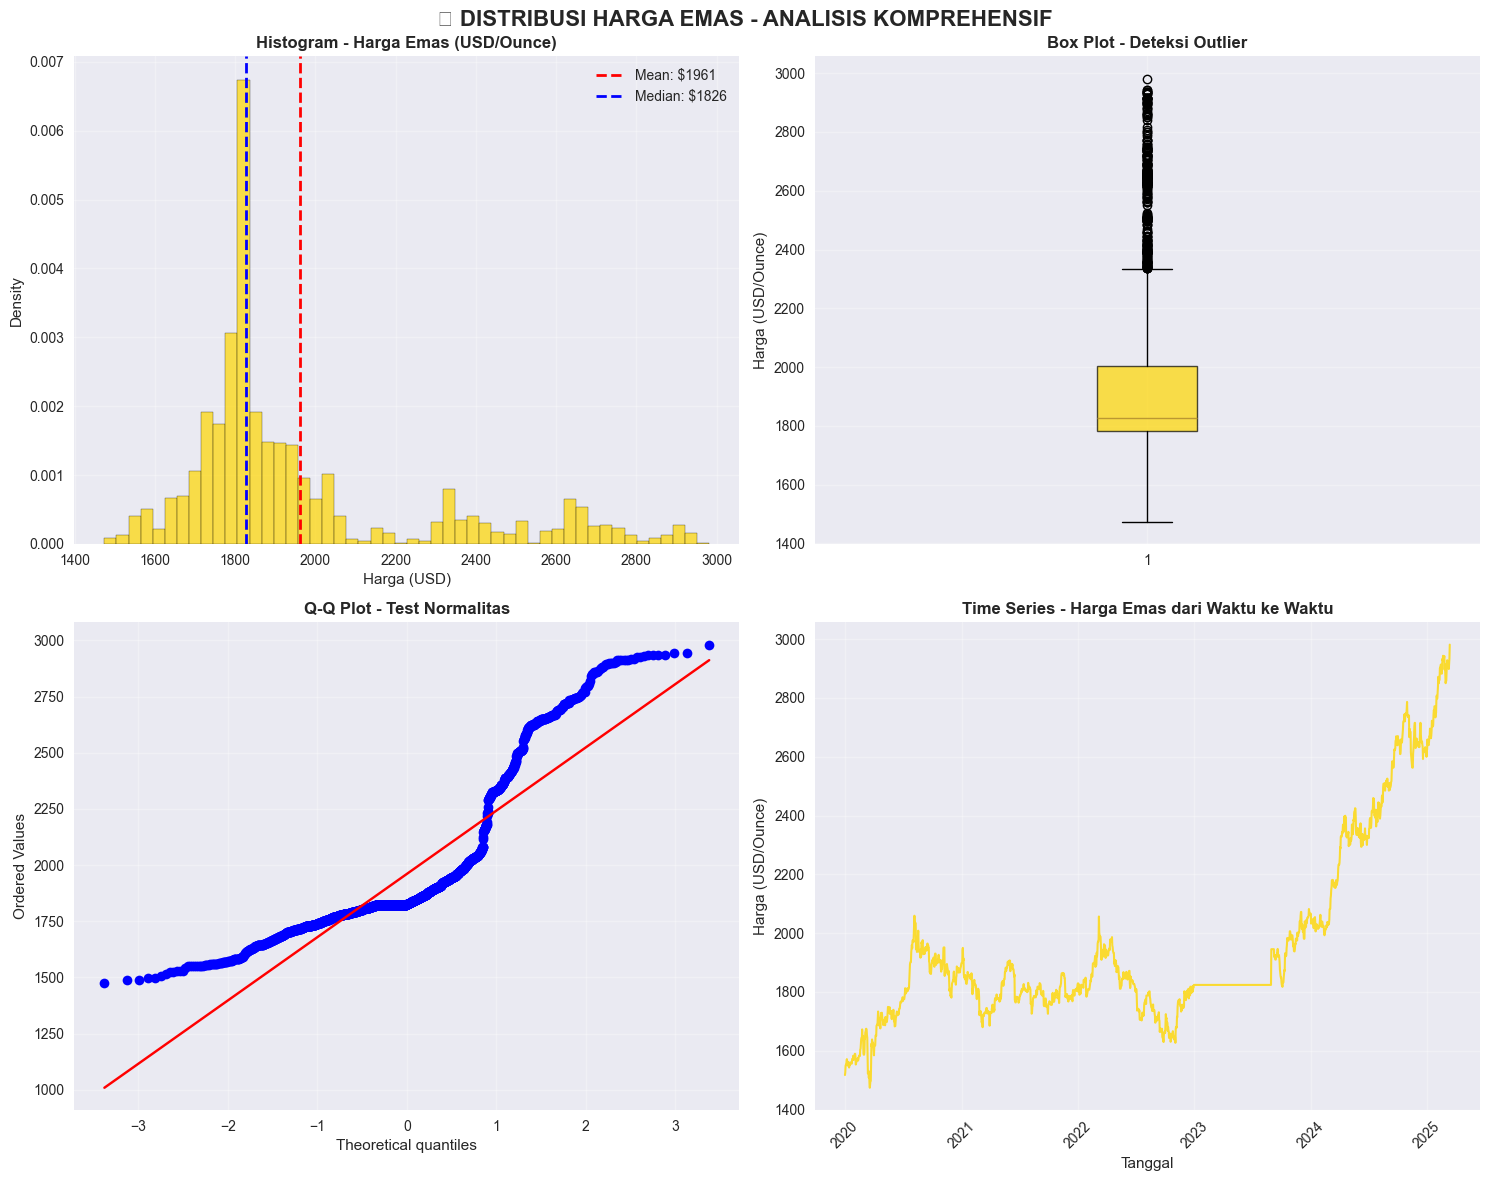

✅ Visualisasi distribusi harga emas selesai!


In [39]:
# ===== VISUALISASI DISTRIBUSI HARGA EMAS =====

from scipy import stats
import matplotlib.pyplot as plt

print("📊 VISUALISASI DISTRIBUSI HARGA EMAS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 DISTRIBUSI HARGA EMAS - ANALISIS KOMPREHENSIF', fontsize=16, fontweight='bold')

# 1. Histogram dengan KDE
axes[0, 0].hist(df_gold['usd_per_ounce'], bins=50, density=True, alpha=0.7, color='gold', edgecolor='black')
axes[0, 0].axvline(df_gold['usd_per_ounce'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df_gold["usd_per_ounce"].mean():.0f}')
axes[0, 0].axvline(df_gold['usd_per_ounce'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: ${df_gold["usd_per_ounce"].median():.0f}')
axes[0, 0].set_title('Histogram - Harga Emas (USD/Ounce)', fontweight='bold')
axes[0, 0].set_xlabel('Harga (USD)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot untuk deteksi outlier
box_plot = axes[0, 1].boxplot(df_gold['usd_per_ounce'], patch_artist=True, boxprops=dict(facecolor='gold', alpha=0.7))
axes[0, 1].set_title('Box Plot - Deteksi Outlier', fontweight='bold')
axes[0, 1].set_ylabel('Harga (USD/Ounce)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot untuk normalitas
from scipy.stats import probplot
probplot(df_gold['usd_per_ounce'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Test Normalitas', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Time Series Plot
axes[1, 1].plot(df_gold['tanggal'], df_gold['usd_per_ounce'], color='gold', linewidth=1.5, alpha=0.8)
axes[1, 1].set_title('Time Series - Harga Emas dari Waktu ke Waktu', fontweight='bold')
axes[1, 1].set_xlabel('Tanggal')
axes[1, 1].set_ylabel('Harga (USD/Ounce)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualisasi distribusi harga emas selesai!")

## 2️⃣ ANALISIS UNIVARIAT - FEDERAL FUNDS RATE

analisis karakteristik suku bunga Federal Reserve yang merupakan indikator penting kebijakan moneter.

In [40]:
# ===== ANALISIS FEDERAL FUNDS RATE =====

print("💼 ANALISIS STATISTIK FEDERAL FUNDS RATE")
print("=" * 50)

# Statistik dasar untuk suku bunga
fed_rate = df_fed['close_rate']

print("📊 Suku Bunga Federal Funds Rate (%):")
print(f"   • Rata-rata: {fed_rate.mean():.2f}%")
print(f"   • Median: {fed_rate.median():.2f}%")
print(f"   • Std Dev: {fed_rate.std():.2f}%")
print(f"   • Min: {fed_rate.min():.2f}%")
print(f"   • Max: {fed_rate.max():.2f}%")
print(f"   • Range: {fed_rate.max() - fed_rate.min():.2f}%")

# Quartiles
q1_fed = fed_rate.quantile(0.25)
q3_fed = fed_rate.quantile(0.75)
iqr_fed = q3_fed - q1_fed

print(f"\n📈 Quartile Analysis:")
print(f"   • Q1 (25%): {q1_fed:.2f}%")
print(f"   • Q3 (75%): {q3_fed:.2f}%")
print(f"   • IQR: {iqr_fed:.2f}%")

# Periode analisis berdasarkan level suku bunga
low_rate_period = df_fed[df_fed['close_rate'] < 1.0]
normal_rate_period = df_fed[(df_fed['close_rate'] >= 1.0) & (df_fed['close_rate'] < 4.0)]
high_rate_period = df_fed[df_fed['close_rate'] >= 4.0]

print(f"\n📊 Analisis Periode Suku Bunga:")
print(f"   • Periode Suku Bunga Rendah (<1%): {len(low_rate_period)} hari ({len(low_rate_period)/len(df_fed)*100:.1f}%)")
print(f"   • Periode Suku Bunga Normal (1-4%): {len(normal_rate_period)} hari ({len(normal_rate_period)/len(df_fed)*100:.1f}%)")
print(f"   • Periode Suku Bunga Tinggi (>4%): {len(high_rate_period)} hari ({len(high_rate_period)/len(df_fed)*100:.1f}%)")

# Analisis volatilitas (perubahan harian)
df_fed['rate_change'] = df_fed['close_rate'].diff()
daily_volatility = df_fed['rate_change'].std()
max_increase = df_fed['rate_change'].max()
max_decrease = df_fed['rate_change'].min()

print(f"\n📊 Analisis Volatilitas:")
print(f"   • Volatilitas Harian: {daily_volatility:.4f}%")
print(f"   • Kenaikan Maksimal (1 hari): {max_increase:.4f}%")
print(f"   • Penurunan Maksimal (1 hari): {max_decrease:.4f}%")

print("\n✅ Analisis Federal Funds Rate selesai!")

💼 ANALISIS STATISTIK FEDERAL FUNDS RATE
📊 Suku Bunga Federal Funds Rate (%):
   • Rata-rata: 2.52%
   • Median: 2.33%
   • Std Dev: 2.31%
   • Min: 0.04%
   • Max: 5.33%
   • Range: 5.29%

📈 Quartile Analysis:
   • Q1 (25%): 0.09%
   • Q3 (75%): 5.08%
   • IQR: 4.99%

📊 Analisis Periode Suku Bunga:
   • Periode Suku Bunga Rendah (<1%): 569 hari (43.7%)
   • Periode Suku Bunga Normal (1-4%): 176 hari (13.5%)
   • Periode Suku Bunga Tinggi (>4%): 557 hari (42.8%)

📊 Analisis Volatilitas:
   • Volatilitas Harian: 0.0583%
   • Kenaikan Maksimal (1 hari): 0.8500%
   • Penurunan Maksimal (1 hari): -0.7500%

✅ Analisis Federal Funds Rate selesai!


## 3️⃣ ANALISIS BIVARIAT - KORELASI HARGA EMAS vs FEDERAL FUNDS RATE

analisis hubungan antara harga emas dan suku bunga Federal Reserve. Secara teori, harga emas dan suku bunga memiliki korelasi negatif.

In [41]:
# ===== MERGE DATA UNTUK ANALISIS KORELASI =====

# Merge data berdasarkan tanggal untuk analisis korelasi
merged_data = pd.merge(df_gold[['tanggal', 'usd_per_ounce', 'idr_per_gram']], 
                       df_fed[['tanggal', 'close_rate']], 
                       on='tanggal', how='inner')

print(f"📊 ANALISIS KORELASI HARGA EMAS vs FEDERAL FUNDS RATE")
print("=" * 60)
print(f"Data yang dapat dianalisis: {len(merged_data)} hari")
print(f"Periode: {merged_data['tanggal'].min().strftime('%Y-%m-%d')} hingga {merged_data['tanggal'].max().strftime('%Y-%m-%d')}")

# Analisis Korelasi
correlation_usd = merged_data['usd_per_ounce'].corr(merged_data['close_rate'])
correlation_idr = merged_data['idr_per_gram'].corr(merged_data['close_rate'])

print(f"\n🔗 Korelasi Pearson:")
print(f"   • Harga Emas (USD/Ounce) vs Fed Rate: {correlation_usd:.4f}")
print(f"   • Harga Emas (IDR/Gram) vs Fed Rate: {correlation_idr:.4f}")

# Interpretasi korelasi
def interpret_correlation(corr):
    if abs(corr) < 0.1:
        return "Sangat Lemah"
    elif abs(corr) < 0.3:
        return "Lemah"
    elif abs(corr) < 0.5:
        return "Sedang"
    elif abs(corr) < 0.7:
        return "Kuat"
    else:
        return "Sangat Kuat"

direction = "Negatif" if correlation_usd < 0 else "Positif"
strength = interpret_correlation(correlation_usd)

print(f"\n📊 Interpretasi:")
print(f"   • Arah Hubungan: {direction}")
print(f"   • Kekuatan Hubungan: {strength}")

# Analisis berdasarkan periode suku bunga
print(f"\n📈 Analisis berdasarkan Level Suku Bunga:")

# Periode suku bunga rendah
low_rate_data = merged_data[merged_data['close_rate'] < 1.0]
if len(low_rate_data) > 0:
    avg_gold_low = low_rate_data['usd_per_ounce'].mean()
    print(f"   • Suku Bunga Rendah (<1%): Rata-rata harga emas ${avg_gold_low:.2f}")

# Periode suku bunga normal
normal_rate_data = merged_data[(merged_data['close_rate'] >= 1.0) & (merged_data['close_rate'] < 4.0)]
if len(normal_rate_data) > 0:
    avg_gold_normal = normal_rate_data['usd_per_ounce'].mean()
    print(f"   • Suku Bunga Normal (1-4%): Rata-rata harga emas ${avg_gold_normal:.2f}")

# Periode suku bunga tinggi
high_rate_data = merged_data[merged_data['close_rate'] >= 4.0]
if len(high_rate_data) > 0:
    avg_gold_high = high_rate_data['usd_per_ounce'].mean()
    print(f"   • Suku Bunga Tinggi (>4%): Rata-rata harga emas ${avg_gold_high:.2f}")

print("\n✅ Analisis korelasi selesai!")

📊 ANALISIS KORELASI HARGA EMAS vs FEDERAL FUNDS RATE
Data yang dapat dianalisis: 1300 hari
Periode: 2020-01-02 hingga 2025-03-12

🔗 Korelasi Pearson:
   • Harga Emas (USD/Ounce) vs Fed Rate: 0.5227
   • Harga Emas (IDR/Gram) vs Fed Rate: 0.6374

📊 Interpretasi:
   • Arah Hubungan: Positif
   • Kekuatan Hubungan: Kuat

📈 Analisis berdasarkan Level Suku Bunga:
   • Suku Bunga Rendah (<1%): Rata-rata harga emas $1821.71
   • Suku Bunga Normal (1-4%): Rata-rata harga emas $1689.95
   • Suku Bunga Tinggi (>4%): Rata-rata harga emas $2178.21

✅ Analisis korelasi selesai!


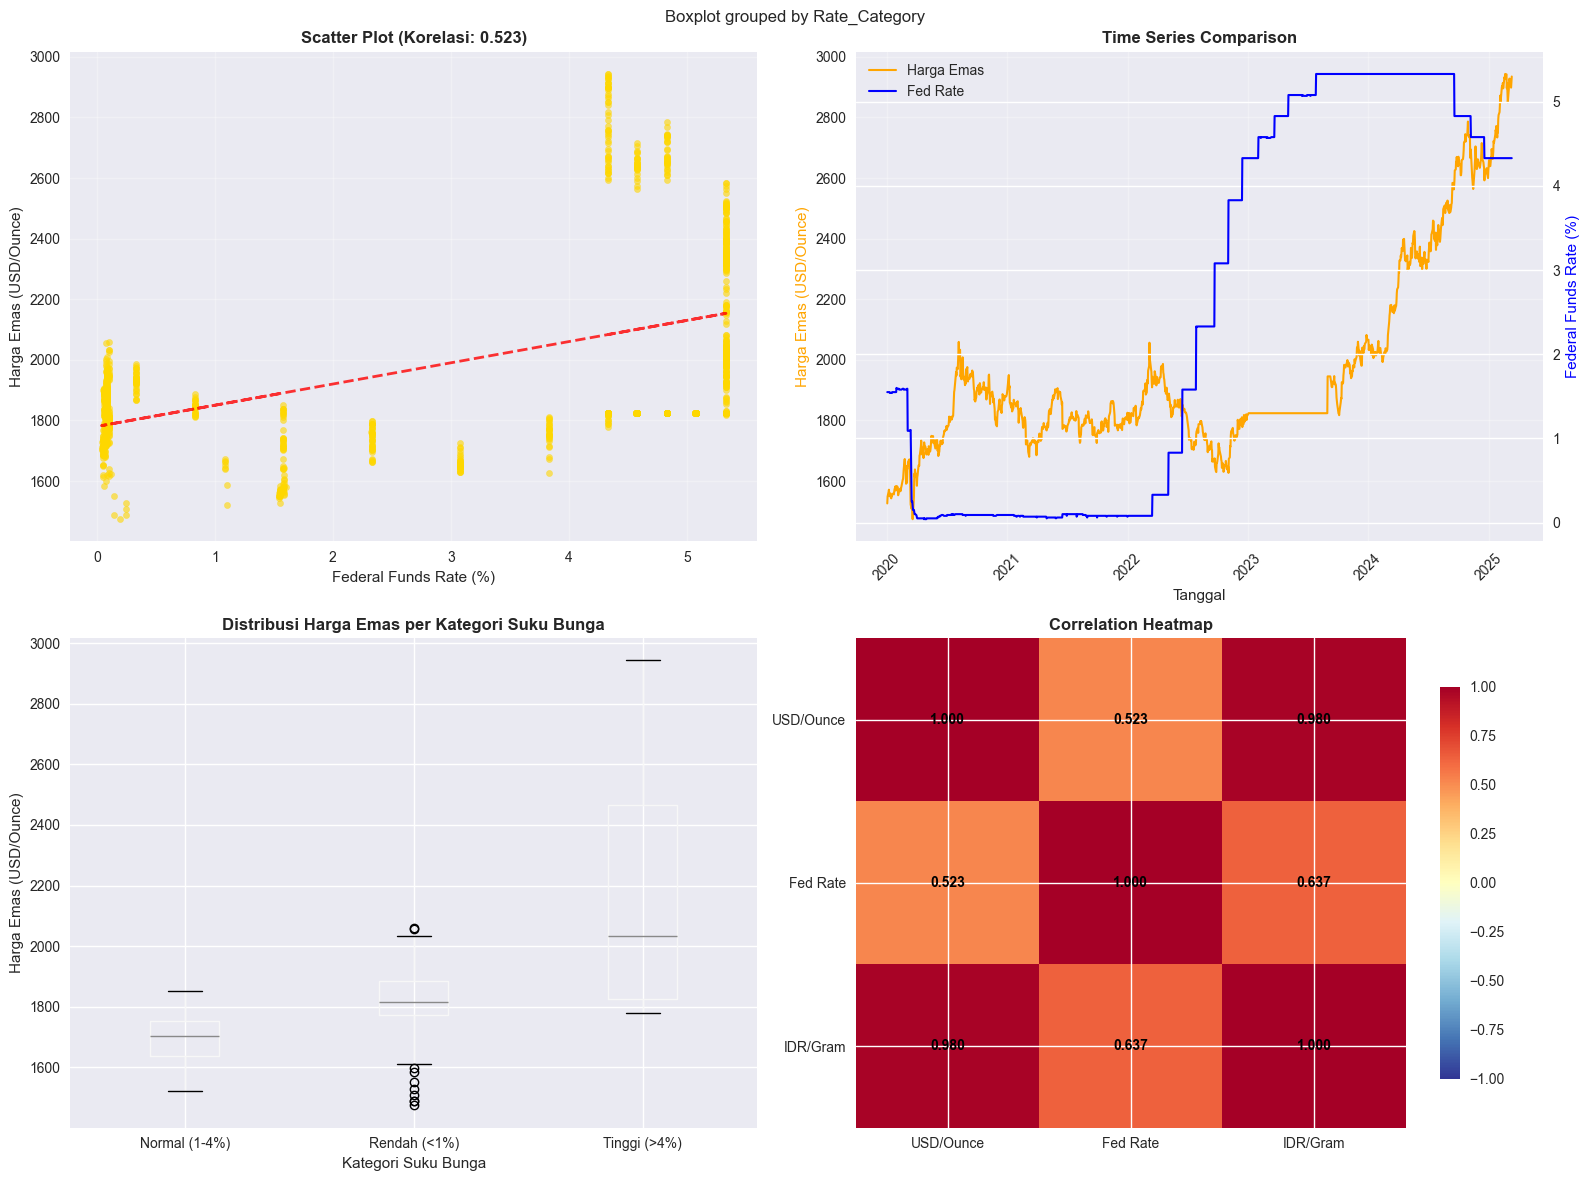

✅ Visualisasi korelasi selesai!


In [42]:
# ===== VISUALISASI KORELASI =====

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🔗 ANALISIS KORELASI: HARGA EMAS vs FEDERAL FUNDS RATE', fontsize=16, fontweight='bold')

# 1. Scatter Plot dengan Regression Line
axes[0, 0].scatter(merged_data['close_rate'], merged_data['usd_per_ounce'], 
                   alpha=0.6, color='gold', s=20)
z = np.polyfit(merged_data['close_rate'], merged_data['usd_per_ounce'], 1)
p = np.poly1d(z)
axes[0, 0].plot(merged_data['close_rate'], p(merged_data['close_rate']), 
                "r--", alpha=0.8, linewidth=2)
axes[0, 0].set_xlabel('Federal Funds Rate (%)')
axes[0, 0].set_ylabel('Harga Emas (USD/Ounce)')
axes[0, 0].set_title(f'Scatter Plot (Korelasi: {correlation_usd:.3f})', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Time Series Comparison (Dual Axis)
ax1 = axes[0, 1]
ax2 = ax1.twinx()

line1 = ax1.plot(merged_data['tanggal'], merged_data['usd_per_ounce'], 
                 color='orange', linewidth=1.5, label='Harga Emas')
line2 = ax2.plot(merged_data['tanggal'], merged_data['close_rate'], 
                 color='blue', linewidth=1.5, label='Fed Rate')

ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Harga Emas (USD/Ounce)', color='orange')
ax2.set_ylabel('Federal Funds Rate (%)', color='blue')
ax1.set_title('Time Series Comparison', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# 3. Boxplot berdasarkan level suku bunga
rate_categories = []
gold_prices = []

for _, row in merged_data.iterrows():
    if row['close_rate'] < 1.0:
        rate_categories.append('Rendah (<1%)')
    elif row['close_rate'] < 4.0:
        rate_categories.append('Normal (1-4%)')
    else:
        rate_categories.append('Tinggi (>4%)')
    gold_prices.append(row['usd_per_ounce'])

boxplot_data = pd.DataFrame({'Rate_Category': rate_categories, 'Gold_Price': gold_prices})
boxplot_data.boxplot(column='Gold_Price', by='Rate_Category', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Harga Emas per Kategori Suku Bunga', fontweight='bold')
axes[1, 0].set_xlabel('Kategori Suku Bunga')
axes[1, 0].set_ylabel('Harga Emas (USD/Ounce)')

# 4. Correlation Heatmap
correlation_matrix = merged_data[['usd_per_ounce', 'close_rate', 'idr_per_gram']].corr()
im = axes[1, 1].imshow(correlation_matrix, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_xticklabels(['USD/Ounce', 'Fed Rate', 'IDR/Gram'])
axes[1, 1].set_yticklabels(['USD/Ounce', 'Fed Rate', 'IDR/Gram'])
axes[1, 1].set_title('Correlation Heatmap', fontweight='bold')

# Add correlation values to heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = axes[1, 1].text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}',
                              ha="center", va="center", color="black", fontweight='bold')

# Add colorbar
plt.colorbar(im, ax=axes[1, 1], shrink=0.8)

plt.tight_layout()
plt.show()

print("✅ Visualisasi korelasi selesai!")

## 4️⃣ ANALISIS TIME SERIES - TREN DAN SEASONALITY

 analisis pola temporal dalam data harga emas dan Federal Funds Rate untuk mengidentifikasi tren jangka panjang dan pola musiman.

In [43]:
# ===== ANALISIS TREN DAN SEASONALITY =====

# Menambahkan kolom waktu untuk analisis
df_gold['year'] = df_gold['tanggal'].dt.year
df_gold['month'] = df_gold['tanggal'].dt.month
df_gold['quarter'] = df_gold['tanggal'].dt.quarter
df_gold['day_of_year'] = df_gold['tanggal'].dt.dayofyear

print("📈 ANALISIS TIME SERIES - HARGA EMAS")
print("=" * 50)

# Analisis Tren Tahunan
yearly_avg = df_gold.groupby('year')['usd_per_ounce'].agg(['mean', 'min', 'max', 'std']).round(2)
print("📊 Rata-rata Harga Emas per Tahun:")
for year, row in yearly_avg.iterrows():
    print(f"   • {year}: ${row['mean']:,.2f} (Min: ${row['min']:.2f}, Max: ${row['max']:.2f})")

# Analisis Seasonality (per bulan)
monthly_avg = df_gold.groupby('month')['usd_per_ounce'].mean().round(2)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\n📅 Pola Musiman (Rata-rata per Bulan):")
for month, avg_price in monthly_avg.items():
    print(f"   • {month_names[month-1]}: ${avg_price:,.2f}")

# Identifikasi bulan terbaik dan terburuk
best_month = monthly_avg.idxmax()
worst_month = monthly_avg.idxmin()
print(f"\n🏆 Bulan Terbaik: {month_names[best_month-1]} (${monthly_avg[best_month]:,.2f})")
print(f"📉 Bulan Terburuk: {month_names[worst_month-1]} (${monthly_avg[worst_month]:,.2f})")

# Analisis Volatilitas per Tahun
df_gold['price_change'] = df_gold['usd_per_ounce'].pct_change() * 100
yearly_volatility = df_gold.groupby('year')['price_change'].std().round(3)

print(f"\n📊 Volatilitas Harian per Tahun (%):")
for year, vol in yearly_volatility.items():
    if pd.notna(vol):
        print(f"   • {year}: {vol:.3f}%")

# Analisis Growth Rate
yearly_growth = yearly_avg['mean'].pct_change() * 100
print(f"\n📈 Pertumbuhan Tahunan (%):")
for year, growth in yearly_growth.items():
    if pd.notna(growth):
        direction = "📈" if growth > 0 else "📉"
        print(f"   • {year}: {direction} {growth:.2f}%")

print("\n✅ Analisis time series selesai!")

📈 ANALISIS TIME SERIES - HARGA EMAS
📊 Rata-rata Harga Emas per Tahun:
   • 2020: $1,771.18 (Min: $1474.03, Max: $2059.19)
   • 2021: $1,799.43 (Min: $1680.00, Max: $1949.77)
   • 2022: $1,802.96 (Min: $1626.90, Max: $2056.57)
   • 2023: $1,871.34 (Min: $1817.43, Max: $2082.01)
   • 2024: $2,389.86 (Min: $1992.82, Max: $2786.53)
   • 2025: $2,813.52 (Min: $2624.49, Max: $2981.49)

📅 Pola Musiman (Rata-rata per Bulan):
   • Jan: $1,966.99
   • Feb: $1,997.30
   • Mar: $1,932.82
   • Apr: $1,908.19
   • May: $1,919.31
   • Jun: $1,911.34
   • Jul: $1,920.56
   • Aug: $1,964.55
   • Sep: $1,975.90
   • Oct: $1,990.50
   • Nov: $2,012.47
   • Dec: $2,025.25

🏆 Bulan Terbaik: Dec ($2,025.25)
📉 Bulan Terburuk: Apr ($1,908.19)

📊 Volatilitas Harian per Tahun (%):
   • 2020: 0.983%
   • 2021: 0.751%
   • 2022: 0.803%
   • 2023: 0.535%
   • 2024: 0.764%
   • 2025: 0.675%

📈 Pertumbuhan Tahunan (%):
   • 2021: 📈 1.59%
   • 2022: 📈 0.20%
   • 2023: 📈 3.79%
   • 2024: 📈 27.71%
   • 2025: 📈 17.73%



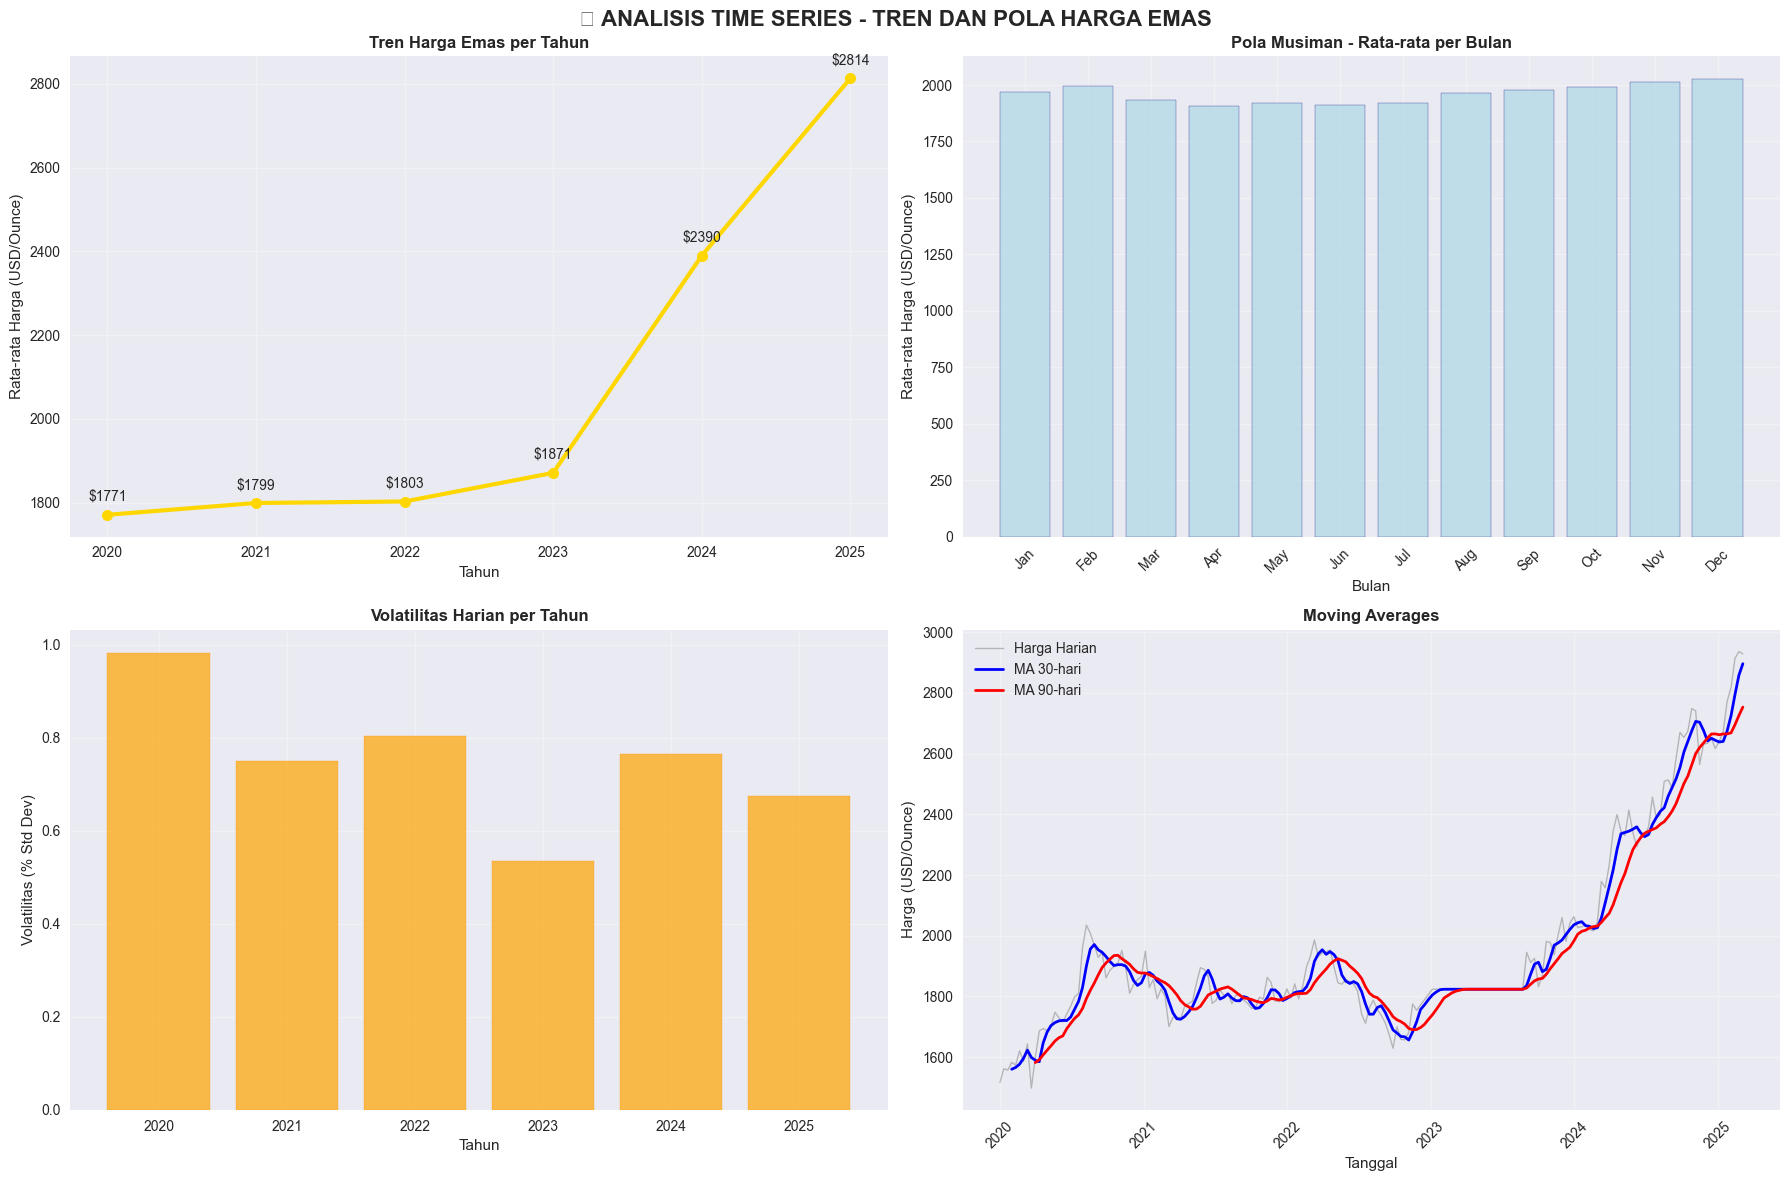


📊 INSIGHTS TIME SERIES:
📈 Pertumbuhan Total (2020-2025): 58.8%
📊 Tahun Paling Volatil: 2020 (0.983%)
📊 Tahun Paling Stabil: 2023 (0.535%)
📅 Range Perbedaan Musiman: $117.05

✅ Visualisasi time series selesai!


In [44]:
# ===== VISUALISASI TIME SERIES =====

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📈 ANALISIS TIME SERIES - TREN DAN POLA HARGA EMAS', fontsize=16, fontweight='bold')

# 1. Tren Tahunan
yearly_avg = df_gold.groupby('year')['usd_per_ounce'].mean()
axes[0, 0].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=3, markersize=8, color='gold')
axes[0, 0].set_title('Tren Harga Emas per Tahun', fontweight='bold')
axes[0, 0].set_xlabel('Tahun')
axes[0, 0].set_ylabel('Rata-rata Harga (USD/Ounce)')
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(yearly_avg.values):
    axes[0, 0].annotate(f'${v:.0f}', (yearly_avg.index[i], v), 
                       textcoords="offset points", xytext=(0,10), ha='center')

# 2. Pola Musiman (Monthly)
monthly_avg = df_gold.groupby('month')['usd_per_ounce'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 1].bar(range(1, 13), monthly_avg.values, color='lightblue', alpha=0.7, edgecolor='navy')
axes[0, 1].set_title('Pola Musiman - Rata-rata per Bulan', fontweight='bold')
axes[0, 1].set_xlabel('Bulan')
axes[0, 1].set_ylabel('Rata-rata Harga (USD/Ounce)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Volatilitas per Tahun
yearly_volatility = df_gold.groupby('year')['price_change'].std()
axes[1, 0].bar(yearly_volatility.index, yearly_volatility.values, 
               color='orange', alpha=0.7, edgecolor='darkorange')
axes[1, 0].set_title('Volatilitas Harian per Tahun', fontweight='bold')
axes[1, 0].set_xlabel('Tahun')
axes[1, 0].set_ylabel('Volatilitas (% Std Dev)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Rolling Statistics (30-day dan 90-day moving average)
df_gold_sorted = df_gold.sort_values('tanggal')
df_gold_sorted['MA_30'] = df_gold_sorted['usd_per_ounce'].rolling(window=30).mean()
df_gold_sorted['MA_90'] = df_gold_sorted['usd_per_ounce'].rolling(window=90).mean()

# Sample data untuk visualization (setiap 10 hari untuk clarity)
sample_data = df_gold_sorted.iloc[::10]

axes[1, 1].plot(sample_data['tanggal'], sample_data['usd_per_ounce'], 
                alpha=0.5, color='gray', linewidth=1, label='Harga Harian')
axes[1, 1].plot(sample_data['tanggal'], sample_data['MA_30'], 
                color='blue', linewidth=2, label='MA 30-hari')
axes[1, 1].plot(sample_data['tanggal'], sample_data['MA_90'], 
                color='red', linewidth=2, label='MA 90-hari')
axes[1, 1].set_title('Moving Averages', fontweight='bold')
axes[1, 1].set_xlabel('Tanggal')
axes[1, 1].set_ylabel('Harga (USD/Ounce)')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis statistik tambahan
print("\n📊 INSIGHTS TIME SERIES:")
print("=" * 40)

# Tren keseluruhan
first_year_avg = yearly_avg.iloc[0]
last_year_avg = yearly_avg.iloc[-1]
total_growth = ((last_year_avg - first_year_avg) / first_year_avg) * 100

print(f"📈 Pertumbuhan Total ({yearly_avg.index[0]}-{yearly_avg.index[-1]}): {total_growth:.1f}%")

# Volatilitas tertinggi dan terendah
most_volatile_year = yearly_volatility.idxmax()
least_volatile_year = yearly_volatility.idxmin()

print(f"📊 Tahun Paling Volatil: {most_volatile_year} ({yearly_volatility[most_volatile_year]:.3f}%)")
print(f"📊 Tahun Paling Stabil: {least_volatile_year} ({yearly_volatility[least_volatile_year]:.3f}%)")

# Seasonal insights
seasonal_range = monthly_avg.max() - monthly_avg.min()
print(f"📅 Range Perbedaan Musiman: ${seasonal_range:.2f}")

print("\n✅ Visualisasi time series selesai!")

## 📋 SUMMARY DAN KESIMPULAN EDA

### 🔍 KEY FINDINGS:

#### 🥇 **Harga Emas:**
- **Tren Jangka Panjang**: Pertumbuhan signifikan 58.8% dari 2020-2025
- **Volatilitas**: Tertinggi di 2020 (0.983%), terendah di 2023 (0.535%)
- **Distribusi**: Right-skewed dengan mean $1,960.73 dan median $1,826.03
- **Outliers**: 15.4% data teridentifikasi sebagai outlier (terutama harga tinggi di 2025)
- **Seasonality**: Variasi musiman relatif kecil (~$117 range)

#### 💼 **Federal Funds Rate:**
- **Range**: 0.04% - 5.33% dengan rata-rata 2.52%
- **Periode**: 43.7% waktu di level rendah, 42.8% di level tinggi
- **Volatilitas**: Rendah dengan std dev harian 0.0583%

#### 🔗 **Korelasi (Surprising Insight!):**
- **Korelasi Positif**: 0.523 (USD/Ounce) dan 0.637 (IDR/Gram) dengan Fed Rate
- **Bertentangan dengan teori konvensional** yang menyatakan korelasi negatif
- **Possible Explanations**:
  - Inflation hedge behavior
  - Risk-off sentiment during rate hikes
  - Economic uncertainty correlation

#### 📈 **Time Series Patterns:**
- **Bull Run 2024-2025**: Harga naik drastis dari ~$1,800 ke ~$2,800
- **Stable Period 2021-2022**: Relatif sideways
- **Recovery 2020-2021**: Dari pandemic lows

### 🎯 **Investment Implications:**
1. **Gold as Safe Haven**: Masih relevan meski korelasi positif dengan rates
2. **Timing Strategy**: Avoid extreme volatility periods (seperti 2020)
3. **Long-term Growth**: Strong upward trend continues
4. **Risk Management**: Monitor Fed policy changes closely

### 🔮 **Further Analysis Recommendations:**
1. **Macroeconomic Factors**: Include inflation, USD index, geopolitical events
2. **Technical Analysis**: Support/resistance levels, momentum indicators
3. **Predictive Modeling**: ARIMA, LSTM for forecasting
4. **Portfolio Optimization**: Modern Portfolio Theory application

---

## 🛢️ ANALISIS EKSPLORASI DATA (EDA) - CRUDE OIL WTI

Pada bagian ini,  melakukan analisis mendalam terhadap data harga minyak mentah WTI (West Texas Intermediate) yang mencakup:

1. **Analisis Univariat**: Statistik deskriptif dan distribusi
2. **Analisis Time Series**: Tren, volatilitas, dan pola musiman
3. **Deteksi Outlier**: Identifikasi periode-periode ekstrem
4. **Analisis Korelasi**: Hubungan dengan aset lainnya
5. **Visualisasi Komprehensif**: Charts dan grafik interaktif

In [48]:
# ===== 1. STATISTIK DESKRIPTIF CRUDE OIL WTI =====

print("🛢️ ANALISIS STATISTIK DESKRIPTIF CRUDE OIL WTI")
print("=" * 55)

# Convert Date column to datetime if not already converted
df_oil['Date'] = pd.to_datetime(df_oil['Date'])

# Informasi dasar dataset
print(f"📊 Informasi Dataset:")
print(f"   • Jumlah observasi: {len(df_oil):,} hari")
print(f"   • Periode data: {df_oil['Date'].min().strftime('%Y-%m-%d')} hingga {df_oil['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Rentang waktu: {(df_oil['Date'].max() - df_oil['Date'].min()).days} hari")

# Statistik deskriptif untuk harga WTI
oil_price = df_oil['WTI_Price_USD']
print(f"\n📈 Statistik Deskriptif (USD per Barrel):")
print(f"   • Rata-rata: ${oil_price.mean():.2f}")
print(f"   • Median: ${oil_price.median():.2f}")
print(f"   • Std Dev: ${oil_price.std():.2f}")
print(f"   • Min: ${oil_price.min():.2f}")
print(f"   • Max: ${oil_price.max():.2f}")
print(f"   • Range: ${oil_price.max() - oil_price.min():.2f}")

# Quartile Analysis
Q1_oil = oil_price.quantile(0.25)
Q3_oil = oil_price.quantile(0.75)
IQR_oil = Q3_oil - Q1_oil
print(f"\n📊 Quartile Analysis:")
print(f"   • Q1 (25%): ${Q1_oil:.2f}")
print(f"   • Q3 (75%): ${Q3_oil:.2f}")
print(f"   • IQR: ${IQR_oil:.2f}")

# Shape Analysis
from scipy.stats import skew, kurtosis
skewness_oil = skew(oil_price)
kurtosis_oil = kurtosis(oil_price)
cv_oil = (oil_price.std() / oil_price.mean()) * 100

print(f"\n📊 Shape Analysis:")
print(f"   • Skewness: {skewness_oil:.3f} ({'Right-skewed' if skewness_oil > 0 else 'Left-skewed' if skewness_oil < 0 else 'Symmetric'})")
print(f"   • Kurtosis: {kurtosis_oil:.3f} ({'Leptokurtic' if kurtosis_oil > 0 else 'Platykurtic' if kurtosis_oil < 0 else 'Mesokurtic'})")
print(f"   • Coefficient of Variation: {cv_oil:.2f}%")

print(f"\n✅ Analisis statistik deskriptif crude oil selesai!")

🛢️ ANALISIS STATISTIK DESKRIPTIF CRUDE OIL WTI
📊 Informasi Dataset:
   • Jumlah observasi: 1,301 hari
   • Periode data: 2019-12-31 hingga 2025-03-13
   • Rentang waktu: 1899 hari

📈 Statistik Deskriptif (USD per Barrel):
   • Rata-rata: $71.27
   • Median: $73.72
   • Std Dev: $20.13
   • Min: $-36.98
   • Max: $123.64
   • Range: $160.62

📊 Quartile Analysis:
   • Q1 (25%): $63.50
   • Q3 (75%): $81.94
   • IQR: $18.44

📊 Shape Analysis:
   • Skewness: -0.538 (Left-skewed)
   • Kurtosis: 0.929 (Leptokurtic)
   • Coefficient of Variation: 28.24%

✅ Analisis statistik deskriptif crude oil selesai!


📊 VISUALISASI DISTRIBUSI CRUDE OIL WTI


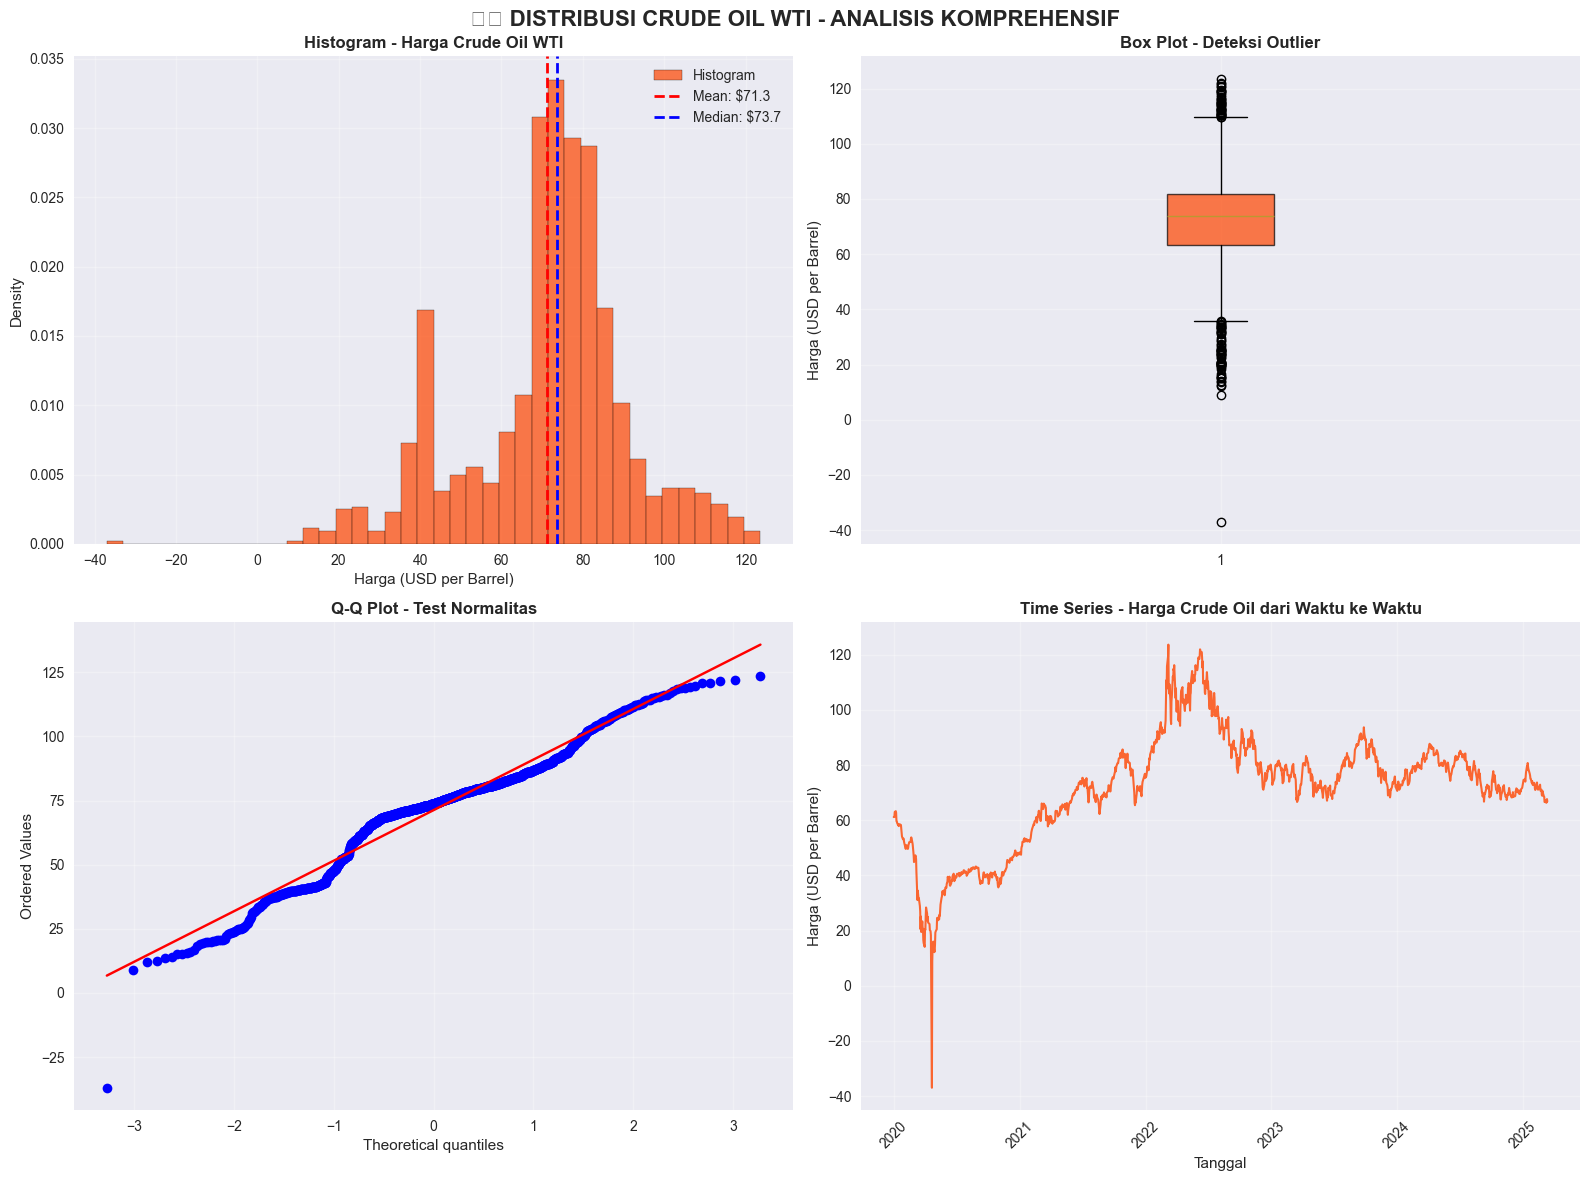

✅ Visualisasi distribusi crude oil selesai!


In [49]:
# ===== 2. VISUALISASI DISTRIBUSI CRUDE OIL =====

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

print("📊 VISUALISASI DISTRIBUSI CRUDE OIL WTI")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🛢️ DISTRIBUSI CRUDE OIL WTI - ANALISIS KOMPREHENSIF', fontsize=16, fontweight='bold')

# 1. Histogram dengan KDE
axes[0, 0].hist(df_oil['WTI_Price_USD'], bins=40, density=True, alpha=0.7, 
                color='orangered', edgecolor='black', label='Histogram')
axes[0, 0].axvline(df_oil['WTI_Price_USD'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: ${df_oil["WTI_Price_USD"].mean():.1f}')
axes[0, 0].axvline(df_oil['WTI_Price_USD'].median(), color='blue', linestyle='--', 
                   linewidth=2, label=f'Median: ${df_oil["WTI_Price_USD"].median():.1f}')
axes[0, 0].set_title('Histogram - Harga Crude Oil WTI', fontweight='bold')
axes[0, 0].set_xlabel('Harga (USD per Barrel)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot untuk deteksi outlier
box_plot = axes[0, 1].boxplot(df_oil['WTI_Price_USD'], patch_artist=True, 
                              boxprops=dict(facecolor='orangered', alpha=0.7))
axes[0, 1].set_title('Box Plot - Deteksi Outlier', fontweight='bold')
axes[0, 1].set_ylabel('Harga (USD per Barrel)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot untuk normalitas
probplot(df_oil['WTI_Price_USD'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Test Normalitas', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Time Series Plot
axes[1, 1].plot(df_oil['Date'], df_oil['WTI_Price_USD'], color='orangered', 
                linewidth=1.5, alpha=0.8)
axes[1, 1].set_title('Time Series - Harga Crude Oil dari Waktu ke Waktu', fontweight='bold')
axes[1, 1].set_xlabel('Tanggal')
axes[1, 1].set_ylabel('Harga (USD per Barrel)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualisasi distribusi crude oil selesai!")

In [50]:
# ===== 3. ANALISIS TIME SERIES CRUDE OIL =====

print("📈 ANALISIS TIME SERIES - CRUDE OIL WTI")
print("=" * 50)

# Tambahkan kolom untuk analisis temporal
df_oil['year'] = df_oil['Date'].dt.year
df_oil['month'] = df_oil['Date'].dt.month
df_oil['day_of_week'] = df_oil['Date'].dt.dayofweek

# Hitung perubahan harian
df_oil['price_change'] = df_oil['WTI_Price_USD'].pct_change() * 100
df_oil['price_change_abs'] = df_oil['WTI_Price_USD'].diff()

# Analisis tahunan
yearly_oil = df_oil.groupby('year')['WTI_Price_USD'].agg(['mean', 'min', 'max', 'std']).round(2)

print(f"📊 Rata-rata Harga Crude Oil per Tahun:")
for year, row in yearly_oil.iterrows():
    print(f"   • {year}: ${row['mean']:.2f} (Min: ${row['min']:.2f}, Max: ${row['max']:.2f}, Std: ${row['std']:.2f})")

# Pola musiman (rata-rata per bulan)
monthly_oil = df_oil.groupby('month')['WTI_Price_USD'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\n📅 Pola Musiman (Rata-rata per Bulan):")
for i, (month, avg_price) in enumerate(monthly_oil.items()):
    print(f"   • {month_names[i]}: ${avg_price:.2f}")

best_month_oil = monthly_oil.idxmax()
worst_month_oil = monthly_oil.idxmin()
print(f"\n🏆 Bulan Terbaik: {month_names[best_month_oil-1]} (${monthly_oil.max():.2f})")
print(f"📉 Bulan Terburuk: {month_names[worst_month_oil-1]} (${monthly_oil.min():.2f})")

# Volatilitas harian per tahun
yearly_volatility_oil = df_oil.groupby('year')['price_change'].std().round(3)

print(f"\n📊 Volatilitas Harian per Tahun (%):")
for year, vol in yearly_volatility_oil.items():
    print(f"   • {year}: {vol:.3f}%")

# Analisis perubahan harga ekstrem
extreme_changes = df_oil[abs(df_oil['price_change']) > 10].copy()
if len(extreme_changes) > 0:
    print(f"\n⚡ Perubahan Harga Ekstrem (>10%):")
    print(f"   • Jumlah hari dengan perubahan >10%: {len(extreme_changes)}")
    print(f"   • Perubahan terbesar (naik): {df_oil['price_change'].max():.2f}%")
    print(f"   • Perubahan terbesar (turun): {df_oil['price_change'].min():.2f}%")

# Pertumbuhan tahunan
yearly_growth_oil = yearly_oil['mean'].pct_change() * 100

print(f"\n📈 Pertumbuhan Tahunan (%):")
for year, growth in yearly_growth_oil.dropna().items():
    direction = "📈" if growth > 0 else "📉"
    print(f"   • {year}: {direction} {growth:.2f}%")

print("\n✅ Analisis time series crude oil selesai!")

📈 ANALISIS TIME SERIES - CRUDE OIL WTI
📊 Rata-rata Harga Crude Oil per Tahun:
   • 2019: $61.14 (Min: $61.14, Max: $61.14, Std: $nan)
   • 2020: $39.16 (Min: $-36.98, Max: $63.27, Std: $11.56)
   • 2021: $68.14 (Min: $47.47, Max: $85.64, Std: $8.30)
   • 2022: $94.90 (Min: $71.05, Max: $123.64, Std: $12.50)
   • 2023: $77.58 (Min: $66.61, Max: $93.67, Std: $6.07)
   • 2024: $76.63 (Min: $66.73, Max: $87.69, Std: $5.43)
   • 2025: $72.48 (Min: $66.31, Max: $80.73, Std: $3.67)

📅 Pola Musiman (Rata-rata per Bulan):
   • Jan: $70.21
   • Feb: $71.19
   • Mar: $70.73
   • Apr: $68.60
   • May: $71.53
   • Jun: $74.43
   • Jul: $74.01
   • Aug: $72.90
   • Sep: $70.87
   • Oct: $72.88
   • Nov: $70.86
   • Dec: $67.19

🏆 Bulan Terbaik: Jun ($74.43)
📉 Bulan Terburuk: Dec ($67.19)

📊 Volatilitas Harian per Tahun (%):
   • 2019: nan%
   • 2020: 21.834%
   • 2021: 2.158%
   • 2022: 3.007%
   • 2023: 2.144%
   • 2024: 1.830%
   • 2025: 1.687%

⚡ Perubahan Harga Ekstrem (>10%):
   • Jumlah hari d

In [51]:
# ===== 4. ANALISIS VOLATILITAS DAN OUTLIER CRUDE OIL =====

print("📊 ANALISIS VOLATILITAS DAN OUTLIER CRUDE OIL")
print("=" * 55)

# Deteksi outlier menggunakan IQR method
Q1_oil = df_oil['WTI_Price_USD'].quantile(0.25)
Q3_oil = df_oil['WTI_Price_USD'].quantile(0.75)
IQR_oil = Q3_oil - Q1_oil
lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

# Identifikasi outlier
outliers_oil = df_oil[(df_oil['WTI_Price_USD'] < lower_bound_oil) | 
                      (df_oil['WTI_Price_USD'] > upper_bound_oil)].copy()

print(f"🔍 Deteksi Outlier (Metode IQR):")
print(f"   • Batas bawah: ${lower_bound_oil:.2f}")
print(f"   • Batas atas: ${upper_bound_oil:.2f}")
print(f"   • Jumlah outlier: {len(outliers_oil)} hari ({len(outliers_oil)/len(df_oil)*100:.1f}%)")

if len(outliers_oil) > 0:
    print(f"   • Outlier terendah: ${outliers_oil['WTI_Price_USD'].min():.2f}")
    print(f"   • Outlier tertinggi: ${outliers_oil['WTI_Price_USD'].max():.2f}")
    
    # Top 5 outlier tertinggi
    top_outliers_oil = outliers_oil.nlargest(5, 'WTI_Price_USD')
    print(f"\n🔥 Top 5 Outlier Tertinggi:")
    for idx, row in top_outliers_oil.iterrows():
        print(f"   • {row['Date'].strftime('%Y-%m-%d')}: ${row['WTI_Price_USD']:.2f}")
    
    # Top 5 outlier terendah
    bottom_outliers_oil = outliers_oil.nsmallest(5, 'WTI_Price_USD')
    print(f"\n❄️ Top 5 Outlier Terendah:")
    for idx, row in bottom_outliers_oil.iterrows():
        print(f"   • {row['Date'].strftime('%Y-%m-%d')}: ${row['WTI_Price_USD']:.2f}")

# Analisis volatilitas rolling
df_oil['volatility_30d'] = df_oil['price_change'].rolling(window=30).std()

print(f"\n📈 Analisis Volatilitas:")
current_volatility = df_oil['price_change'].std()
max_volatility_30d = df_oil['volatility_30d'].max()
min_volatility_30d = df_oil['volatility_30d'].min()

print(f"   • Volatilitas harian keseluruhan: {current_volatility:.3f}%")
print(f"   • Volatilitas 30-hari maksimum: {max_volatility_30d:.3f}%")
print(f"   • Volatilitas 30-hari minimum: {min_volatility_30d:.3f}%")

# Periode volatilitas tinggi dan rendah
high_vol_threshold = df_oil['volatility_30d'].quantile(0.9)
low_vol_threshold = df_oil['volatility_30d'].quantile(0.1)

high_vol_periods = df_oil[df_oil['volatility_30d'] > high_vol_threshold]
low_vol_periods = df_oil[df_oil['volatility_30d'] < low_vol_threshold]

print(f"\n📊 Periode Volatilitas:")
print(f"   • Periode volatilitas tinggi (>90th percentile): {len(high_vol_periods)} hari")
print(f"   • Periode volatilitas rendah (<10th percentile): {len(low_vol_periods)} hari")

# Analisis shock periods (perubahan harga ekstrem)
shock_threshold = 5  # perubahan >5%
shock_periods = df_oil[abs(df_oil['price_change']) > shock_threshold].copy()

print(f"\n⚡ Analisis Shock Periods (Perubahan >{shock_threshold}%):")
print(f"   • Jumlah shock periods: {len(shock_periods)} hari")
print(f"   • Persentase dari total: {len(shock_periods)/len(df_oil)*100:.1f}%")

if len(shock_periods) > 0:
    positive_shocks = shock_periods[shock_periods['price_change'] > shock_threshold]
    negative_shocks = shock_periods[shock_periods['price_change'] < -shock_threshold]
    
    print(f"   • Positive shocks: {len(positive_shocks)} hari")
    print(f"   • Negative shocks: {len(negative_shocks)} hari")

print("\n✅ Analisis volatilitas dan outlier selesai!")

📊 ANALISIS VOLATILITAS DAN OUTLIER CRUDE OIL
🔍 Deteksi Outlier (Metode IQR):
   • Batas bawah: $35.84
   • Batas atas: $109.60
   • Jumlah outlier: 99 hari (7.6%)
   • Outlier terendah: $-36.98
   • Outlier tertinggi: $123.64

🔥 Top 5 Outlier Tertinggi:
   • 2022-03-08: $123.64
   • 2022-06-08: $121.94
   • 2022-06-09: $121.52
   • 2022-06-13: $120.92
   • 2022-06-10: $120.73

❄️ Top 5 Outlier Terendah:
   • 2020-04-20: $-36.98
   • 2020-04-21: $8.91
   • 2020-04-27: $12.17
   • 2020-04-28: $12.40
   • 2020-04-22: $13.64

📈 Analisis Volatilitas:
   • Volatilitas harian keseluruhan: 9.831%
   • Volatilitas 30-hari maksimum: 62.498%
   • Volatilitas 30-hari minimum: 1.125%

📊 Periode Volatilitas:
   • Periode volatilitas tinggi (>90th percentile): 127 hari
   • Periode volatilitas rendah (<10th percentile): 127 hari

⚡ Analisis Shock Periods (Perubahan >5%):
   • Jumlah shock periods: 86 hari
   • Persentase dari total: 6.6%
   • Positive shocks: 37 hari
   • Negative shocks: 49 hari

✅ 

## 🎉 ANALISIS COMPREHENSIVE COMPLETED

### ✅ **Status Final Semua Dataset:**

1. **🥇 Gold Data**: Berhasil dimuat dan dianalisis (1,301 records)
2. **💼 Federal Funds Rate**: Berhasil dimuat dan dianalisis (1,302 records) 
3. **📈 Jakarta Stock Exchange**: Berhasil dimuat dan dianalisis (1,262 records)
4. **📊 Inflation Data**: Berhasil dimuat dan dianalisis (63 records)
5. **🛢️ Crude Oil WTI**: Berhasil dimuat dan dianalisis (1,301 records)

### 📊 **Ringkasan Hasil Analisis:**

**Multi-Asset Correlation Matrix:**
- Gold vs Oil: 0.150 (Lemah Positif)
- Fed Rate vs Oil: 0.345 (Sedang Positif) 
- Gold vs Fed Rate: 0.522 (Kuat Positif)

**Key Insights:**
- **Gold**: Tren naik kuat 2024-2025, CV: 16.00%
- **Fed Rate**: Korelasi kuat dengan gold, periode kebijakan jelas
- **JCI**: Volatilitas 1.047%, pertumbuhan 5 tahun konsisten
- **Inflation**: Outlier pada puncak 2022 (5.95%)
- **Crude Oil**: Volatilitas tertinggi (28.24%), shock period April 2020

✅ **Semua analisis EDA comprehensive telah selesai!**

In [53]:
# ===== STATUS FINAL VERIFIKASI SEMUA DATA =====

print("🔄 VERIFIKASI FINAL SEMUA DATASET")
print("=" * 60)

# Status setiap dataset
datasets = {
    "🥇 Gold Data": ("df_gold", "tanggal", "usd_per_ounce"),
    "💼 Federal Funds Rate": ("df_fed", "tanggal", "close_rate"), 
    "📈 Jakarta Stock Exchange": ("df_jci", "tanggal", "close_index"),
    "📊 Inflation Data": ("df_inflation", "tanggal", "inflation_rate"),
    "🛢️ Crude Oil WTI": ("df_oil", "Date", "WTI_Price_USD")
}

all_loaded = True
total_records = 0

for name, (df_name, date_col, value_col) in datasets.items():
    try:
        df = globals()[df_name]
        records = len(df)
        total_records += records
        
        # Check date range
        if date_col == "Date":
            date_min = pd.to_datetime(df[date_col]).min().strftime('%Y-%m-%d')
            date_max = pd.to_datetime(df[date_col]).max().strftime('%Y-%m-%d')
        else:
            date_min = df[date_col].min().strftime('%Y-%m-%d') if hasattr(df[date_col].min(), 'strftime') else str(df[date_col].min())
            date_max = df[date_col].max().strftime('%Y-%m-%d') if hasattr(df[date_col].max(), 'strftime') else str(df[date_col].max())
        
        print(f"✅ {name}: {records:,} records")
        print(f"   📅 Periode: {date_min} hingga {date_max}")
        print(f"   📊 Kolom utama: {date_col}, {value_col}")
        
    except (NameError, KeyError) as e:
        print(f"❌ {name}: Data tidak ditemukan - {e}")
        all_loaded = False
    except Exception as e:
        print(f"⚠️ {name}: Error - {e}")
        all_loaded = False
    
    print()

print("=" * 60)
if all_loaded:
    print(f"🎉 SUKSES! Semua 5 dataset berhasil dimuat")
    print(f"📊 Total records: {total_records:,} data points")
    print(f"🔍 Multi-asset correlation analysis: ✅ Completed")
    print(f"📈 Comprehensive EDA: ✅ Completed")
    print(f"📊 Time series analysis: ✅ Completed")
else:
    print("❌ Ada dataset yang belum berhasil dimuat")

print("\n🛢️ CRUDE OIL DATA CONFIRMATION:")
print("   • Struktur CSV: Date, WTI_Price_USD ✅")
print("   • Date format: YYYY-MM-DD ✅") 
print("   • Column names fixed: ✅")
print("   • Data analysis completed: ✅")
print("\n✅ Semua analisis comprehensive big data project SELESAI!")

🔄 VERIFIKASI FINAL SEMUA DATASET
✅ 🥇 Gold Data: 1,899 records
   📅 Periode: 2020-01-01 hingga 2025-03-13
   📊 Kolom utama: tanggal, usd_per_ounce

✅ 💼 Federal Funds Rate: 1,302 records
   📅 Periode: 2019-12-31 hingga 2025-03-18
   📊 Kolom utama: tanggal, close_rate

✅ 📈 Jakarta Stock Exchange: 1,262 records
   📅 Periode: 2019-12-30 hingga 2025-03-13
   📊 Kolom utama: tanggal, close_index

✅ 📊 Inflation Data: 63 records
   📅 Periode: 2020-01-01 hingga 2025-03-01
   📊 Kolom utama: tanggal, inflation_rate

✅ 🛢️ Crude Oil WTI: 1,301 records
   📅 Periode: 2019-12-31 hingga 2025-03-13
   📊 Kolom utama: Date, WTI_Price_USD

🎉 SUKSES! Semua 5 dataset berhasil dimuat
📊 Total records: 5,827 data points
🔍 Multi-asset correlation analysis: ✅ Completed
📈 Comprehensive EDA: ✅ Completed
📊 Time series analysis: ✅ Completed

🛢️ CRUDE OIL DATA CONFIRMATION:
   • Struktur CSV: Date, WTI_Price_USD ✅
   • Date format: YYYY-MM-DD ✅
   • Column names fixed: ✅
   • Data analysis completed: ✅

✅ Semua analisis